In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings

from collections import Counter
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from mlxtend.evaluate import bias_variance_decomp

%matplotlib inline
#IMPORT 5 CLASSIFIERS ALGORITHMS FROM SKLEARN
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


sns.set(rc={'figure.figsize':(10,7)})
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#metric used for hypothesis testing
import statsmodels.api as sm
from scipy import stats as st
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from scipy.stats import shapiro
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#INSTANTIATE 5 ALGORITHMS/ESTIMATORS
rfc = RandomForestClassifier(criterion = "entropy", max_depth = 5, random_state=42)
dtc = DecisionTreeClassifier(criterion = "entropy", splitter="best", random_state=42)
etc = ExtraTreesClassifier(max_features = "log2",max_depth = 5, random_state=0)
adc = AdaBoostClassifier(learning_rate = 2.0, random_state=42)
knc = KNeighborsClassifier(algorithm = "brute",weights='uniform', leaf_size=50)

In [2]:
df = pd.read_csv("updt_datasets_clf.csv")
df2 = pd.read_csv("updt_datasets_clf.csv")
df

student_id   age sex course  yr_level socioeconomic_stat fam_support  \
0    2021-01592  19.0   F     CD         2                low         yes   
1    2021-02910  19.0   F     CD         2       lower middle         yes   
2    2021-02862  19.0   F     CD         2                low         yes   
3    2021-02890  19.0   F     CD         2       lower middle         yes   
4    2020-04136  20.0   F     CD         2                low         yes   
..          ...   ...  ..    ...       ...                ...         ...   
322  2021-01850  19.0   F     SW         2                low         yes   
323  2021-00476  21.0   F     SW         2       lower middle         yes   
324  2021-01891  19.0   F     SW         2                low         yes   
325  2021-01897  19.0   F     SW         2                low         yes   
326  2021-02472  21.0   M     SW         2                low          no   

    working_stud scholar personality_type  ...       wifi prepaid-wifi  \
0             no     yes             ISTJ  ...      never       always   
1             no      no             ESFJ  ...  sometimes    sometimes   
2             no      no             ENTP  ...     always        never   
3            yes      no             ESFJ  ...     always    sometimes   
4             no      no             ISFJ  ...  sometimes        never   
..           ...     ...              ...  ...        ...          ...   
322           no      no             ISFP  ...      never        never   
323           no      no             ISFP  ...     always    sometimes   
324           no      no             ENFJ  ...     always        never   
325           no      no             ISFP  ...     always       always   
326           no      no             ESFP  ...      never    sometimes   

    cellular_data    hotspot vhigh_speed high_speed moderate_speed  \
0          always  sometimes      always     always      sometimes   
1       sometimes  sometimes   sometimes  sometimes      sometimes   
2          always  sometimes   sometimes     always      sometimes   
3           never  sometimes   sometimes  sometimes         always   
4       sometimes  sometimes       never  sometimes      sometimes   
..            ...        ...         ...        ...            ...   
322        always      never      always  sometimes          never   
323         never      never   Sometimes  sometimes      sometimes   
324        always      never      always  sometimes      sometimes   
325     sometimes      never      always     always      sometimes   
326        always  sometimes   sometimes  sometimes      sometimes   

    light_speed     GPA          gpa_range  
0     sometimes  1.5588           Superior  
1     sometimes  1.3824           Superior  
2     sometimes  1.5882           Superior  
3     sometimes  1.5000           Superior  
4        always  1.4347           Superior  
..          ...     ...                ...  
322       never  1.6029           Superior  
323       never  1.9559  Very-Satisfactory  
324   sometimes  1.7647  Very-Satisfactory  
325       never  1.4853           Superior  
326   sometimes  1.4265           Superior  

[327 rows x 51 columns]

-------

# EXPLORE DATAFRAME

In [3]:
#Dimension of the raw dataframe
print("Dimension of the data raw dataframe Rows by Columns, ", df.shape)
print("\nDataset Columns, ", df.columns)

Dimension of the data raw dataframe Rows by Columns,  (327, 51)

Dataset Columns,  Index(['student_id', 'age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'fam_support', 'working_stud', 'scholar', 'personality_type', 'TM1',
       'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2', 'CAP3',
       'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6', 'GSS7', 'EP1',
       'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2', 'NT3', 'desktop',
       'laptop', 'mobile_phone', 'tablet', 'wifi', 'prepaid-wifi',
       'cellular_data', 'hotspot', 'vhigh_speed', 'high_speed',
       'moderate_speed', 'light_speed', 'GPA', 'gpa_range'],
      dtype='object')


<AxesSubplot:>

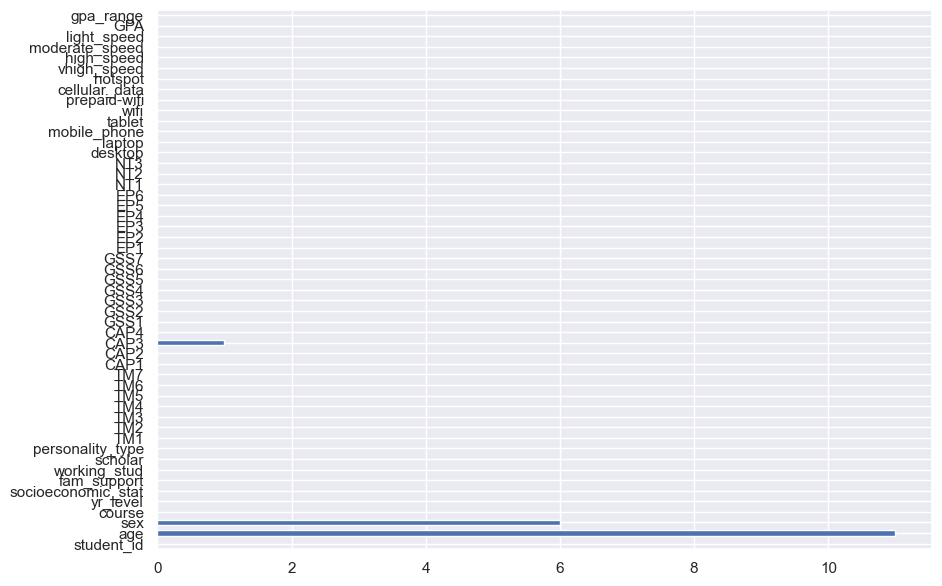

In [4]:
#check Dataframe with null values
df2.isna().sum().plot(kind="barh")

It appears that the dataset's has number/s of nul value specifically within the column of:
* age
* sex
* CAP3

-----

# DATA CLEANING

In [5]:
#Check Sex consistency
print("Sex Attributes :" ,df2.sex.unique())
print("""  Justification  There are 4 attribute exsting inside Sex. We should replace the values with 
                             precise input for consistency.""""" )

#checking missing value for sex
print("\nNumber of missing values of Sex","[" ,df2.sex.isna().sum(), "]")

#Replace Sex value with a precise value 'S' and 'M' and Fill values
df["sex"].replace("M ", "M", inplace = True)
df["sex"].replace("F ", "F", inplace = True)
df["sex"].fillna(method="ffill", inplace=True)

#Check uniqueness of Sex
print("\nUpdated Attributes inside Sex : " ,df["sex"].unique())

print("\nNumber of missing values of Sex","[" ,df.sex.isna().sum(), "]")

#Values of each attribute for Sex
valueCounts_MaleFemale = df.sex.value_counts()
valueCounts_MaleFemale

Sex Attributes : ['F' 'M' nan 'M ' 'F ']
  Justification  There are 4 attribute exsting inside Sex. We should replace the values with 
                             precise input for consistency.

Number of missing values of Sex [ 6 ]

Updated Attributes inside Sex :  ['F' 'M']

Number of missing values of Sex [ 0 ]


F    181
M    146
Name: sex, dtype: int64

In [6]:
#Check uniqueness for age
Age_Unique = df.age.sort_values().unique()
Age_Unique

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., nan])

In [7]:
#Check for missing values for age
AgeMissing = df2["age"].isna().sum()
print("\nNumber of missing value of age : ", AgeMissing, " missing")

#Filling missing values for age with mean.
df.age.fillna(df["age"].mean(), inplace = True)

#Check for missing values for age
print("\nNumber of missing value of age : ", df["age"].isna().sum(), " missing")


Number of missing value of age :  11  missing

Number of missing value of age :  0  missing


In [8]:
#fill missing values for CAP3
df["CAP3"].fillna(method="ffill", inplace = True)
print("\nNumber of missing value of CAP3 : ", df["CAP3"].isna().sum())


Number of missing value of CAP3 :  0


In [9]:
print("Dataframe has no missing value")
df.isna().sum()

Dataframe has no missing value


student_id            0
age                   0
sex                   0
course                0
yr_level              0
socioeconomic_stat    0
fam_support           0
working_stud          0
scholar               0
personality_type      0
TM1                   0
TM2                   0
TM3                   0
TM4                   0
TM5                   0
TM6                   0
TM7                   0
CAP1                  0
CAP2                  0
CAP3                  0
CAP4                  0
GSS1                  0
GSS2                  0
GSS3                  0
GSS4                  0
GSS5                  0
GSS6                  0
GSS7                  0
EP1                   0
EP2                   0
EP3                   0
EP4                   0
EP5                   0
EP6                   0
NT1                   0
NT2                   0
NT3                   0
desktop               0
laptop                0
mobile_phone          0
tablet                0
wifi            

-----

# RECONSTRUCTING VALUES INSIDE COLUMNS

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          327 non-null    object 
 1   age                 327 non-null    float64
 2   sex                 327 non-null    object 
 3   course              327 non-null    object 
 4   yr_level            327 non-null    int64  
 5   socioeconomic_stat  327 non-null    object 
 6   fam_support         327 non-null    object 
 7   working_stud        327 non-null    object 
 8   scholar             327 non-null    object 
 9   personality_type    327 non-null    object 
 10  TM1                 327 non-null    object 
 11  TM2                 327 non-null    object 
 12  TM3                 327 non-null    object 
 13  TM4                 327 non-null    object 
 14  TM5                 327 non-null    object 
 15  TM6                 327 non-null    object 
 16  TM7     

In [11]:
#PRINT UNIQUENESS OF ALL FEATURES EXCEPT STUDENT
print(" Unique of age : ", df2["age"].unique(), "\n")
print(" Unique of sex : ", df2["sex"].unique(), "\n")
print(" Unique of course : ", df2["course"].unique(), "\n")
print(" Unique of yr_level: ", df2["yr_level"].unique(), "\n")
print(" Unique of socioeconomic_stat : ", df2["socioeconomic_stat"].unique(), "\n")
print(" Unique of fam_support : ", df2["fam_support"].unique(), "\n")
print(" Unique of working_stud : ", df2["working_stud"].unique(), "\n")
print(" Unique of scholar : ", df2["scholar"].unique(), "\n")
print(" Unique of personality_type : ", df2["personality_type"].unique(), "\n")
print(" Unique of TM1 : ", df2["TM1"].unique(), "\n")
print(" Unique of TM2 : ", df2["TM2"].unique(), "\n")
print(" Unique of TM3 : ", df2["TM3"].unique(), "\n")
print(" Unique of TM4 : ", df2["TM4"].unique(), "\n")
print(" Unique of TM5 : ", df2["TM5"].unique(), "\n")
print(" Unique of TM6 : ", df2["TM6"].unique(), "\n")
print(" Unique of TM7 : ", df2["TM7"].unique(), "\n")
print(" Unique of CAP1 : ", df2["CAP1"].unique(), "\n")
print(" Unique of CAP2 : ", df2["CAP2"].unique(), "\n")
print(" Unique of CAP3 : ", df2["CAP3"].unique(), "\n")
print(" Unique of CAP4 : ", df2["CAP4"].unique(), "\n")
print(" Unique of GSS1 : ", df2["GSS1"].unique(), "\n")
print(" Unique of GSS2 : ", df2["GSS2"].unique(), "\n")
print(" Unique of GSS3 : ", df2["GSS3"].unique(), "\n")
print(" Unique of GSS4 : ", df2["GSS4"].unique(), "\n")
print(" Unique of GSS5 : ", df2["GSS5"].unique(), "\n")
print(" Unique of GSS6 : ", df2["GSS6"].unique(), "\n")
print(" Unique of GSS7 : ", df2["GSS7"].unique(), "\n")
print(" Unique of EP1 : ", df2["EP1"].unique(), "\n")
print(" Unique of EP2 : ", df2["EP2"].unique(), "\n")
print(" Unique of EP3 : ", df2["EP3"].unique(), "\n")
print(" Unique of EP4 : ", df2["EP4"].unique(), "\n")
print(" Unique of EP5 : ", df2["EP5"].unique(), "\n")
print(" Unique of EP6 : ", df2["EP6"].unique(), "\n")
print(" Unique of NT1 : ", df2["NT1"].unique(), "\n")
print(" Unique of NT2 : ", df2["NT2"].unique(), "\n")
print(" Unique of NT3 : ", df2["NT3"].unique(), "\n")
print(" Unique of desktop : ", df2["desktop"].unique(), "\n")
print(" Unique of laptop : ", df2["laptop"].unique(), "\n")
print(" Unique of mobile_phone : ", df2["mobile_phone"].unique(), "\n")
print(" Unique of tablet : ", df2["tablet"].unique(), "\n")
print(" Unique of wifi : ", df2["wifi"].unique(), "\n")
print(" Unique of prepaid-wifi : ", df2["prepaid-wifi"].unique(), "\n")
print(" Unique of cellular_data : ", df2["cellular_data"].unique(), "\n")
print(" Unique of hotspot : ", df2["hotspot"].unique(), "\n")
print(" Unique of vhigh_speed : ", df2["vhigh_speed"].unique(), "\n")
print(" Unique of high_speed : ", df2["high_speed"].unique(), "\n")
print(" Unique of moderate_speed : ", df2["moderate_speed"].unique(), "\n")
print(" Unique of light_speed : ", df2["light_speed"].unique(), "\n")

 Unique of age :  [19. 20. 21. 25. 18. nan 22. 27. 24. 23. 29. 28. 26.] 

 Unique of sex :  ['F' 'M' nan 'M ' 'F '] 

 Unique of course :  ['CD' 'IT' 'CS' 'SW'] 

 Unique of yr_level:  [2 3 4] 

 Unique of socioeconomic_stat :  ['low' 'lower middle' 'middle' 'upper middle' 'low ' 'Upper but not rich'
 'rich' 'lower'] 

 Unique of fam_support :  ['yes' 'no'] 

 Unique of working_stud :  ['no' 'yes'] 

 Unique of scholar :  ['yes' 'no'] 

 Unique of personality_type :  ['ISTJ' 'ESFJ' 'ENTP' 'ISFJ' 'ENFJ' 'INFJ' 'ISFP' 'INTJ' 'ENTJ' 'ESTP'
 'INFP' 'ESFP' 'ESTJ' 'ISTP' 'ENFP' 'INTP'] 

 Unique of TM1 :  ['always' 'sometimes' 'never' 'sometime' 'Sometimes' 'sometimesom'
 'sometiems'] 

 Unique of TM2 :  ['sometimes' 'never' 'always'] 

 Unique of TM3 :  ['sometimes' 'always' 'never'] 

 Unique of TM4 :  ['always' 'sometimes' 'never'] 

 Unique of TM5 :  ['always' 'sometimes' 'never'] 

 Unique of TM6 :  ['always' 'sometimes' 'never' 'sometime' 'someyimes'] 

 Unique of TM7 :  ['always' 'som

       JUSTIFICATION :
           Columns that REQUIRES replacing unwanted values;
              TM1 -> ['always' 'sometimes' 'never' 'sometime' 'Sometimes' 'sometimesom' 'sometiems'] 
              TM6 ->  ['always' 'sometimes' 'never' 'sometime' 'sometimess' 'someyimes']
              CAP1 -> ['always' 'sometimes' 'Always' 'never'] 
              CAP2 -> ['always' 'sometimes' 'Sometimes' 'never' 'sometimesnever' 's'] 
              GSS5 -> ['always' 'sometimes' 'Sometimes' 'never' 'sometimes ' 'sometime'] 
              tablet -> ['never' 'sometimes' 'an' 'always']
              prepaid-wifi -> ['always' 'sometimes' 'never' 'Sometimes'] 
              vhigh_speed -> ['always' 'sometimes' 'never' 'Sometimes'] 
              high_speed -> ['always' 'sometimes' 'never' 'high'] 
              moderate_speed -> ['sometimes' 'always' 'never' 'moderate'] 
                
       **THE FF. INPUTS WAS NOT CONSISTENT**    

#### Replacing precise value inside columns stated above

In [12]:
#Replacing unwanted values
df.replace({
            'socioeconomic_stat' : {'low ':'low', 'lower':'low'},
            'TM1' : {'sometime':'sometimes',
                     'Sometimes':'sometimes',
                     'sometimesom':'sometimes',
                     'sometiems':'sometimes'
                    },
            'TM6' : {'sometime':'sometimes',
                     'sometimess':'sometimes',
                     'someyimes':'sometimes'
                    },
            'CAP1' : {'Always':'always'},
            'CAP2' : {'Sometimes':'sometimes',
                      'sometimesnever':'sometimes',
                      's':'sometimes'
                     },
            'GSS5' : {'Sometimes':'sometimes',
                      'sometimes ':'sometimes', 
                      'sometime':'sometimes'},
            'tablet' : {'an':'always'},
            'prepaid-wifi' : {'Sometimes':'sometimes'},
            'vhigh_speed' : {'Sometimes':'sometimes'},
            'high_speed' : {'high':'always'},
            'moderate_speed' : {'moderate':'sometimes'}
           }, inplace=True)

In [13]:
df.replace({'age' : {10 : df['age'].mean()}}, inplace=True)

#### Check replaced value 

In [14]:
print("Updated Uniqueness of socioeconomic_stat : ", df["socioeconomic_stat"].unique(), "\n")
print("Updated Uniqueness of TM1 : ", df["TM1"].unique(),"\n")
print("Updated Uniqueness of TM6 : ", df["TM6"].unique(),"\n")
print("Updated Uniqueness of CAP1 : ", df["CAP1"].unique(),"\n")
print("Updated Uniqueness of CAP2 : ", df["CAP2"].unique(),"\n")
print("Updated Uniqueness of GSS5 : ", df["GSS5"].unique(),"\n")
print("Updated Uniqueness of prepaid-wifi : ", df["prepaid-wifi"].unique(),"\n")
print("Updated Uniqueness of vhigh_speed : ", df["vhigh_speed"].unique(),"\n")
print("Updated Uniqueness of high_speed : ", df["high_speed"].unique(),"\n")
print("Updated Uniqueness of moderate_speed : ", df["moderate_speed"].unique(),"\n")

Updated Uniqueness of socioeconomic_stat :  ['low' 'lower middle' 'middle' 'upper middle' 'Upper but not rich' 'rich'] 

Updated Uniqueness of TM1 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of TM6 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of CAP1 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of CAP2 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of GSS5 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of prepaid-wifi :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of vhigh_speed :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of high_speed :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of moderate_speed :  ['sometimes' 'always' 'never'] 



We have now succesfully replaced unwated value inside necessary columns

----

In [15]:
# # creating excel writer object
# writer = pd.ExcelWriter('clean thesis dataset.xlsx')

# # write dataframe to excel
# df.to_excel(writer)

# # save the excel
# writer.save()
# df.to_excel(r"C:\Users\drenz\OneDrive\Desktop\Thesis 2\clean thesis dataset.xlsx", sheet_name='Sheet_name_1')
# print("DataFrame is exported successfully to 'converted-to-excel.xlsx' Excel File.")

In [16]:
# import random
# #Randomly select 15 data in dataset for future validation
# dataValidation = df.sample(n=30, random_state=42, axis='index')

# writerValidation = pd.ExcelWriter('EXTRACT DATA FOR DATA VALIDATION.xlsx')
# dataValidation.to_excel(writer)

# writer.save()
# dataValidation.to_excel(r"C:\Users\drenz\OneDrive\Desktop\Thesis 2\EXTRACT DATA FOR DATA VALIDATION.xlsx", sheet_name='Sheet_name_1')
# print("DataFrame is exported successfully to 'EXTRACT DATA FOR DATA VALIDATION.xlsx' Excel File.")

In [17]:
# temp_df = df
# temp_dataValidation = dataValidation

# #Dataframe without data from validation 
# df = temp_df[~temp_df['student_id'].isin(temp_dataValidation['student_id'])]

# print ("Dimension of cleaned Dataset",df.shape)

----

# DATA TRANSFORMATION

In [18]:

# encode categoricals into  OrdinalEncoder
from category_encoders import OrdinalEncoder
Select_StudInfo_MBTIFeatures = df.iloc[:, [0,1,2,3,4,5,9]]
maplist = [{'col' : 'socioeconomic_stat', 'mapping' : {'low' : 1 ,'lower middle' : 2 ,'middle' : 3, 'upper middle': 4, 'Upper but not rich' : 5,  'rich' :6}},
           {'col' : 'sex' , 'mapping' : { 'F' : 0 , 'M' : 1}},
           {'col' : 'course' , 'mapping' : { 'IT':1, 'CS':2, 'CD':3 , 'SW':4}},
           {'col' : 'personality_type' , 'mapping' : {
                                                        'INTJ':0,
                                                        'ISTJ':1,  
                                                        'ESFJ':2, 
                                                        'ISFP':3,    
                                                        'ISFJ':4, 
                                                        'ENFJ':5,   
                                                        'INFJ':6,  
                                                        'ISTP':7,   
                                                        'INFP':8,  
                                                        'ESFP':9,   
                                                        'ESTJ':10,   
                                                        'ENFP':11,   
                                                        'ESTP':12,   
                                                        'ENTJ':13,   
                                                        'INTP':14,   
                                                        'ENTP':15,
                                                       }}]
oeStudentInfo = OrdinalEncoder(mapping=maplist)
StudInfo_DF = oeStudentInfo.fit_transform(Select_StudInfo_MBTIFeatures)

# encode di-features with OrdinalEncoder
Select_demographicFeatures = df.iloc[:, [6, 7, 8]]
maplist = [{'col' : 'fam_support', 
                    'mapping' : {'yes' : 1, 'no' : 0}},
           {'col' : 'scholar',
                    'mapping' : {'yes' : 1, 'no' : 0}},
           {'col' : 'working_stud', 
                    'mapping' : {'yes' : 1, 'no' : 0}}]
oeDic = OrdinalEncoder(mapping=maplist)
DiFeatures_DF = oeDic.fit_transform(Select_demographicFeatures)

# encode tri-features with OrdinalEncoder
Select_Tri_ValFeatures = df.iloc[:, 10 : 51]
maplist = [{'col' : 'TM1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM7', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS7', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'desktop', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'laptop', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'mobile_phone', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'tablet', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'wifi', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'prepaid-wifi', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'cellular_data', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'hotspot', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'vhigh_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'high_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'moderate_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'light_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}}]

oeTri = OrdinalEncoder(mapping=maplist)
TriFeatures_DF = oeTri.fit_transform(Select_Tri_ValFeatures)

# encode gpa_range with OrdinalEncoder
Select_gpa = df.iloc[:, 50]
maplist = [{'col' : 'gpa_range', 
                    'mapping' : {'Excellent' : 1, 
                                 'Superior' : 2, 
                                 'Very-Satisfactory' : 3, 
                                 'Satisfactory' : 4, 
                                 'Fairly-Satisfactory' : 5, 
                                 'Barely-Satisfactory' : 6,
                                }
           }]

oeDic = OrdinalEncoder(mapping=maplist)
Select_gpa_DF = oeDic.fit_transform(Select_gpa)

---

# DATAFRAME CONCATINATION

In [19]:
newDF =  pd.concat([StudInfo_DF, DiFeatures_DF,TriFeatures_DF], axis=1)
newDF

print("Column 'sex' Uniques: ", newDF.sex.unique(), "\n")
print("Column 'yr_level' Uniques: ", newDF.yr_level.unique(), "\n")
print("Column 'personality_type' Uniques \n",newDF.personality_type.unique(), "\n")
print("Column 'age' Uniques \n", newDF.age.unique(), "\n")

Column 'sex' Uniques:  [0 1] 

Column 'yr_level' Uniques:  [2 3 4] 

Column 'personality_type' Uniques 
 [ 1  2 15  4  5  6  3  0 13 12  8  9 10  7 11 14] 

Column 'age' Uniques 
 [19.         20.         21.         25.         18.         20.48417722
 22.         27.         24.         23.         29.         28.
 26.        ] 



In [20]:
newDF

student_id   age  sex  course  yr_level  socioeconomic_stat  \
0    2021-01592  19.0    0       3         2                   1   
1    2021-02910  19.0    0       3         2                   2   
2    2021-02862  19.0    0       3         2                   1   
3    2021-02890  19.0    0       3         2                   2   
4    2020-04136  20.0    0       3         2                   1   
..          ...   ...  ...     ...       ...                 ...   
322  2021-01850  19.0    0       4         2                   1   
323  2021-00476  21.0    0       4         2                   2   
324  2021-01891  19.0    0       4         2                   1   
325  2021-01897  19.0    0       4         2                   1   
326  2021-02472  21.0    1       4         2                   1   

     personality_type  fam_support  working_stud  scholar  ...  wifi  \
0                   1            1             0        1  ...     3   
1                   2            1             0        0  ...     2   
2                  15            1             0        0  ...     1   
3                   2            1             1        0  ...     1   
4                   4            1             0        0  ...     2   
..                ...          ...           ...      ...  ...   ...   
322                 3            1             0        0  ...     3   
323                 3            1             0        0  ...     1   
324                 5            1             0        0  ...     1   
325                 3            1             0        0  ...     1   
326                 9            0             0        0  ...     3   

     prepaid-wifi  cellular_data  hotspot  vhigh_speed  high_speed  \
0               1              1        2            1           1   
1               2              2        2            2           2   
2               3              1        2            2           1   
3               2              3        2            2           2   
4               3              2        2            3           2   
..            ...            ...      ...          ...         ...   
322             3              1        3            1           2   
323             2              3        3            2           2   
324             3              1        3            1           2   
325             1              2        3            1           1   
326             2              1        2            2           2   

     moderate_speed  light_speed     GPA          gpa_range  
0                 2            2  1.5588           Superior  
1                 2            2  1.3824           Superior  
2                 2            2  1.5882           Superior  
3                 1            2  1.5000           Superior  
4                 2            1  1.4347           Superior  
..              ...          ...     ...                ...  
322               3            3  1.6029           Superior  
323               2            3  1.9559  Very-Satisfactory  
324               2            2  1.7647  Very-Satisfactory  
325               2            3  1.4853           Superior  
326               2            2  1.4265           Superior  

[327 rows x 51 columns]

#### Dropping columns 

In [21]:
# newDF.drop(columns = 'student_id', inplace=True)

-----

# VISUALIZATION AND INTERPRETATION

[Text(0, 0, '181'), Text(0, 0, '146')]

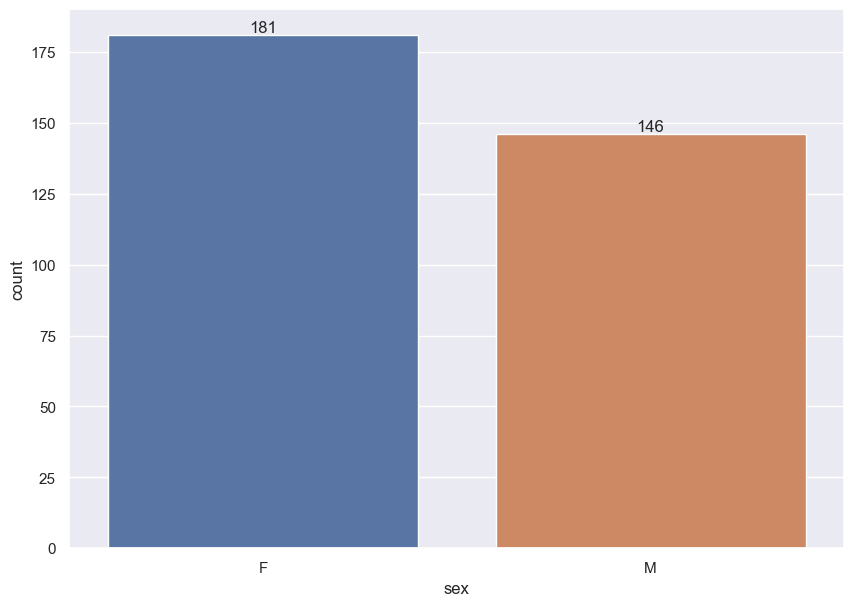

In [22]:
ax = sns.countplot(x='sex', data=df)
ax.bar_label(ax.containers[0])

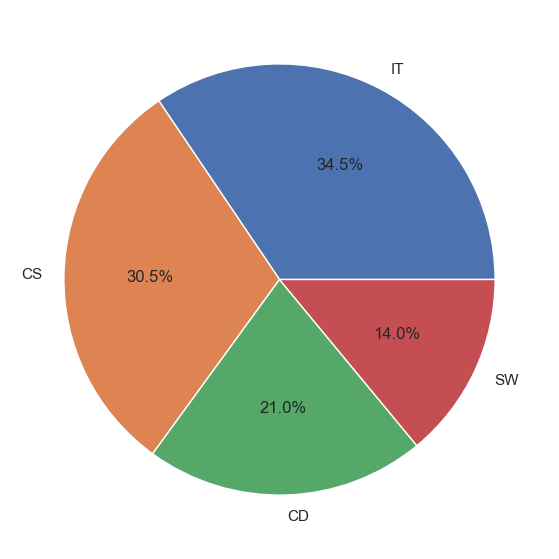

In [23]:
from matplotlib.pyplot import pie, show
course = ["IT", "CS", "CD", "SW"]
count = [123, 109, 75, 50]
courses = df["course"].value_counts()
plt.pie(count, labels=course, autopct='%1.1f%%')
show() 

To dissect even further in term of courses.The most populated garnered data in term of courses was coming from IT with a number population of 123, followed  by the CS with 109 students, and CD with 75 and least was SW with 50 only 50 count data.

Text(0, 0.5, 'Count')

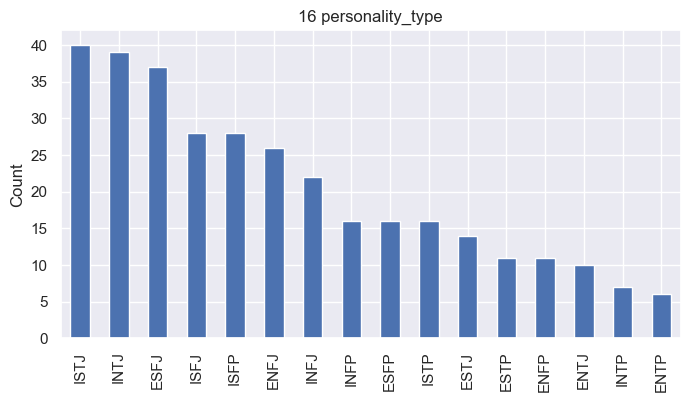

In [24]:
#count 'sex' column ing pie chart
df["personality_type"].value_counts()[:].plot(kind='bar', title='16 personality_type', figsize=(8,4)).set_ylabel("Count")

Most of the students for irregardless of program that they are in, the ISTJ type of personality garnered the most number, followed by the INTJ students.

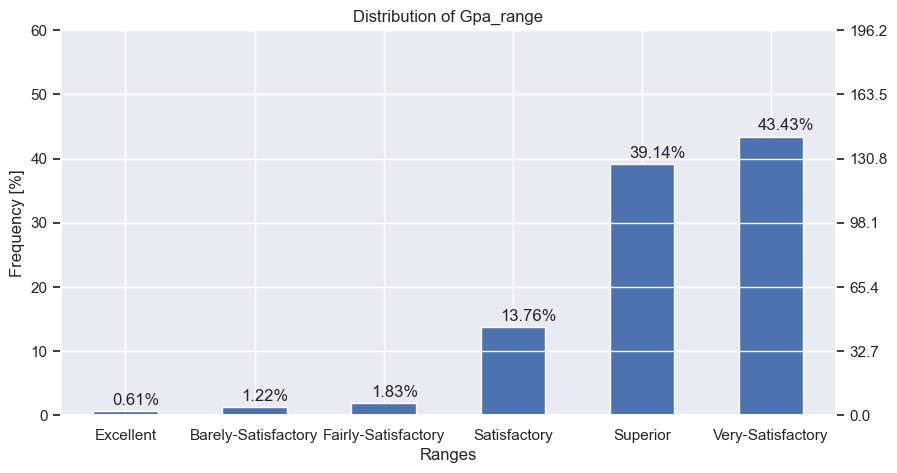

In [25]:
plt.figure(figsize=(10,5))
ax = (df.gpa_range.value_counts()/len(df)*100).sort_values().plot(kind="bar", rot=0)
plt.title('Distribution of Gpa_range')
plt.xlabel('Ranges')
plt.ylabel('Frequency [%]')

ax.set_yticks(np.arange(0, 70, 10))
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 70, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

Distribution of gpa_range the majority of the sample population is having Very-Satifactory range nd its 43.27% of sample population, followed by the superior range with 39.18%, and sstisfactory rnge ith 14.04%, 1.75% with fairly-satisfactory, 1.17% with barely-satisfactory, and the least data garnered is coming from excellent range with 0.58% of the sample population.

Text(0.5, 0, 'Count')

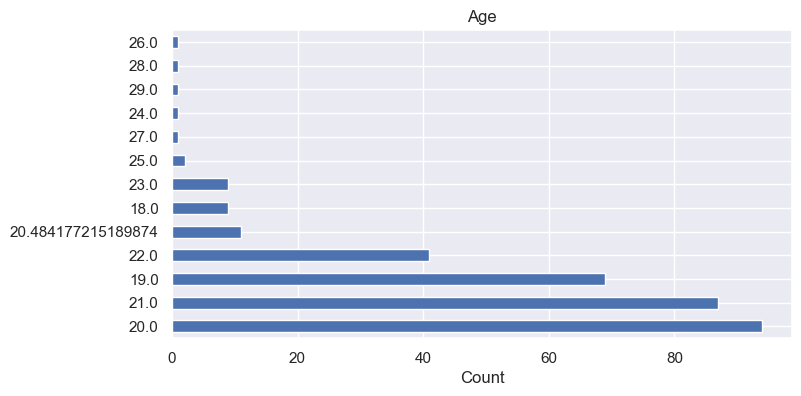

In [26]:
#count 'sex' column ing pie chart
df["age"].value_counts()[:].plot(kind='barh', title='Age', figsize=(8,4)).set_xlabel("Count")

Most of the participants in the study are 20 years old, specifically 19-21-22 years old.

In [27]:
#Count of each sex with family_support
import plotly.express as px

PersonalityPopu = df.groupby('scholar')[["fam_support"]].value_counts()
#PersonalityPopu.plot(kind='pie', colormap='jet')

#names = ["FEMALE, Yes", "FEMALE, No", "MALE, Yes", "MALE, No"]
fig = px.pie(df, values=PersonalityPopu, title="COUNT MALE & FEMALE WITH FAMILY")
fig.show()

96.36% of the sample population are reliant on their family support. However, 3.64% are "not" supported by their family, they provide their own.

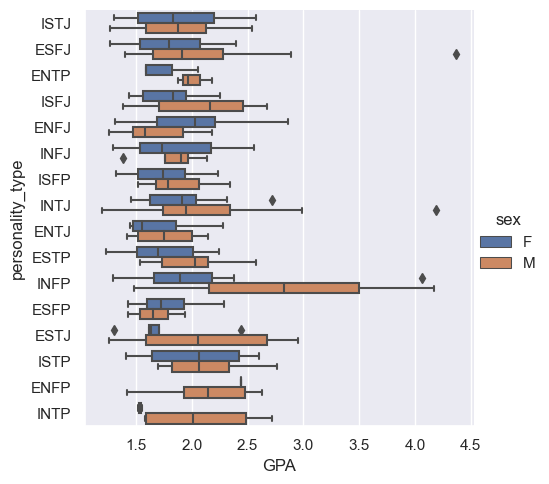

In [28]:
sns.catplot(
    data=df, x="GPA", y="personality_type", hue="sex",
    kind="box", dodge=True,
)

Male students tends to get lower GPA compare to female. 

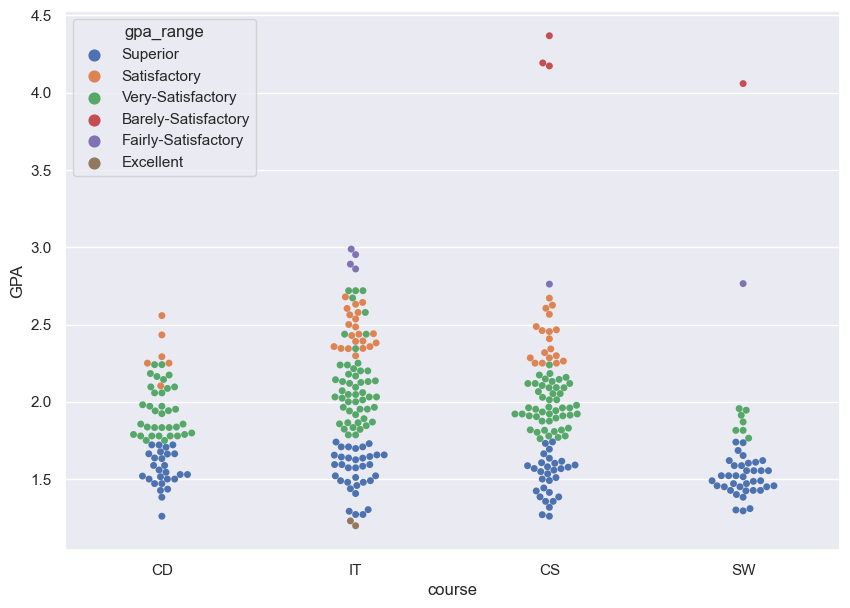

In [29]:
ax = sns.swarmplot(data=df, x="course", y="GPA", hue="gpa_range")

### PLOT TIME MANAGEMENT FOR PERSONALITY TYPE

In [30]:
#create dataframe for demographics
newDEMOinfo = df.iloc[:, [0,1,2,3,4,5,9]]

#create dummy to all tri-features
timeManagement_TM = pd.get_dummies(df.iloc[:,10:17])
classAttendancePartcipation_CAP = pd.get_dummies(df.iloc[:,17:21])

#tri-dataframes
DEMOandTM_DF = pd.concat([newDEMOinfo, timeManagement_TM], axis=1)
DEMOandCAP_DF = pd.concat([newDEMOinfo, classAttendancePartcipation_CAP], axis=1)

In [31]:
#create pivo_tabel for each tri-features for plotting
pivot_tm1_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM1_always", "TM1_sometimes","TM1_never"] , index="personality_type", aggfunc='sum')

pivot_tm2_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM2_always", "TM2_sometimes","TM2_never"] , index="personality_type", aggfunc='sum')

pivot_tm3_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM3_always", "TM3_sometimes","TM3_never"] , index="personality_type", aggfunc='sum')

pivot_tm4_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM4_always", "TM4_sometimes","TM4_never"] , index="personality_type", aggfunc='sum')

pivot_tm5_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM5_always", "TM5_sometimes","TM5_never"] , index="personality_type", aggfunc='sum')

pivot_tm6_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM6_always", "TM6_sometimes","TM6_never"] , index="personality_type", aggfunc='sum')

pivot_tm7_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM7_always", "TM7_sometimes","TM7_never"] , index="personality_type", aggfunc='sum')

Text(0.5, 1.0, 'Statement [TM1] : I have a study schedule with times set aside to study each subject')

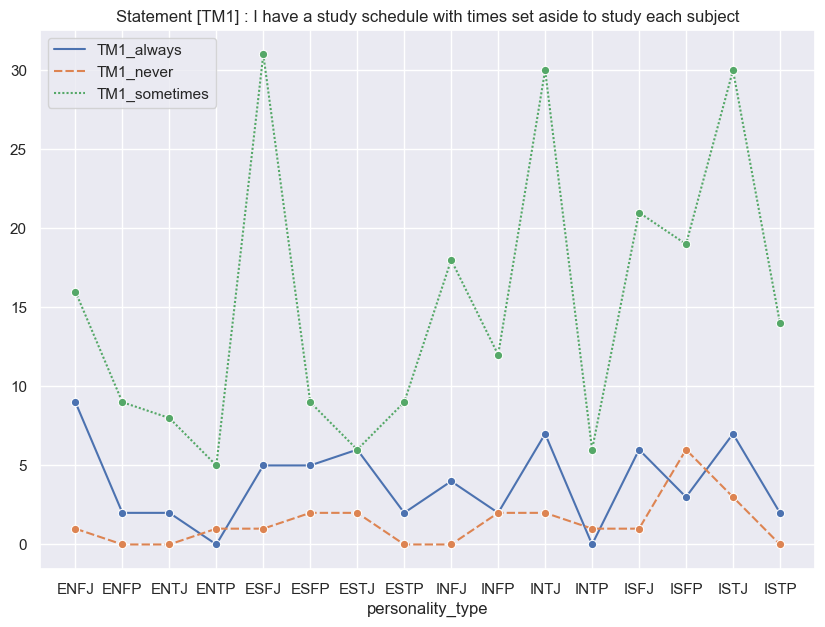

In [32]:
sns.lineplot(data=pivot_tm1_freq,
             marker="o").set_title("Statement [TM1] : I have a study schedule with times set aside to study each subject")

INTERPRETATION:
       
Most dominant personality type that "ALWAYS" scheduled their study time to settle each subjects are ENFJ, INTJ and ISTJ. As opposed to personality type who 'NEVER' clear up a time to study their respective subjects is ISFP. ESFJ, and as well  as, INTJ and ISTJ personality "SOMETIMES" had a time to to settle things. Most of the personality type has answered "SOMETIMES".Hence, students regardless of personality type has a hard time to schedule study time perhaps due to other factors.

Text(0.5, 1.0, 'Statement [TM2] : I use my free time between classes for reading or reviewing')

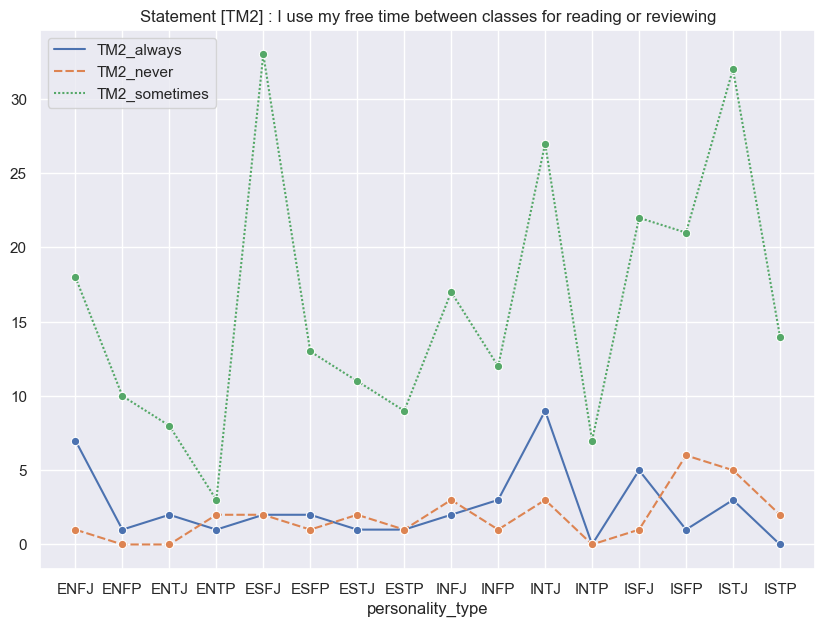

In [33]:
sns.lineplot(data=pivot_tm2_freq,
             marker="o").set_title("Statement [TM2] : I use my free time between classes for reading or reviewing")

 INTERPRETATION: 
      
All personality type are in below average in term of answering "ALWAYS". However, personality types such as ESFJ, INTJ, ISFJ, ISFP and ISTJ. Tends to use their free time for reveiwing and reading. 

Text(0.5, 1.0, 'Statement [TM3] : I balance my study time with recreation and leisure time')

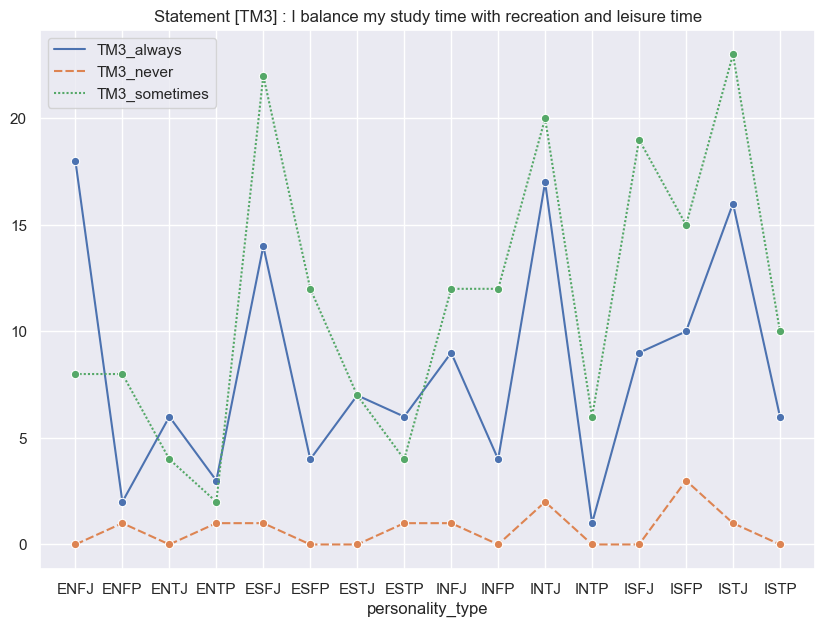

In [34]:
sns.lineplot(data=pivot_tm3_freq,
             marker="o").set_title("Statement [TM3] : I balance my study time with recreation and leisure time")

INTERPRETATION: 

ENFJ personality have a higher tendecy of balacning their academic matter and recreational activity. Additionally, ESFJ students are sometimes inclined to it along with INTJ, ESFJ, ISFJ, ISTJ.

Text(0.5, 1.0, "Statement [TM4] : I have a calendar of the semester and it's marked with the exam dates, project due dates and assignments")

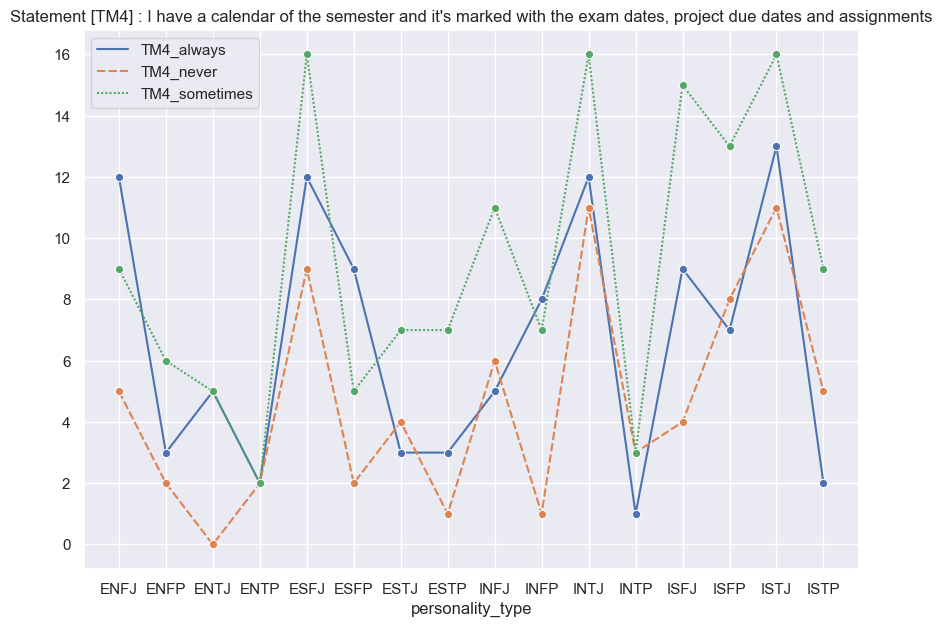

In [35]:
sns.lineplot(data=pivot_tm4_freq, 
             marker="o").set_title("Statement [TM4] : I have a calendar of the semester and it's marked with the exam dates, project due dates and assignments")

INTERPRETATION: 

Most of the personality types settled their calendar dates and marked their academic tasks. however, given the number sample for ENTP they have equal number of frequency that corresponds with the statement. Due to low number of 'always' for INTP it can be ragarded that they dont have the time to mark dates of any types of academic activity.

Text(0.5, 1.0, 'Statement [TM5] : I keep weekly schedule of classes and activities')

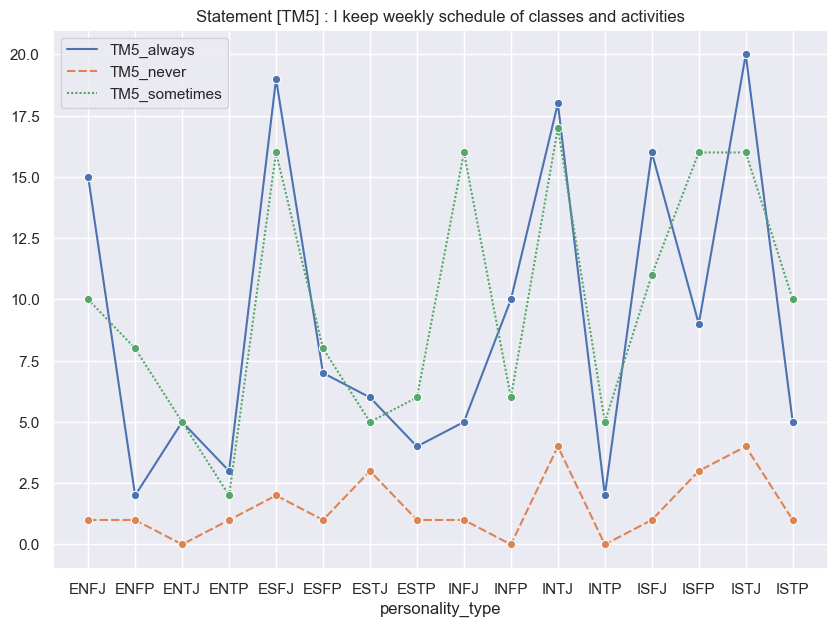

In [36]:
sns.lineplot(data=pivot_tm5_freq,
             marker="o").set_title("Statement [TM5] : I keep weekly schedule of classes and activities")

INTERPRETATION:
        
All personality types are having a weekly schedule to keep track their day-to-day classes and activities. 

Text(0.5, 1.0, 'Statement [TM6] : I use daily to do lists')

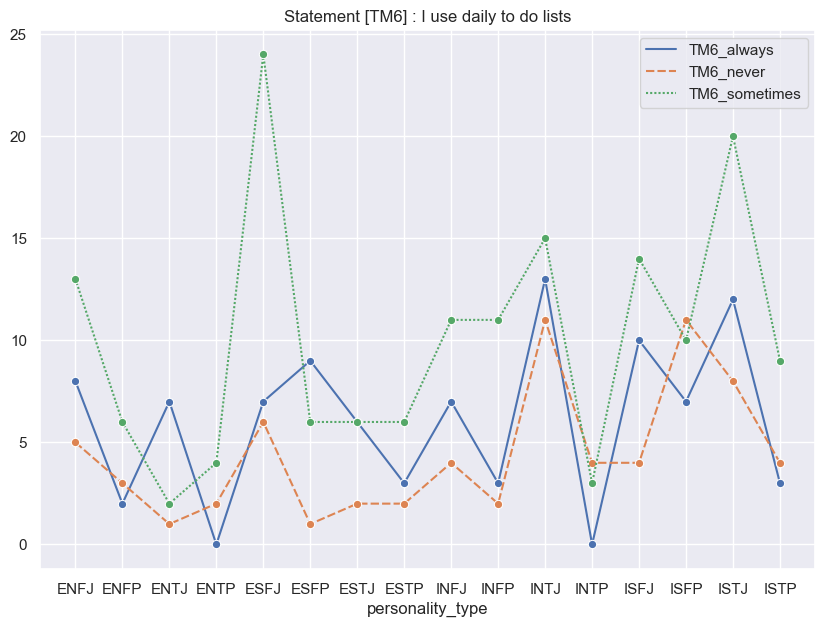

In [37]:
sns.lineplot(data=pivot_tm6_freq,
             marker="o").set_title("Statement [TM6] : I use daily to do lists")

INTERPRETATION:
        
Most of the ISFP personality type's students don't use to do list. On the other hand, majority of ENTJ had a to do list, and among the personality type it is the only type that excedes number in terms of always, regardless of its sample popualtion

Text(0.5, 1.0, 'Statement [TM7] : I study on the weekends')

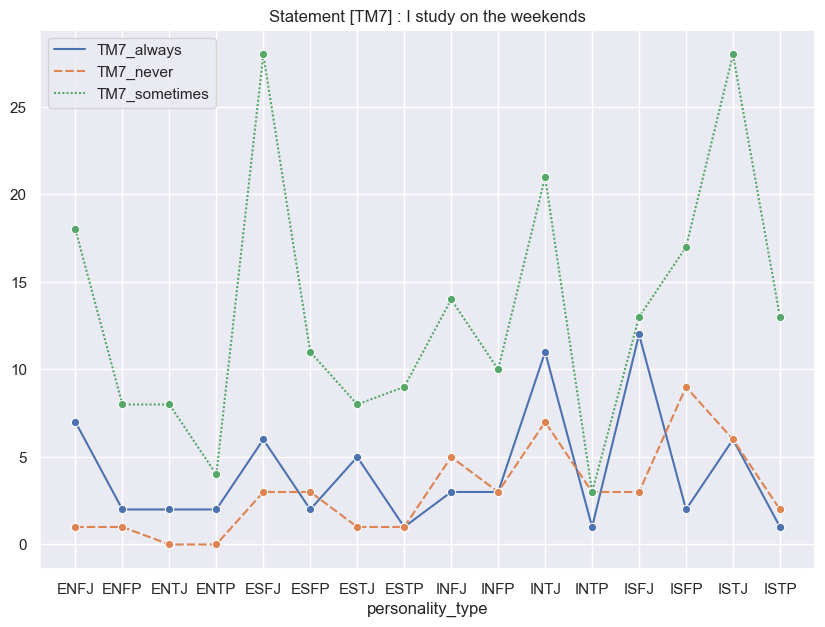

In [38]:
sns.lineplot(data=pivot_tm7_freq, 
             marker="o").set_title("Statement [TM7] : I study on the weekends")

INTERPRETATION
        
Regardless of persoanlity type students 'sometimes' studies on the weekends. ESFP, INFJ, ISFP and ISTP had a most     frequency of 'never' and being raise as the 2nd most number in respect of their population. In contrary, ISFJ type has a great number of always in terms of all types. stating that these type of personality had an effort of studying at the end of the weekends. 

----

#### Does Sample Population is Positively Consistent in their Class Attendance and Participation

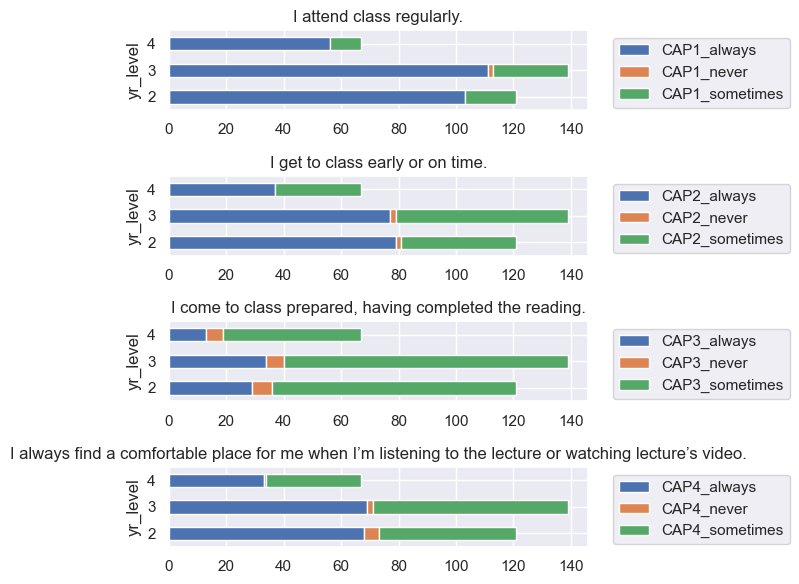

In [39]:
#create pivot_tabel for each tri-features for plotting
pivot_cap1_freq = pd.pivot_table(
    DEMOandCAP_DF, values=['CAP1_always','CAP1_never','CAP1_sometimes'] , index="yr_level", aggfunc='sum')
pivot_cap2_freq = pd.pivot_table(
    DEMOandCAP_DF, values=['CAP2_always','CAP2_never','CAP2_sometimes'] , index="yr_level", aggfunc='sum')
pivot_cap3_freq = pd.pivot_table(
    DEMOandCAP_DF, values=['CAP3_always','CAP3_never','CAP3_sometimes'] , index="yr_level", aggfunc='sum')
pivot_cap4_freq = pd.pivot_table(
    DEMOandCAP_DF, values=['CAP4_always','CAP4_never','CAP4_sometimes'] , index="yr_level", aggfunc='sum')

#Create stacked plot
fig, ax  = plt.subplots(4, 1)

pivot_cap1_freq.plot(ax=ax[0], kind="barh",title='I attend class regularly.',
                     figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_cap2_freq.plot(ax=ax[1], kind="barh",title='I get to class early or on time.',
                     figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_cap3_freq.plot(ax=ax[2], kind="barh",title='I come to class prepared, having completed the reading.',
                     figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_cap4_freq.plot(ax=ax[3],kind="barh",title='I always find a comfortable place for me when I’m listening to the lecture or watching lecture’s video.',
                     figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))

plt.tight_layout()

           INTERPRETATION
               
                All year levels particularly 2nd, 3rd and 4th level combined of two department namely College of Computer Science and College of Social Work and Community Development answered the following statement above.
                
               statement 01 : Majority of their of their population of ech year level attended their classes regularly.
               
               statement 02 : There are some students struggles to get to classs early these are students who answered 'sometimes' and 'never' taht is 40% os the sample population. This number of people is seeming competing with the total number of students who answered otherwise. This could be a note to spark a dialouge on what cause them to be unresponsive towards time.
               
               statement 03 : 70% of the sample population answered 'sometimes' enters the room unprepared. We can assume that the statement 02 is one of the factors due to this existing case.
               
               statement 04 : 52% of the sample population they always find a comfortable place for them listen to their lecture's video or virtual classes. However, 47% answered combined with sometimes and ever has aa difficulty to have a comfortable and convinient for them to focus on their academics. Since all of the sample population are not priviledge to a have good socio-economic status. We can assume that there is certain external factors that tends  to hinder their focus.

---

#### Most Used Device of the Sample Population

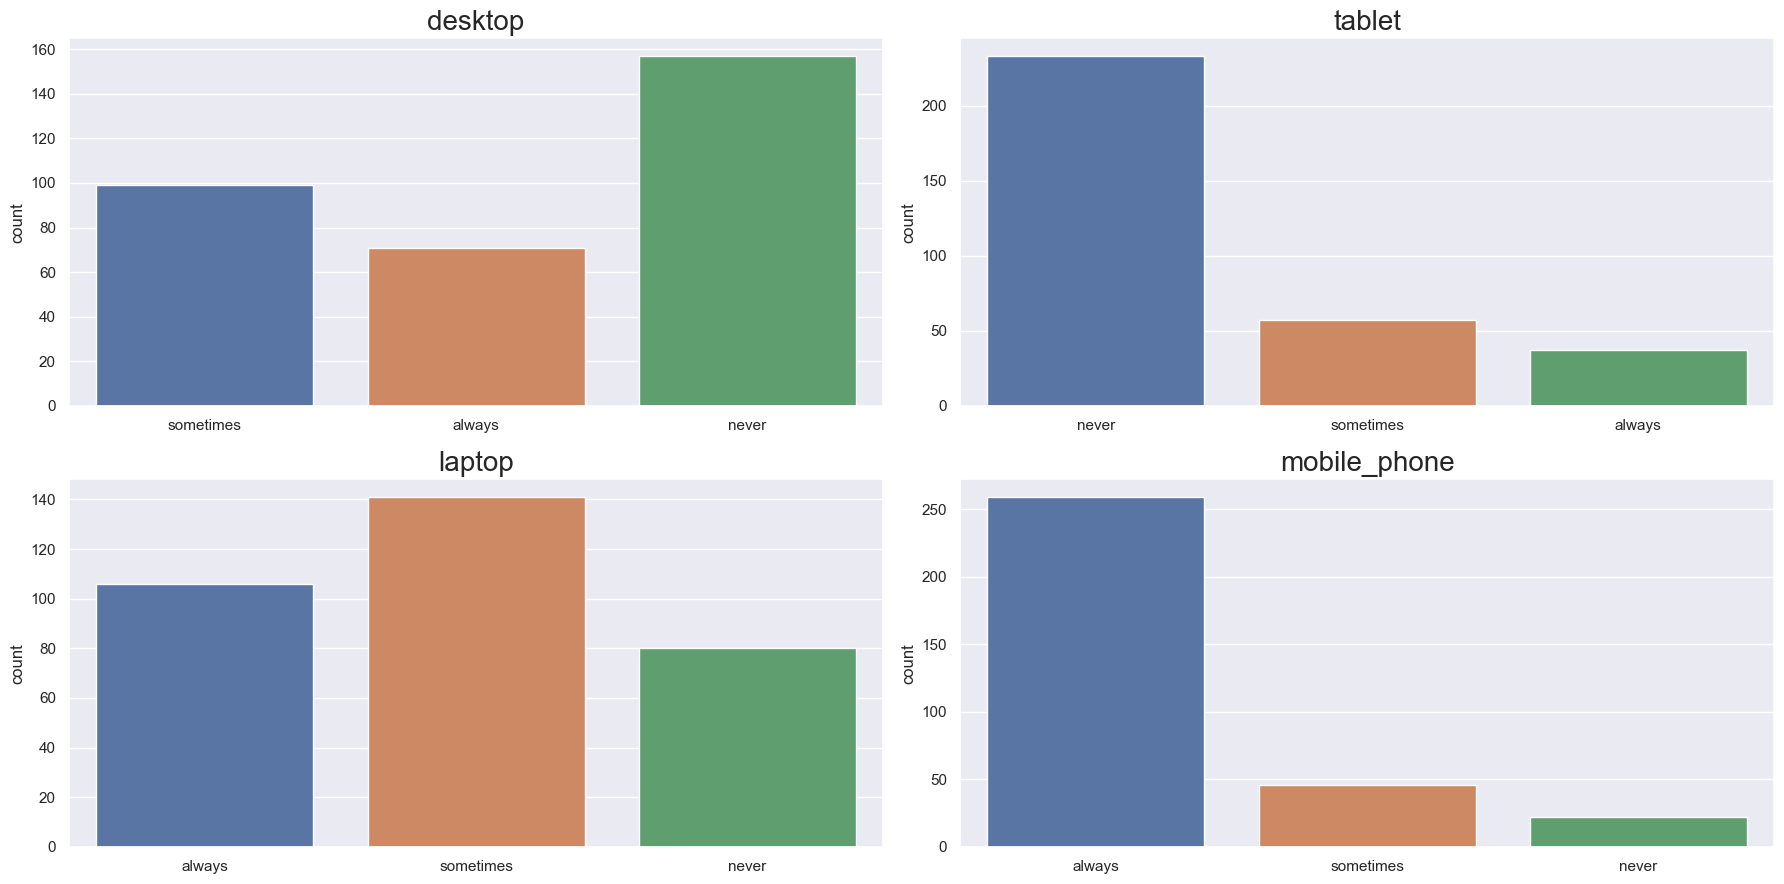

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(18,9))
sns.countplot(data=df, x="desktop", ax=ax[0,0]).set(xlabel=None)
sns.countplot(data=df, x="laptop", ax=ax[1,0]).set(xlabel=None)
sns.countplot(data=df, x="mobile_phone", ax=ax[1,1]).set(xlabel=None)
sns.countplot(data=df, x="tablet", ax=ax[0,1]).set(xlabel=None)

ax[0,0].set_title("desktop", fontsize = 20)
ax[1,0].set_title("laptop", fontsize = 20)
ax[1,1].set_title("mobile_phone", fontsize = 20)
ax[0,1].set_title("tablet", fontsize = 20)

plt.tight_layout()

        INTERPRETATION
                  According to the Sample Population the most convenient device that they use most of the time is the mobile phone, followed by laptop, desktop and tablet. 

-----

#### Does Exam Preparation is effective in getting Good grades

Text(0.5, 1.0, 'I make up exam questions using the same format that the actual exam will use.')

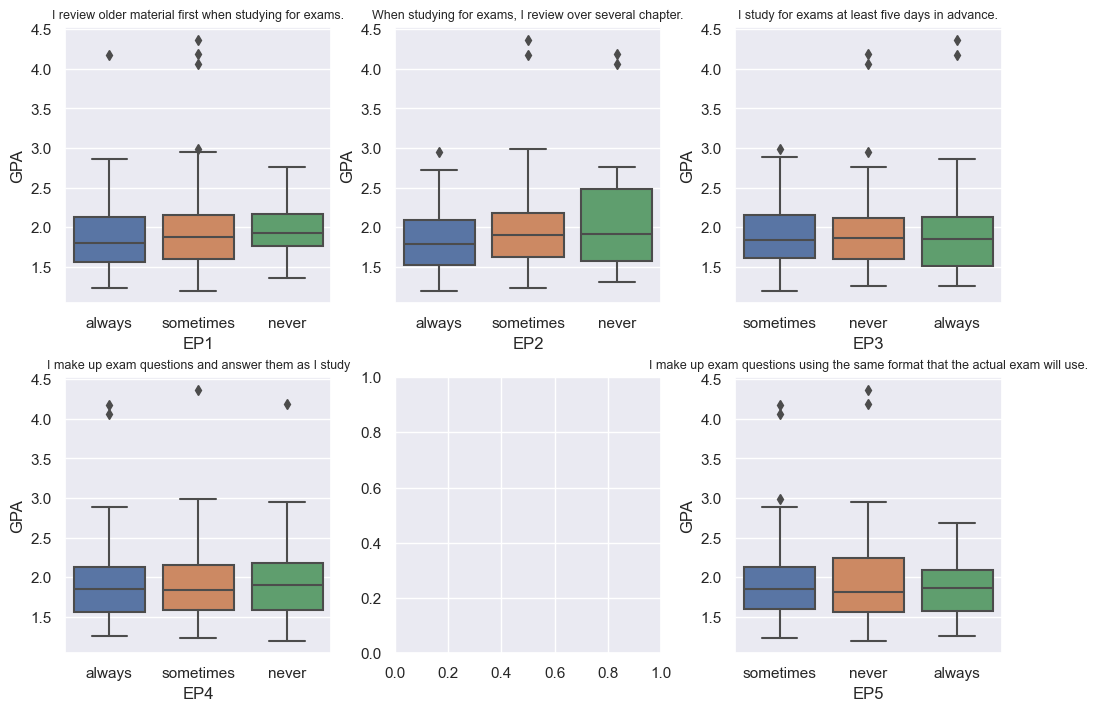

In [41]:
fig, axes = plt.subplots(2, 3, constrained_layout=True)
sns.boxplot(data=df, x="EP1", y="GPA", ax=axes[0,0]).set_title("I review older material first when studying for exams.", fontsize=9)
sns.boxplot(data=df, x="EP2", y="GPA", ax=axes[0,1]).set_title("When studying for exams, I review over several chapter.", fontsize=9)
sns.boxplot(data=df, x="EP3", y="GPA", ax=axes[0,-1]).set_title("I study for exams at least five days in advance.", fontsize=9)
sns.boxplot(data=df, x="EP4", y="GPA", ax=axes[1,0]).set_title("I make up exam questions and answer them as I study", fontsize=9)
sns.boxplot(data=df, x="EP5", y="GPA", ax=axes[-1,-1]).set_title("I make up exam questions using the same format that the actual exam will use.", fontsize=9)

       Interpretation
           
           Average Sample Population is somehow consistent within the range if 2.00 and 1.00 flat. And studies' sample population who answered "Always" in respect to the questions, has a great chance of getting a high grade near 1 flat. Therefore, Students who does the following activities is mostly inclined in getting a good or better grades.

-----

#### As Year Level increases GPA also increases.

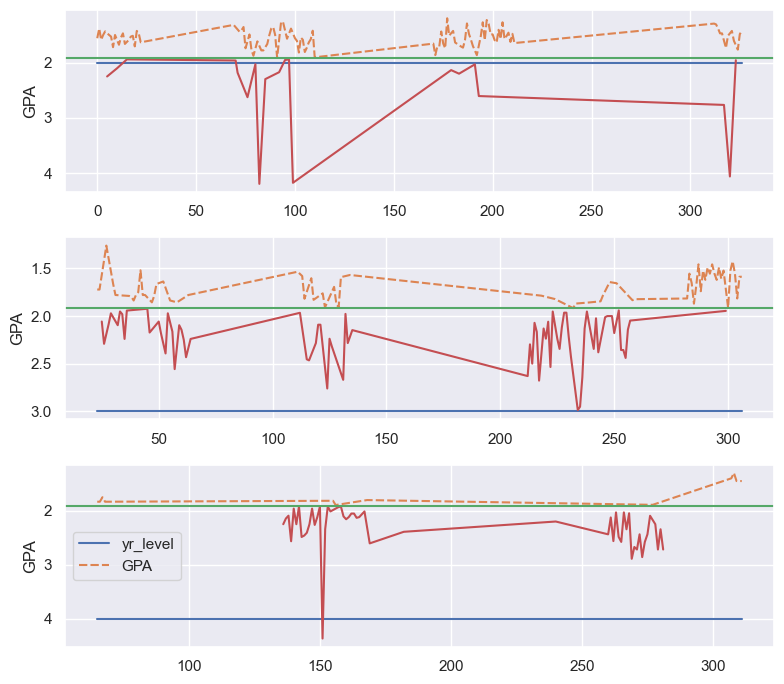

In [42]:
store_gpaAndYrLevel= newDF.iloc[:, [4,49]]
store_aboveAve_Yr2 = store_gpaAndYrLevel[(store_gpaAndYrLevel["yr_level"]==2) 
                                         & (store_gpaAndYrLevel["GPA"] <= store_gpaAndYrLevel["GPA"].mean())]
store_belowAve_Yr2 = store_gpaAndYrLevel[(store_gpaAndYrLevel["yr_level"]==2) 
                                         & (store_gpaAndYrLevel["GPA"] >= store_gpaAndYrLevel["GPA"].mean())]

store_aboveAve_Yr3 = store_gpaAndYrLevel[(store_gpaAndYrLevel["yr_level"]==3) 
                                         & (store_gpaAndYrLevel["GPA"] <= store_gpaAndYrLevel["GPA"].mean())]
store_belowAve_Yr3 = store_gpaAndYrLevel[(store_gpaAndYrLevel["yr_level"]==3) 
                                         & (store_gpaAndYrLevel["GPA"] >= store_gpaAndYrLevel["GPA"].mean())]

store_aboveAve_Yr4 = store_gpaAndYrLevel[(store_gpaAndYrLevel["yr_level"]==4)
                                         & (store_gpaAndYrLevel["GPA"] <= store_gpaAndYrLevel["GPA"].mean())]
store_belowAve_Yr4 = store_gpaAndYrLevel[(store_gpaAndYrLevel["yr_level"]==4) 
                                         & (store_gpaAndYrLevel["GPA"] >= store_gpaAndYrLevel["GPA"].mean())]

#create plotting
fig, axes = plt.subplots(3,1, figsize=(8,7))

sns.lineplot(ax = axes[0], data=store_aboveAve_Yr2, legend=None).invert_yaxis()
sns.lineplot(ax = axes[0], data=store_belowAve_Yr2["GPA"], color='r')
sns.lineplot(ax = axes[1], data=store_aboveAve_Yr3,legend=None).invert_yaxis()
sns.lineplot(ax = axes[1], data=store_belowAve_Yr3["GPA"], color='r')
sns.lineplot(ax = axes[2], data=store_aboveAve_Yr4).invert_yaxis()
sns.lineplot(ax = axes[2], data=store_belowAve_Yr4["GPA"], color='r')

axes[0].axhline(store_gpaAndYrLevel["GPA"].mean(), color='g')
axes[1].axhline(store_gpaAndYrLevel["GPA"].mean(), color='g')
axes[2].axhline(store_gpaAndYrLevel["GPA"].mean(), color='g')



plt.tight_layout()
plt.legend()
plt.show()

          INTERPRETATION
          
         There is dramatically declined of student who had an above average GPA, the illustration shows as the year level adds up THE GPA decreases.

---

#### Comparison between College

In [43]:
df_col = newDF[[ 'age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
              'personality_type', 'working_stud', 'scholar', 
              'TM3', 'TM4', 'TM5','TM6', 'TM7', 
              'CAP2', 'CAP3', 'CAP4', 
              'GSS2', 'GSS3', 'GSS4', 'GSS6', 'GSS7', 
              'EP1', 'EP2', 'EP3', 'EP5', 
              'NT1', 'NT2', 'NT3', 
              'desktop', 'laptop', 'mobile_phone', 'tablet', 
              'wifi', 'cellular_data',
              'high_speed', 'light_speed', 
              'GPA', 
              'gpa_range']]

<AxesSubplot:ylabel='college'>

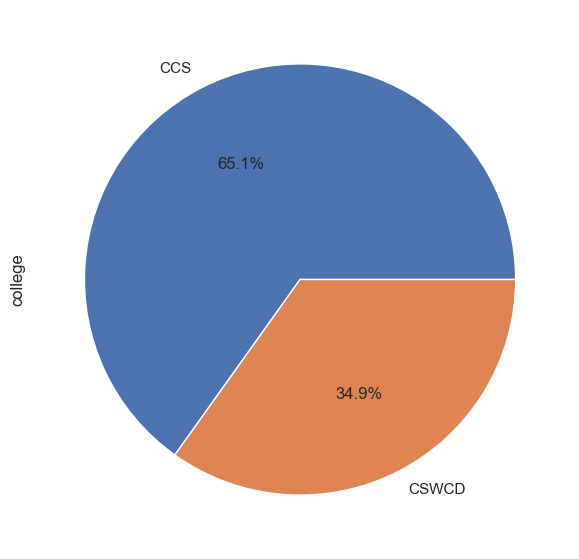

In [44]:
from matplotlib.pyplot import pie, show
def college(x):
    if x == "IT":
         return "CCS"
        
    elif  x=="CS":
        return "CCS"
    
    elif x == "SW":
        return "CSWCD"
    
    elif x=="CD":
        return "CSWCD"
    
df["college"] = df["course"].apply(college)
df["college"].value_counts().plot(kind="pie",  autopct='%1.1f%%')

the researhers gathered 65.2% of the sample population coming from CCS. And 34.8% from CSWCD.
this gave us a clear vision that there is a clear unbalance distribution for each college. however, since the study used a convenience sampling techniques, that should not be the case. Nevertheless, it can affect the generalization of interpretation.

college  yr_level  No. students
0     CCS         2            82
1     CCS         3            73
2     CCS         4            58
3   CSWCD         3            66
4   CSWCD         2            39
5   CSWCD         4             9

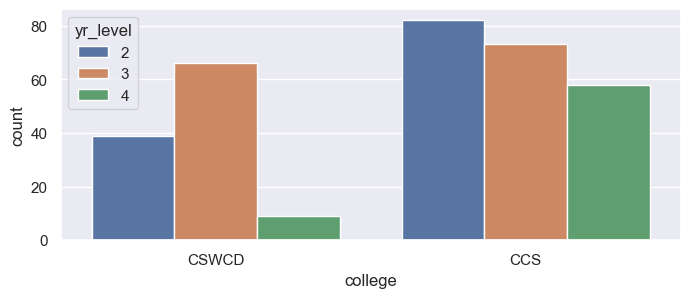

In [45]:
fig = plt.subplots(figsize=(8,3))
sns.countplot(data=df, x="college", hue="yr_level")
df.groupby(["college"])["yr_level"].value_counts().reset_index(name='No. students')

majority of the sample i the college of socia work and community development in their respecetive year levels
the most garnered data are coming from year level 3 with, 69 in total. And the least collected under the of CSWCD 
is the year level 4 with 10 participants only. It clearly shows what particular level outnumbered the other,
collected in regards with their colleges.

In [46]:
df["college"].value_counts()

CCS      213
CSWCD    114
Name: college, dtype: int64

In [47]:
"""
    The CCS year-level population will be randomly selected for comparison.
    Given the sample population of 2nd, 3rd, and 4th year levels for each college,
    Since the sample population of the CCS college outnumbered the sample population of the CSWCD,
    Researchers decided to equalize the number for each year level.
    by doing sample randomization for each year level, corresponding to the number of samples
    population CSWCD year levels
"""

Year2ndCCS_sample = df.sample(n=40, random_state=42, axis='index')
Year3rdCCS_sample = df.sample(n=69, random_state=42, axis='index')
Year4thCCS_sample = df.sample(n=10, random_state=42, axis='index')

#sample size to 
CCS_sample = df[df["college"] == "CCS"].sample(n=114, random_state=42, axis='index')
CSWCD_sample = df[df["college"] == "CSWCD"].sample(n=114, random_state=42, axis='index')

2ND year CCS :  (40, 52)
2ND year CSWCD :  (39, 3)
3RD year CCS :  (69, 52)
3RD year CSWCD :  (66, 3)
4TH year CCS :  (10, 52)
4TH year CSWCD :  (9, 3)


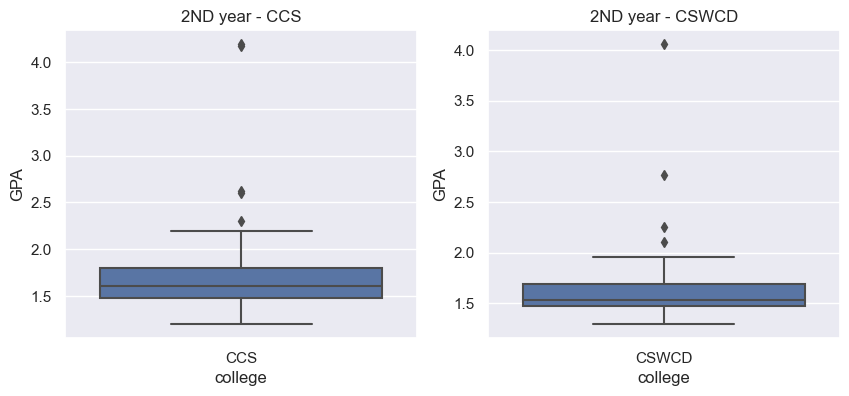

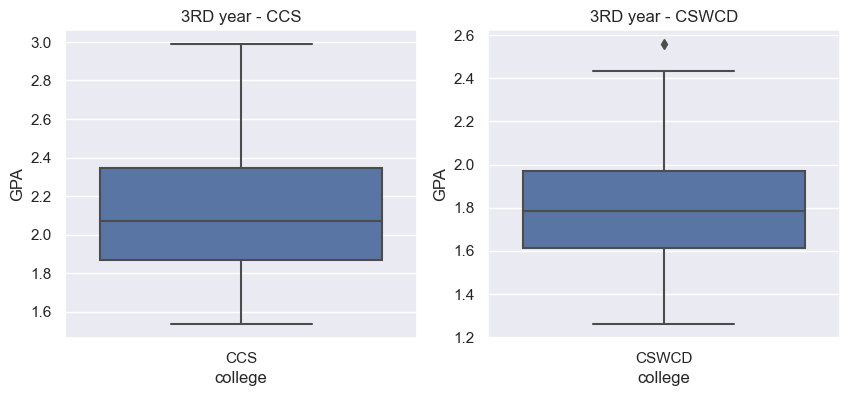

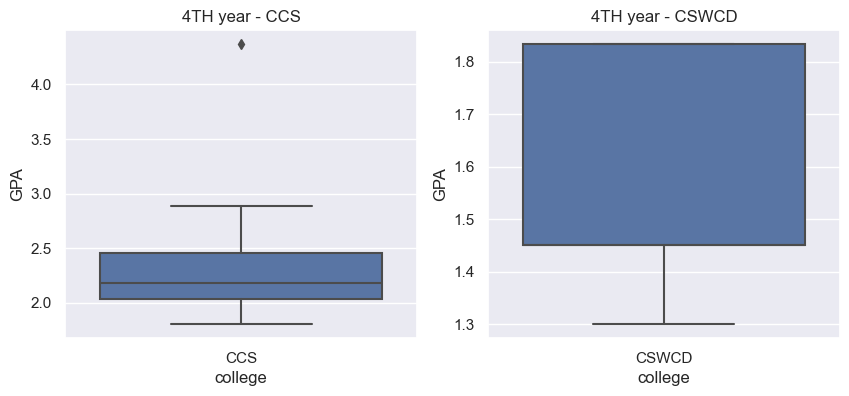

In [48]:
select_col = pd.DataFrame(df, columns = ["college","yr_level", "GPA"])

# CCS - Year_levels
CCS = ['CCS']
CCS_2nd = [2]
CCS_3rd = [3]
CCS_4th = [4]

# CSWCD - Year_levels
CSWCD = ['CSWCD']
CSWCD_2nd = [2]
CSWCD_3rd = [3]
CSWCD_4th = [4]


#dataframe CCS 2nd year 
CCS_2ndStud = select_col.loc[(select_col["college"].isin(CCS)) & (select_col["yr_level"].isin(CCS_2nd))]
#dataframe CCS 3rd year 
CCS_3rdStud = select_col.loc[(select_col["college"].isin(CCS)) & (select_col["yr_level"].isin(CCS_3rd))]
#dataframe CCS 2nd year 
CCS_4thStud = select_col.loc[(select_col["college"].isin(CCS)) & (select_col["yr_level"].isin(CCS_4th))]


#dataframe CSWCD 2nd year 
CSWCD_2ndStud = select_col.loc[(select_col["college"].isin(CSWCD)) & (select_col["yr_level"].isin(CSWCD_2nd))]
#dataframe CSWCD 3rd year 
CSWCD_3rdStud = select_col.loc[(select_col["college"].isin(CSWCD)) & (select_col["yr_level"].isin(CSWCD_3rd))]
#dataframe CSWCD 4th year 
CSWCD_4thStud = select_col.loc[(select_col["college"].isin(CSWCD)) & (select_col["yr_level"].isin(CSWCD_4th))]


fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(data=CCS_2ndStud, x="college", y="GPA", ax=axes[0]).set_title("2ND year - CCS")
sns.boxplot(data=CSWCD_2ndStud, x="college", y="GPA", ax=axes[1]).set_title("2ND year - CSWCD")

print("2ND year CCS : ", Year2ndCCS_sample.shape)
print("2ND year CSWCD : ",CSWCD_2ndStud.shape)


fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(data=CCS_3rdStud, x="college", y="GPA", ax=axes[0]).set_title("3RD year - CCS")
sns.boxplot(data=CSWCD_3rdStud, x="college", y="GPA", ax=axes[1]).set_title("3RD year - CSWCD")

print("3RD year CCS : ", Year3rdCCS_sample.shape)
print("3RD year CSWCD : ",CSWCD_3rdStud.shape)

fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(data=CCS_4thStud, x="college", y="GPA", ax=axes[0]).set_title("4TH year - CCS")
sns.boxplot(data=CSWCD_4thStud, x="college", y="GPA", ax=axes[1]).set_title("4TH year - CSWCD")

print("4TH year CCS : ", Year4thCCS_sample.shape)
print("4TH year CSWCD : ",CSWCD_4thStud.shape)

<AxesSubplot:ylabel='GPA'>

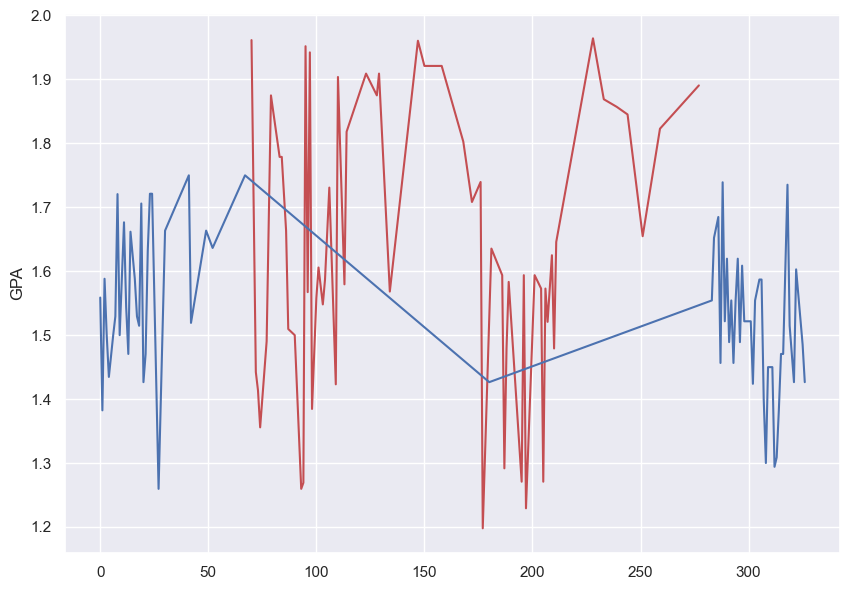

In [49]:
store_aboveAve_CCS = CCS_sample[(CCS_sample["college"]=="CCS") 
                                         & (CCS_sample["GPA"] <= CCS_sample["GPA"].mean())]

store_aboveAve_CSWCD = CSWCD_sample[(CSWCD_sample["college"]=="CSWCD") 
                                         & (CSWCD_sample["GPA"] <= CSWCD_sample["GPA"].mean())]

sns.lineplot(data=store_aboveAve_CCS["GPA"],  color='r')
sns.lineplot(data=store_aboveAve_CSWCD["GPA"],color='b')

majority student of college of social work and community development got GPA clsoer to 1 flat compares to the coolege of computer studies. shockingly the 4th student of CSWCD sytudent GPA got atleast 2.0 GPA.

# Student's study habits
The following study habits category that is being utilized below was selected as the selected variable with the highest k-score involving chi2 score. these are 'TM3', 'TM4', 'TM5','TM6', 'TM7', 'CAP2', 'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4','GSS5', 'GSS6', 'GSS7', 'EP1', 'EP2', 'EP3', 'EP5', 'NT1', 'NT2', 'NT3'. Using the new stored sample for each college to have equal distribution of respondents.

'TM3', 'TM4', 'TM5','TM6', 'TM7', //DONE 
'CAP2', 'CAP3', 'CAP4', //DONE
'GSS1', 'GSS2', 'GSS3', 'GSS4','GSS5', 'GSS6', 'GSS7', //DONE
'EP1', 'EP2', 'EP3', 'EP5', //DONE
'NT1', 'NT2', 'NT3',

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          327 non-null    object 
 1   age                 327 non-null    float64
 2   sex                 327 non-null    object 
 3   course              327 non-null    object 
 4   yr_level            327 non-null    int64  
 5   socioeconomic_stat  327 non-null    object 
 6   fam_support         327 non-null    object 
 7   working_stud        327 non-null    object 
 8   scholar             327 non-null    object 
 9   personality_type    327 non-null    object 
 10  TM1                 327 non-null    object 
 11  TM2                 327 non-null    object 
 12  TM3                 327 non-null    object 
 13  TM4                 327 non-null    object 
 14  TM5                 327 non-null    object 
 15  TM6                 327 non-null    object 
 16  TM7     

In [51]:
#create dataframe for each sample dataframe
newDEMOinfoCCS = CCS_sample.iloc[:, [0,1,2,3,4,5,9,51]]
newDEMOinfoCSWCD = CSWCD_sample.iloc[:, [0,1,2,3,4,5,9,51]]


#create dummy to all tri-features
TimeManagement = pd.get_dummies(df.iloc[:,10:17]) #'TM3', 'TM4', 'TM5','TM6', 'TM7'
ClassAttPart = pd.get_dummies(df.iloc[:, [18, 19, 20 ]]) #'CAP2', 'CAP3', 'CAP4',
GenStuStrat = pd.get_dummies(df.iloc[:, 21:28]) #'GSS1', 'GSS2', 'GSS3', 'GSS4','GSS5', 'GSS6', 'GSS7'
ExamPrep = pd.get_dummies(df.iloc[:, [28, 29, 30, 32]]) #'EP1', 'EP2', 'EP3', 'EP5'
NoteTake = pd.get_dummies(df.iloc[:, [34, 35, 36]]) #'NT1', 'NT2', 'NT3'

#tri-dataframes Category
#TIME MANAGEMENT
DEMOandTM_CCSdf = pd.concat([newDEMOinfoCCS, TimeManagement], axis=1).dropna()
DEMOandTM_CSWCDdf = pd.concat([newDEMOinfoCSWCD, TimeManagement], axis=1).dropna()

#CLASS ATTENDANCE ND PARTICIPATION
DEMOandCAP_CCSdf = pd.concat([newDEMOinfoCCS, ClassAttPart], axis=1).dropna()
DEMOandCAP_CSWCDdf = pd.concat([newDEMOinfoCSWCD, ClassAttPart], axis=1).dropna()

#GENERAL STUDY STRATEGY
DEMOandGSS_CCSdf = pd.concat([newDEMOinfoCCS, GenStuStrat], axis=1).dropna()
DEMOandGSS_CSWCDdf = pd.concat([newDEMOinfoCSWCD, GenStuStrat], axis=1).dropna()

#EXAM PREPARATION
DEMOandEP_CCSdf = pd.concat([newDEMOinfoCCS, ExamPrep], axis=1).dropna()
DEMOandEP_CSWCDdf = pd.concat([newDEMOinfoCSWCD, ExamPrep], axis=1).dropna()

#NOTE TAKING
DEMOandNT_CCSdf = pd.concat([newDEMOinfoCCS, NoteTake], axis=1).dropna()
DEMOandNT_CSWCDdf = pd.concat([newDEMOinfoCSWCD, NoteTake], axis=1).dropna()

collegeSample_TM = DEMOandTM_CCSdf.append(DEMOandTM_CSWCDdf) #aggregated sample dataframe [TM]
collegeSample_CAP = DEMOandCAP_CCSdf.append(DEMOandCAP_CSWCDdf) #aggregated sample dataframe [CAP]
collegeSample_GSS = DEMOandGSS_CCSdf.append(DEMOandGSS_CSWCDdf) #aggregated sample dataframe [GSS]
collegeSample_EP = DEMOandEP_CCSdf.append(DEMOandEP_CSWCDdf) #aggregated sample dataframe [GSS]
collegeSample_NT = DEMOandNT_CCSdf.append(DEMOandNT_CSWCDdf) #aggregated sample dataframe [GSS]

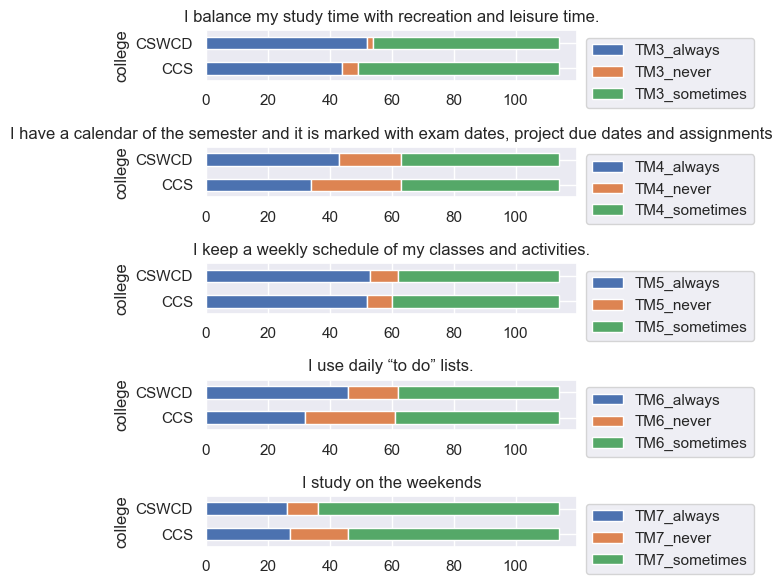

In [52]:
#create pivot_tabel for each tri-features for plotting
pivot_tm3_freq = pd.pivot_table(
    collegeSample_TM, values=['TM3_always','TM3_never','TM3_sometimes'] , index="college", aggfunc='sum')
pivot_tm4_freq = pd.pivot_table(
    collegeSample_TM, values=['TM4_always','TM4_never','TM4_sometimes'] , index="college", aggfunc='sum')
pivot_tm5_freq = pd.pivot_table(
    collegeSample_TM, values=['TM5_always','TM5_never','TM5_sometimes'] , index="college", aggfunc='sum')
pivot_tm6_freq = pd.pivot_table(
    collegeSample_TM, values=['TM6_always','TM6_never','TM6_sometimes'] , index="college", aggfunc='sum')
pivot_tm7_freq = pd.pivot_table(
    collegeSample_TM, values=['TM7_always','TM7_never','TM7_sometimes'] , index="college", aggfunc='sum')

#Create stacked plot
fig, ax  = plt.subplots(5, 1)

pivot_tm3_freq.plot(ax=ax[0], kind="barh",title='I balance my study time with recreation and leisure time.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_tm4_freq.plot(ax=ax[1], kind="barh",title='I have a calendar of the semester and it is marked with exam dates, project due dates and assignments',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_tm5_freq.plot(ax=ax[2], kind="barh",title='I keep a weekly schedule of my classes and activities.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_tm6_freq.plot(ax=ax[3], kind="barh",title='I use daily “to do” lists.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_tm7_freq.plot(ax=ax[4], kind="barh",title='I study on the weekends',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))

plt.tight_layout()

##### CLASS ATTENDANCE AND PARTICIPATION

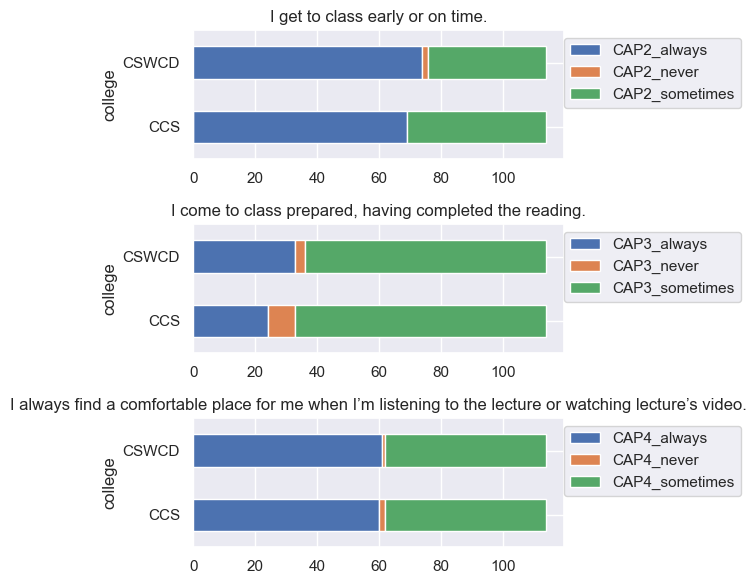

In [53]:
#create pivot_tabel for each tri-features for plotting
#'CAP2', 'CAP3', 'CAP4',

pivot_cap2_freq = pd.pivot_table(
    collegeSample_CAP, values=['CAP2_always','CAP2_never','CAP2_sometimes'] , index="college", aggfunc='sum')
pivot_cap3_freq = pd.pivot_table(
    collegeSample_CAP, values=['CAP3_always','CAP3_never','CAP3_sometimes'] , index="college", aggfunc='sum')
pivot_cap4_freq = pd.pivot_table(
    collegeSample_CAP, values=['CAP4_always','CAP4_never','CAP4_sometimes'] , index="college", aggfunc='sum')


#Create stacked plot
fig, ax  = plt.subplots(3, 1)

pivot_cap2_freq.plot(ax=ax[0], kind="barh",title='I get to class early or on time.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_cap3_freq.plot(ax=ax[1], kind="barh",title='I come to class prepared, having completed the reading.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_cap4_freq.plot(ax=ax[2], kind="barh",title='I always find a comfortable place for me when I’m listening to the lecture or watching lecture’s video.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))

plt.tight_layout()

##### GENERAL STUDY STRATEGY

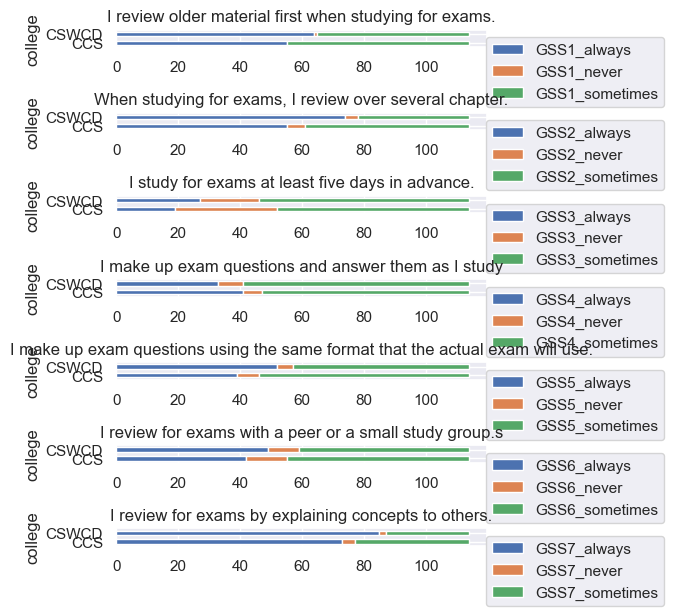

In [54]:
#create pivot_tabel for each tri-features for plotting
pivot_gss1_freq = pd.pivot_table(
    collegeSample_GSS, values=['GSS1_always', 'GSS1_never', 'GSS1_sometimes'] , index="college", aggfunc='sum')
pivot_gss2_freq = pd.pivot_table(
    collegeSample_GSS, values=['GSS2_always', 'GSS2_never', 'GSS2_sometimes'] , index="college", aggfunc='sum')
pivot_gss3_freq = pd.pivot_table(
    collegeSample_GSS, values=['GSS3_always', 'GSS3_never', 'GSS3_sometimes'] , index="college", aggfunc='sum')
pivot_gss4_freq = pd.pivot_table(
    collegeSample_GSS, values=['GSS4_always', 'GSS4_never', 'GSS4_sometimes'] , index="college", aggfunc='sum')
pivot_gss5_freq = pd.pivot_table(
    collegeSample_GSS, values=['GSS5_always', 'GSS5_never', 'GSS5_sometimes'] , index="college", aggfunc='sum')
pivot_gss6_freq = pd.pivot_table(
    collegeSample_GSS, values=['GSS6_always', 'GSS6_never', 'GSS6_sometimes'] , index="college", aggfunc='sum')
pivot_gss7_freq = pd.pivot_table(
    collegeSample_GSS, values=['GSS7_always', 'GSS7_never', 'GSS7_sometimes'] , index="college", aggfunc='sum')


#Create stacked plot
fig, ax  = plt.subplots(7, 1)

pivot_gss1_freq.plot(ax=ax[0], kind="barh",title='I review older material first when studying for exams.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_gss2_freq.plot(ax=ax[1], kind="barh",title='When studying for exams, I review over several chapter.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_gss3_freq.plot(ax=ax[2], kind="barh",title='I study for exams at least five days in advance.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_gss4_freq.plot(ax=ax[3], kind="barh",title='I make up exam questions and answer them as I study',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_gss5_freq.plot(ax=ax[4], kind="barh",title='I make up exam questions using the same format that the actual exam will use.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_gss6_freq.plot(ax=ax[5], kind="barh",title='I review for exams with a peer or a small study group.s',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_gss7_freq.plot(ax=ax[6], kind="barh",title='I review for exams by explaining concepts to others.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))

plt.tight_layout()

##### EXAM PREPARATION

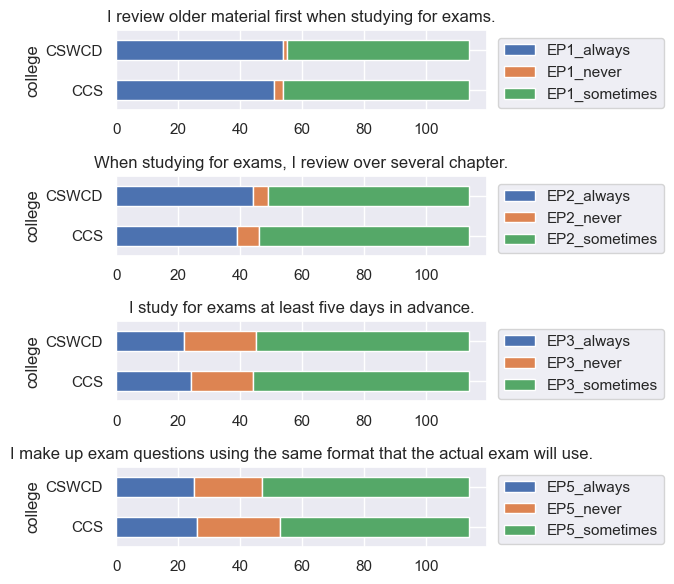

In [55]:
#create pivot_tabel for each tri-features for plotting

pivot_EP1_freq = pd.pivot_table(
    collegeSample_EP, values=['EP1_always','EP1_never','EP1_sometimes'] , index="college", aggfunc='sum')
pivot_EP2_freq = pd.pivot_table(
    collegeSample_EP, values=['EP2_always','EP2_never','EP2_sometimes'] , index="college", aggfunc='sum')
pivot_EP3_freq = pd.pivot_table(
    collegeSample_EP, values=['EP3_always','EP3_never','EP3_sometimes'] , index="college", aggfunc='sum')
pivot_EP5_freq = pd.pivot_table(
    collegeSample_EP, values=['EP5_always','EP5_never','EP5_sometimes'] , index="college", aggfunc='sum')

#Create stacked plot
fig, ax  = plt.subplots(4, 1)

pivot_EP1_freq.plot(ax=ax[0], kind="barh",title='I review older material first when studying for exams.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_EP2_freq.plot(ax=ax[1], kind="barh",title='When studying for exams, I review over several chapter.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_EP3_freq.plot(ax=ax[2], kind="barh",title='I study for exams at least five days in advance.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_EP5_freq.plot(ax=ax[3], kind="barh",title='I make up exam questions using the same format that the actual exam will use.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))

plt.tight_layout()

##### NOTE TAKING

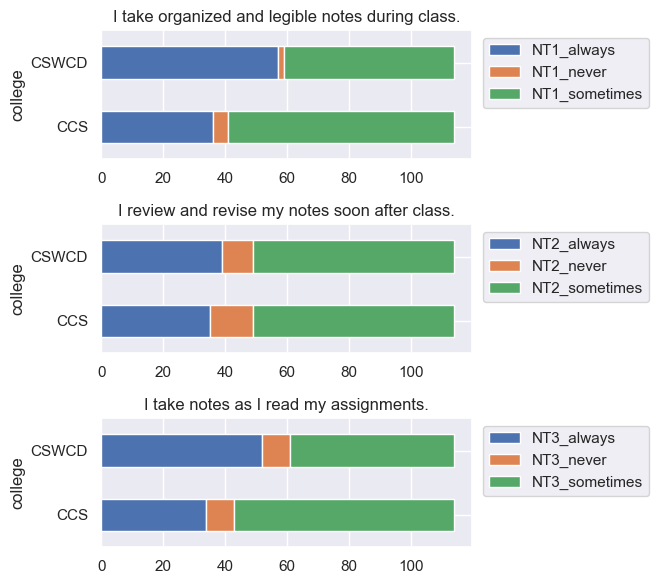

In [56]:
#create pivot_tabel for each tri-features for plotting

pivot_NT1_freq = pd.pivot_table(
    collegeSample_NT, values=['NT1_always','NT1_never','NT1_sometimes'] , index="college", aggfunc='sum')
pivot_NT2_freq = pd.pivot_table(
    collegeSample_NT, values=['NT2_always','NT2_never','NT2_sometimes'] , index="college", aggfunc='sum')
pivot_NT3_freq = pd.pivot_table(
    collegeSample_NT, values=['NT3_always','NT3_never','NT3_sometimes'] , index="college", aggfunc='sum')

#Create stacked plot
fig, ax  = plt.subplots(3, 1)

pivot_NT1_freq.plot(ax=ax[0], kind="barh",title='I take organized and legible notes during class.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_NT2_freq.plot(ax=ax[1], kind="barh",title='I review and revise my notes soon after class.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_NT3_freq.plot(ax=ax[2], kind="barh",title='I take notes as I read my assignments.',
                    figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))


plt.tight_layout()

----

-----

# Checking Outliers

[Text(0.5, 1.0, 'Outliers of StudInfo_DF')]

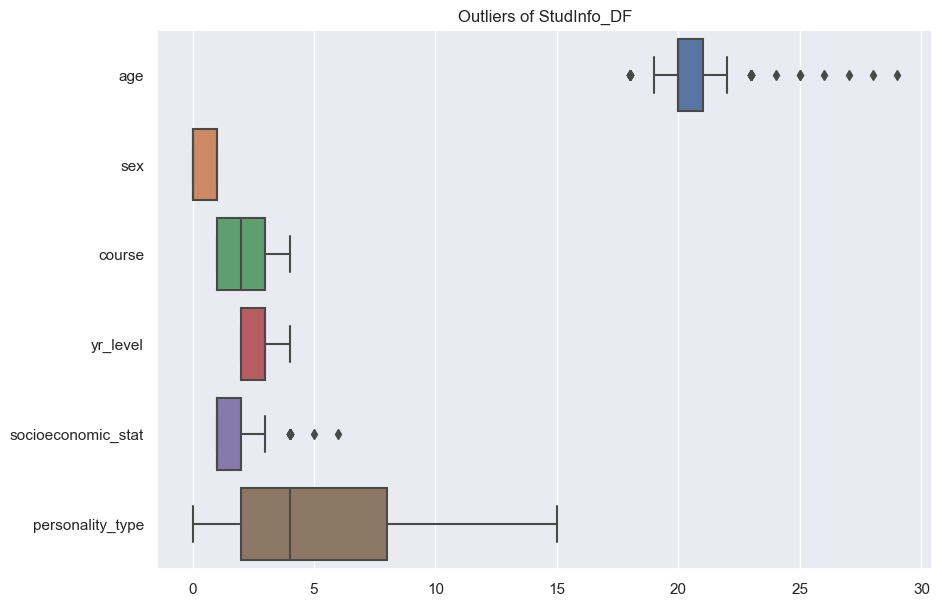

In [57]:
sns.boxplot(data=StudInfo_DF, orient = "h").set(title="Outliers of StudInfo_DF")

the newly created dataframe concatinated with different column, StudInfo_DF. it shows that exist an outliers  for the age and socio-economic status column. The researhers would like to remain as is, and continue the process with these outliers.


[Text(0.5, 1.0, 'Box Plot of GPA')]

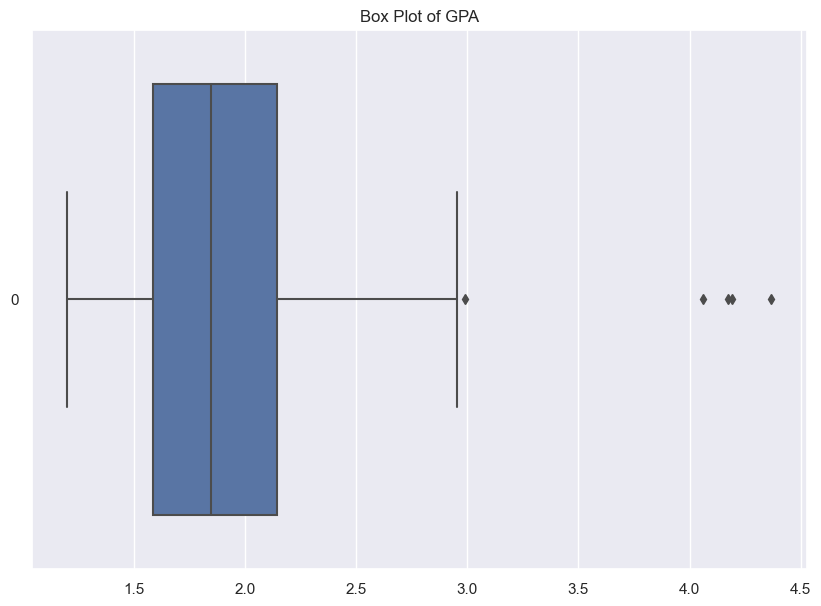

In [58]:
sns.boxplot(data=newDF.iloc[:,49], orient = "h").set(title="Box Plot of GPA")

the average range for gpa in the sample population is within 1.5 and 2.0 and it extends to the maximum of 3.0  GPA. though, we have stil garnered student who got lower gpa within 4.0 to 4.5 gp. The reseacrhe, would like to work with these outliers. the sole purpose of thi retention of outlier is that study should variation and representation for population.

[Text(0.5, 1.0, 'Box Plot of Tri-Features')]

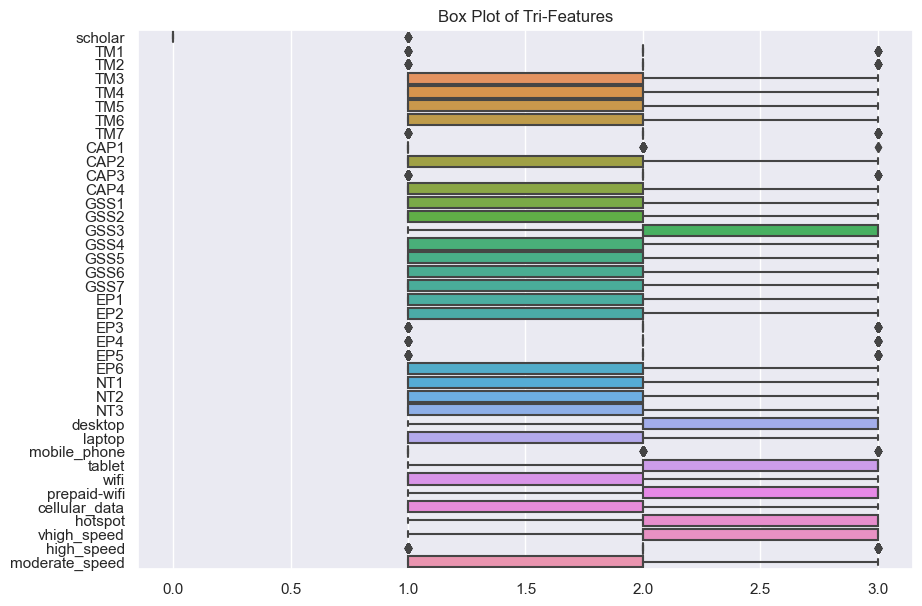

In [59]:
sns.boxplot(data=newDF.iloc[:,9:48], orient = "h").set(title="Box Plot of Tri-Features")

this boxplot can defined what majority chose in terms of this tri features. and these following iutliers should be remain.

value counts for gpa_range :  gpa_range
3            142
2            128
4             45
5              6
6              4
1              2
dtype: int64


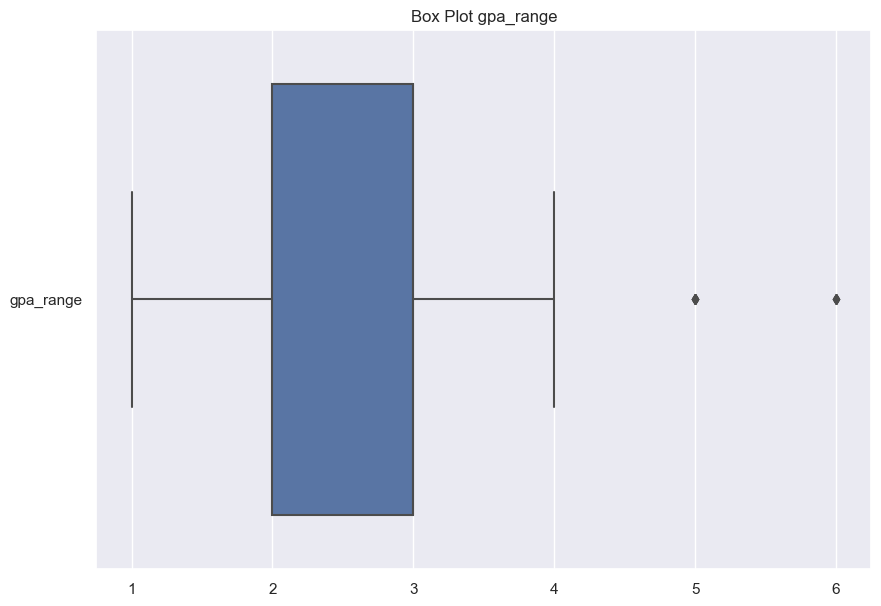

In [60]:
# fig, ax = plt.subplots(figsize=(12,4))
# ax = sns.countplot(newDF["gpa_range"])

sns.boxplot(data=Select_gpa_DF, orient = "h").set(title="Box Plot gpa_range")
print("value counts for gpa_range : ", Select_gpa_DF.value_counts())

[1 = 'Excellent'], 
[2 = 'Superior'], 
[3 = 'Very-Satisfactory'], 
[4 = 'Satisfactory'], 
[5 = 'Fairly-Satisfactory'], 
[6 = 'Barely-Satisfactory'],

gpa_range columns has an outliers these are the 5 and 6, the researhers decided to remain these ff. outliers in order to have a representation for people who belong witht these type of gpa range. 

----

# Split data to train and test dataset

In [61]:
df_train = newDF[['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'fam_support', 'working_stud', 'scholar', 'TM1',
       'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2', 'CAP3',
       'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6', 'GSS7', 'EP1',
       'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2', 'NT3', 'desktop',
       'laptop', 'mobile_phone', 'tablet', 'wifi', 'prepaid-wifi',
       'cellular_data', 'hotspot', 'vhigh_speed', 'high_speed',
       'moderate_speed', 'light_speed', 'gpa_range']]

In [62]:
df_train.shape

(327, 49)

In [63]:
features=df_train.columns[0:-1].values
print('Features : \n', features)

Features : 
 ['age' 'sex' 'course' 'yr_level' 'socioeconomic_stat' 'personality_type'
 'fam_support' 'working_stud' 'scholar' 'TM1' 'TM2' 'TM3' 'TM4' 'TM5'
 'TM6' 'TM7' 'CAP1' 'CAP2' 'CAP3' 'CAP4' 'GSS1' 'GSS2' 'GSS3' 'GSS4'
 'GSS5' 'GSS6' 'GSS7' 'EP1' 'EP2' 'EP3' 'EP4' 'EP5' 'EP6' 'NT1' 'NT2'
 'NT3' 'desktop' 'laptop' 'mobile_phone' 'tablet' 'wifi' 'prepaid-wifi'
 'cellular_data' 'hotspot' 'vhigh_speed' 'high_speed' 'moderate_speed'
 'light_speed']


In [64]:
target=df_train.columns[-1:].values
print('Features : \n', target)

Features : 
 ['gpa_range']


In [65]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_train, test_size=0.2, random_state=3, stratify=newDF["gpa_range"])

In [66]:
train.shape

(261, 49)

In [67]:
test.shape

(66, 49)

#### load the data in the variables 

In [68]:
#load the data in the variables 
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]

-----

-----

## Correlational Analysis Personality Type vs gpa_range 

Text(0.5, 1.0, 'kendall')

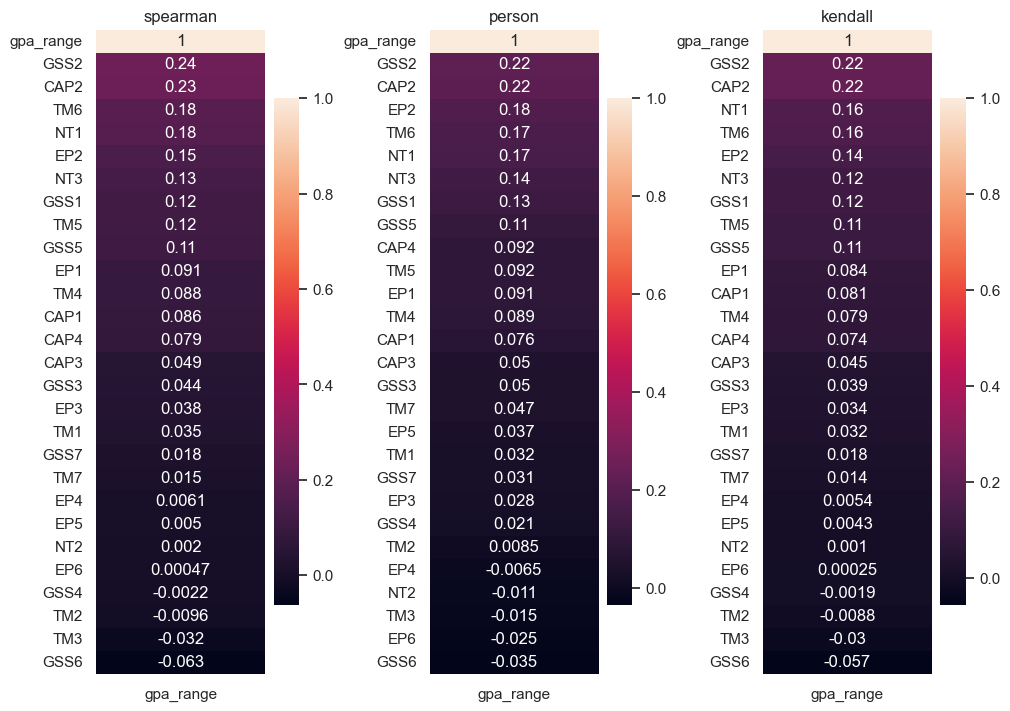

In [69]:
#gpa_range vs personality_type
study_habits = newDF.iloc[:, 10 :37]
gpa_range_PerType = pd.concat([study_habits,  Select_gpa_DF], axis=1)
_study_habitsSpearmanCorr_ = gpa_range_PerType.corr(method="spearman")[['gpa_range']].sort_values(by='gpa_range',
                                                                                            ascending=False)
_study_habitsPearsonCorr_ = gpa_range_PerType.corr(method="pearson")[['gpa_range']].sort_values(by='gpa_range',
                                                                                            ascending=False)
_study_habitsKendallCorr_ = gpa_range_PerType.corr(method="kendall")[['gpa_range']].sort_values(by='gpa_range',
                                                                                            ascending=False)
fig, axes = plt.subplots(1, 3, constrained_layout=True)
sns.heatmap(_study_habitsSpearmanCorr_, annot=True, ax=axes[0]).set_title("spearman")
sns.heatmap(_study_habitsPearsonCorr_, annot=True, ax=axes[1]).set_title("person")
sns.heatmap(_study_habitsKendallCorr_, annot=True, ax=axes[2]).set_title("kendall")

Some of the features interpret by the spearman method are closer to >= 0.1 and <= 1. it appears that the spearman way is reliable for an ordinal variable. That is why we presume that the spearman shows features with a 0.1 value. However,  features are having week relationship

### persStudy Habits vs gpa_range

<AxesSubplot:>

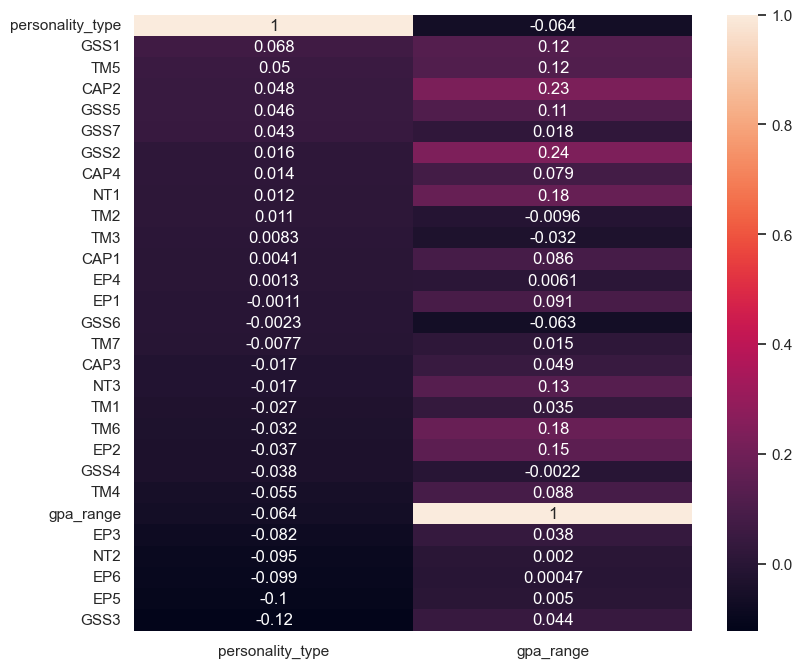

In [70]:
studyHabits_gpa = newDF[['TM1',
       'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2', 'CAP3',
       'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6', 'GSS7', 'EP1',
     'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2', 'NT3', 'personality_type']]

mydf = pd.concat([studyHabits_gpa, Select_gpa_DF], axis=1)
GPArange_PersonalityType_corr= mydf.corr(method="spearman")[['personality_type', 'gpa_range']].sort_values(by='personality_type', ascending=False)

fig, axes = plt.subplots(figsize=(9, 8))
sns.heatmap(GPArange_PersonalityType_corr, annot=True)

There is no evidence of a high positive association when using all correlation techniques (GPA range & GPA & study habits) VS personality. Even if there is a significant negative correlation, it demonstrates that characteristics have just a few relevant correlations.

----

# Split data to train and test dataset

In [71]:
df_train = newDF[['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'fam_support', 'working_stud', 'scholar', 'TM1',
       'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2', 'CAP3',
       'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6', 'GSS7', 'EP1',
       'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2', 'NT3', 'desktop',
       'laptop', 'mobile_phone', 'tablet', 'wifi', 'prepaid-wifi',
       'cellular_data', 'hotspot', 'vhigh_speed', 'high_speed',
       'moderate_speed', 'light_speed', 'gpa_range']]

print("\n dataframe shape: ",df_train.shape)

features=df_train.columns[0:-1].values
print('\nFeatures : \n', features,"\n")

target=df_train.columns[-1:].values
print('\nFeatures : \n', target, "\n")

from sklearn.model_selection import train_test_split
train, test = train_test_split(df_train, test_size=0.2, random_state=82, stratify=newDF["gpa_range"])

print("\nTrain shape: ",train.shape)

print("\nTest shape: ", test.shape)

#### load the data in the variables 

#load the data in the variables 
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]


 dataframe shape:  (327, 49)

Features : 
 ['age' 'sex' 'course' 'yr_level' 'socioeconomic_stat' 'personality_type'
 'fam_support' 'working_stud' 'scholar' 'TM1' 'TM2' 'TM3' 'TM4' 'TM5'
 'TM6' 'TM7' 'CAP1' 'CAP2' 'CAP3' 'CAP4' 'GSS1' 'GSS2' 'GSS3' 'GSS4'
 'GSS5' 'GSS6' 'GSS7' 'EP1' 'EP2' 'EP3' 'EP4' 'EP5' 'EP6' 'NT1' 'NT2'
 'NT3' 'desktop' 'laptop' 'mobile_phone' 'tablet' 'wifi' 'prepaid-wifi'
 'cellular_data' 'hotspot' 'vhigh_speed' 'high_speed' 'moderate_speed'
 'light_speed'] 


Features : 
 ['gpa_range'] 


Train shape:  (261, 49)

Test shape:  (66, 49)


----

# FEATURE SELECTION

### Apply mutual_info_classif for features selection

In [72]:
from sklearn.feature_selection import mutual_info_classif

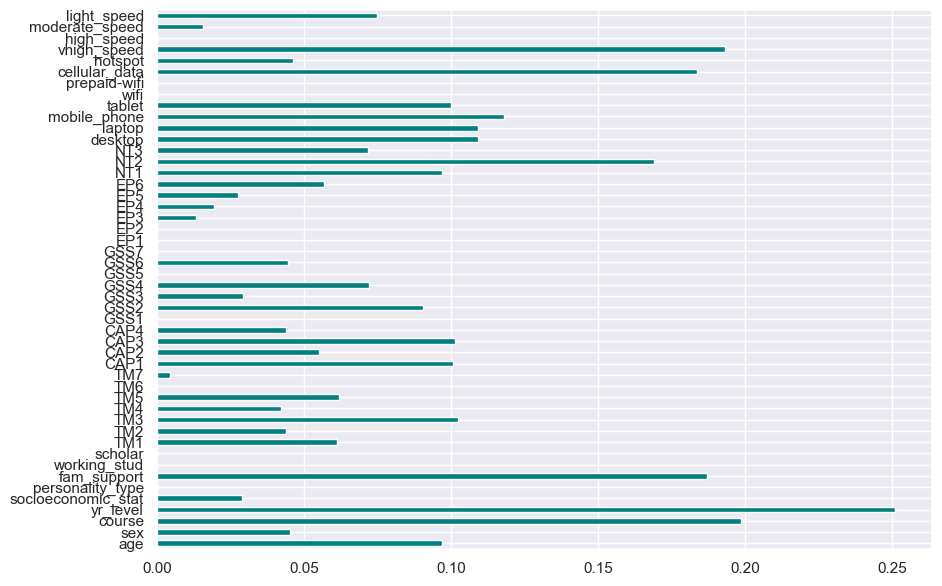

In [73]:
newX_select_mic = mutual_info_classif(X_train, Y_train)
feature_impor_mic = pd.Series(newX_select_mic, df_train.columns[0:len(df_train.columns)-1])
feature_impor_mic.plot(kind="barh", color= 'teal')
plt.show()

The mutual class info shows only seven features that exceed the 0.1 value, and these are vhigh_speed, cellular_data, mobile_phone, laptop,  NT1, NT2, NT3,  CAP3, CP1, fam_support, yr_level, course and sex. Features fam_support and  yr_level got 0.2 deal. However, more than the following determinants is needed to indicate reliable mutual information.

-----

### APPLY SPEARMAN CORRELATION

In [74]:
# Select_gpa_DF
temp_df = newDF[['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'fam_support', 'working_stud', 'scholar', 'TM1',
       'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2', 'CAP3',
       'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6', 'GSS7', 'EP1',
       'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2', 'NT3', 'desktop',
       'laptop', 'mobile_phone', 'tablet', 'wifi', 'prepaid-wifi',
       'cellular_data', 'hotspot', 'vhigh_speed', 'high_speed',
       'moderate_speed', 'light_speed']]

com_df = pd.concat([temp_df, Select_gpa_DF], axis=1)

spearman_cor = com_df.corr(method = "spearman")
spearman_target = abs(spearman_cor["gpa_range"])
SPrelevant_features1 = spearman_target[spearman_target > 0.1]
SPrelevant_features2 = spearman_target[spearman_target > 0.2]
SPrelevant_features3 = spearman_target[spearman_target > 0.3]
SPrelevant_features4 = spearman_target[spearman_target > 0.4]
SPrelevant_features5 = spearman_target[spearman_target > 0.5]
print("\nspearman method")
print("spearman features (0.1 COEF) :", SPrelevant_features1.index.tolist())
print("spearman features (0.2 COEF) :", SPrelevant_features2.index.tolist())
print("spearman features (0.3 COEF) :", SPrelevant_features3.index.tolist())
print("spearman features (0.4 COEF) :", SPrelevant_features4.index.tolist())
print("spearman features (0.5 COEF) :", SPrelevant_features5.index.tolist())


pearson_cor = com_df.corr(method = "pearson")
pearson_target = abs(pearson_cor["gpa_range"])
PRrelevant_features1 = pearson_target[pearson_target > 0.1]
PRrelevant_features2 = pearson_target[pearson_target > 0.2]
PRrelevant_features3 = pearson_target[pearson_target > 0.3]
PRrelevant_features4 = pearson_target[pearson_target > 0.4]
PRrelevant_features5 = pearson_target[pearson_target > 0.5]
print("\npearson method")
print("pearson features (0.1 COEF) :", PRrelevant_features1.index.tolist())
print("pearson features (0.2 COEF) :", PRrelevant_features2.index.tolist())
print("pearson features (0.3 COEF) :", PRrelevant_features3.index.tolist())
print("pearson features (0.4 COEF) :", PRrelevant_features4.index.tolist())
print("pearson features (0.5 COEF) :", PRrelevant_features5.index.tolist())


kendall_cor = com_df.corr(method = "kendall")
kendall_target = abs(kendall_cor["gpa_range"])
KDrelevant_features1 = kendall_target[kendall_target > 0.1]
KDrelevant_features2 = kendall_target[kendall_target > 0.2]
KDrelevant_features3 = kendall_target[kendall_target > 0.3]
KDrelevant_features4 = kendall_target[kendall_target > 0.4]
KDrelevant_features5 = kendall_target[kendall_target > 0.5]
print("\nkendall method")
print("kendall features (0.1 COEF) :", KDrelevant_features1.index.tolist())
print("kendall features (0.2 COEF) :", KDrelevant_features2.index.tolist())
print("kendall features (0.3 COEF) :", KDrelevant_features3.index.tolist())
print("kendall features (0.4 COEF) :", KDrelevant_features4.index.tolist())
print("kendall features (0.5 COEF) :", KDrelevant_features5.index.tolist())


spearman method
spearman features (0.1 COEF) : ['age', 'sex', 'course', 'yr_level', 'TM5', 'TM6', 'CAP2', 'GSS1', 'GSS2', 'GSS5', 'EP2', 'NT1', 'NT3', 'desktop', 'tablet', 'light_speed', 'gpa_range']
spearman features (0.2 COEF) : ['age', 'course', 'yr_level', 'CAP2', 'GSS2', 'gpa_range']
spearman features (0.3 COEF) : ['age', 'yr_level', 'gpa_range']
spearman features (0.4 COEF) : ['yr_level', 'gpa_range']
spearman features (0.5 COEF) : ['yr_level', 'gpa_range']

pearson method
pearson features (0.1 COEF) : ['age', 'sex', 'course', 'yr_level', 'TM6', 'CAP2', 'GSS1', 'GSS2', 'GSS5', 'EP2', 'NT1', 'NT3', 'desktop', 'mobile_phone', 'tablet', 'light_speed', 'gpa_range']
pearson features (0.2 COEF) : ['age', 'course', 'yr_level', 'CAP2', 'GSS2', 'gpa_range']
pearson features (0.3 COEF) : ['yr_level', 'gpa_range']
pearson features (0.4 COEF) : ['yr_level', 'gpa_range']
pearson features (0.5 COEF) : ['gpa_range']

kendall method
kendall features (0.1 COEF) : ['age', 'sex', 'course', 'yr_lev

all correlation methods with 0.2 positive coefficient value, they resulted the same 6 features specifically; 'age,' 'course,' 'yr_level,' 'CAP2', and 'GSS2' in respect to the particular column the 'gpa_range. Each of the methods resulted the similar features and shape. Even so the researchers experimented numbers of coefficient thresholds such as 0.1, 0.2, 0.3, 0.4 and 0.5.
however, it does not give justify the proposed independent variable of the study, it is lacked in terms of factor's representation.

------

### APPLY SelectKBest 

In [75]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
newX_select = SelectKBest(score_func=chi2, k=37).fit(X_train, Y_train)
f = newX_select.get_support(1)
X_new = X_train[X_train.columns[f]] # final features`

# Kbest_features= pd.concat([X_new,df["gpa_range"]],axis=1)
# Kbest_features = Kbest_features.dropna(axis=0, inplace=False)

print("Num Features before:", df.shape[1])
print("Num Features after:", X_new.shape[1])

Num Features before: 52
Num Features after: 37


In [76]:
X_new.columns

Index(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'working_stud', 'scholar', 'TM3', 'TM4', 'TM5',
       'TM6', 'TM7', 'CAP2', 'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4',
       'GSS5', 'GSS6', 'GSS7', 'EP1', 'EP2', 'EP3', 'EP5', 'NT1', 'NT2', 'NT3',
       'desktop', 'laptop', 'mobile_phone', 'wifi', 'cellular_data',
       'high_speed', 'light_speed'],
      dtype='object')

JUSTIFICATION:
   The researchers implemented three features selection, the mutual_info_classif, spearman correlation, and selectKBest.
   
   Since most of the interaction of each feature needs to show a substantial value, according to the spearman correlation interpreted feature of gpa_range and yr_level with 0.4 stands as the highest garnered value for all indicators. However, the researchers cannot justify other factors by accepting this result. 
   
   The researchers decide to redeem the majority of the features. To have a representation for each factor. And only feature selection that satisfies the condition is the selecKBest with score_func of chi2, resulting in 37 features.

---

----

# TRAIN AND SPLITS 37 FEATURES

In [77]:
SelectKBest_features = newDF[['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
                              'personality_type', 'working_stud', 'scholar', 
                              'TM3', 'TM4', 'TM5','TM6', 'TM7', 
                              'CAP2', 'CAP3', 'CAP4', 
                              'GSS1', 'GSS2', 'GSS3', 'GSS4','GSS5', 'GSS6', 'GSS7', 
                              'EP1', 'EP2', 'EP3', 'EP5', 
                              'NT1', 'NT2', 'NT3',
                              'desktop', 'laptop', 'mobile_phone', 
                              'wifi', 'cellular_data',
                              'high_speed', 'light_speed',
                              'gpa_range'
                             ]]

In [78]:
# SelectKBest_features["gpa_range"].shape

# features2 = SelectKBest_features.columns[0:-1].values
# features2

# target2= SelectKBest_features.columns[-1:].values
# target2

# SelectKBest_features.shape

# # train_test_split for new features 
# train2, test2 =train_test_split(SelectKBest_features, test_size=0.2, random_state=42,  
#                                 stratify = SelectKBest_features["gpa_range"])

# # Kbest_features load the data in the variables 
# X2_train = train2[features2]
# Y2_train = train2[target2]
# X2_test = test2[features2]
# Y2_test = test2[target2]

---

### Check Target Distribution

Class=4, n=128 (39.144%)
Class=3, n=45 (13.761%)
Class=5, n=142 (43.425%)
Class=0, n=4 (1.223%)
Class=2, n=6 (1.835%)
Class=1, n=2 (0.612%)


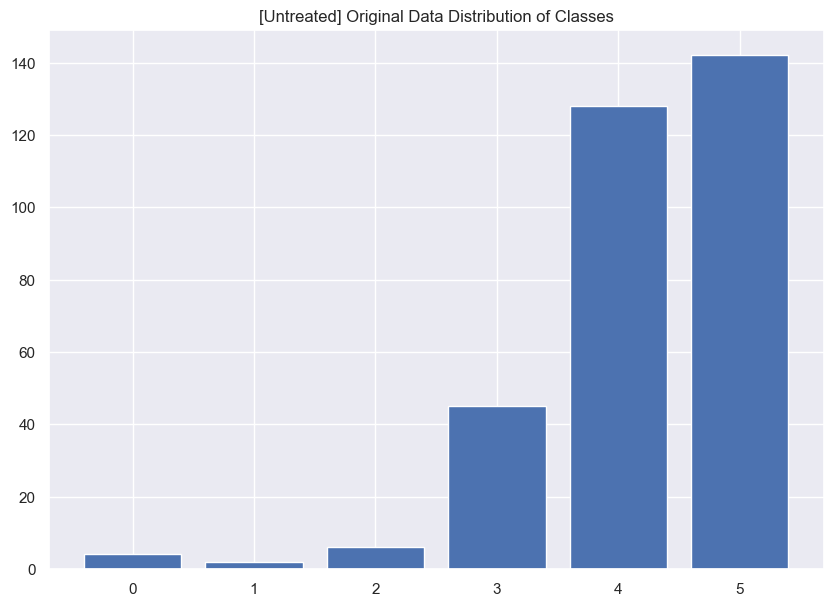

Very-Satisfactory      142
Superior               128
Satisfactory            45
Fairly-Satisfactory      6
Barely-Satisfactory      4
Excellent                2
Name: gpa_range, dtype: int64

In [79]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# Apply SMOTE Technique

data = SelectKBest_features.values

X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
plt.title("[Untreated] Original Data Distribution of Classes")
pyplot.show()
newDF["gpa_range"].value_counts()

the target distribution appears to be imbalance, the researchers will use SMOTE technique to treat this imbalance classification

Class=4, n=128 (39.144%)
Class=3, n=45 (13.761%)
Class=5, n=142 (43.425%)
Class=0, n=4 (1.223%)
Class=2, n=6 (1.835%)
Class=1, n=2 (0.612%)

# SMOTE Technique 

Class=4, n=132 (40.367%)
Class=3, n=100 (30.581%)
Class=5, n=146 (44.648%)
Class=0, n=100 (30.581%)
Class=2, n=100 (30.581%)
Class=1, n=100 (30.581%)


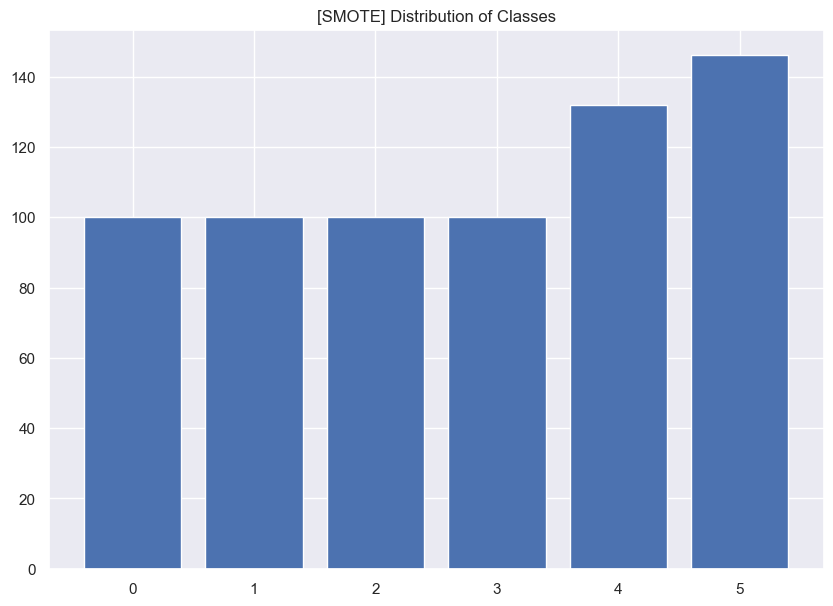

In [80]:
data = SelectKBest_features.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]

# label encode the target variable
y = LabelEncoder().fit_transform(y)

# transform the dataset
strategy = {0:100, 1:100, 2:100, 3:100, 4:132, 5:146}
xSmote, ySmote = SMOTE(k_neighbors=1, sampling_strategy=strategy, random_state=42).fit_resample(X, y)

#summarize distribution
counter = Counter(ySmote)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.title("[SMOTE] Distribution of Classes")
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [81]:
SelectKBest_features.columns

Index(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'working_stud', 'scholar', 'TM3', 'TM4', 'TM5',
       'TM6', 'TM7', 'CAP2', 'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4',
       'GSS5', 'GSS6', 'GSS7', 'EP1', 'EP2', 'EP3', 'EP5', 'NT1', 'NT2', 'NT3',
       'desktop', 'laptop', 'mobile_phone', 'wifi', 'cellular_data',
       'high_speed', 'light_speed', 'gpa_range'],
      dtype='object')

In [82]:
#train_test_split using SMOTE
XS_train, XS_test, yS_train, yS_test = train_test_split(xSmote, 
                                                        ySmote, 
                                                        test_size=0.2, 
                                                        random_state=42
                                                       )


storeXSmote = pd.DataFrame(XS_train, columns = ['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'working_stud', 'scholar', 'TM3', 'TM4', 'TM5',
       'TM6', 'TM7', 'CAP2', 'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4',
       'GSS5', 'GSS6', 'GSS7', 'EP1', 'EP2', 'EP3', 'EP5', 'NT1', 'NT2', 'NT3',
       'desktop', 'laptop', 'mobile_phone', 'wifi', 'cellular_data',
       'high_speed', 'light_speed']).astype(int) 

storeYSmote = pd.DataFrame(yS_train, columns = ["gpa_range"]).astype(int) 

--------

---

### 37 Features arranged in value scores.

[  5.72  20.29  93.46  51.28  25.28  16.53 131.64  55.95  11.08  40.
   2.23  14.63   9.92  10.39   2.8   31.83   6.57  32.6    9.71  12.06
   7.32  14.26   8.65   5.27  26.45   0.62  10.74   9.23  30.42  18.32
  20.63  19.74 111.91   6.18  14.5   17.99  35.71]


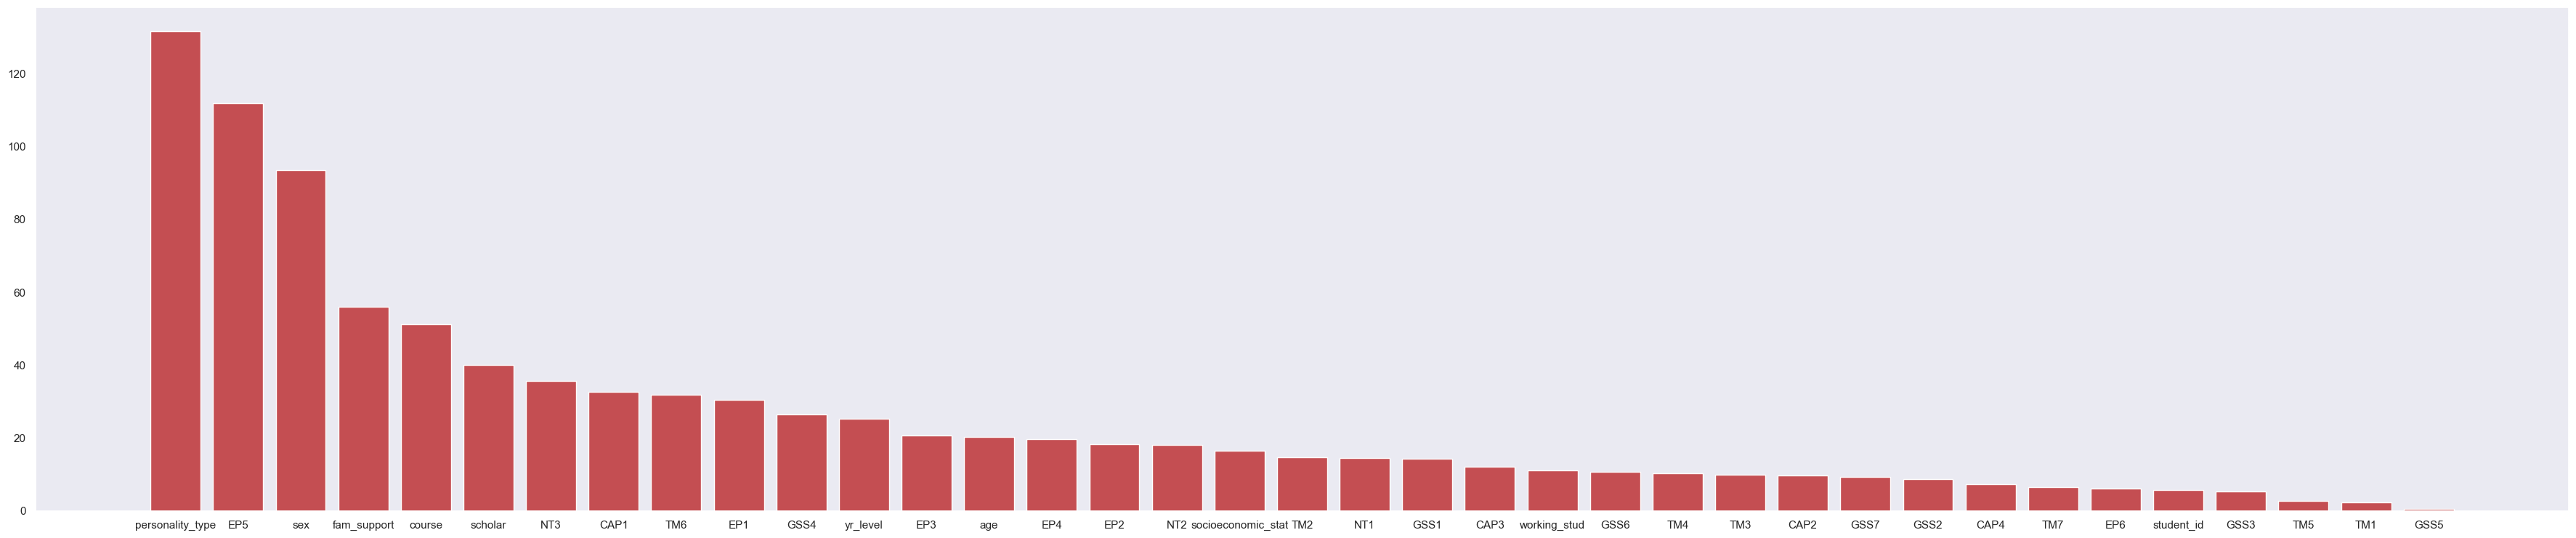

In [83]:
# feature extraction
test = SelectKBest(score_func=chi2, k=37)
fit = test.fit(XS_train, yS_train)
score = []

# summarize scores
np.set_printoptions(precision=2)

scores = score.append(fit.scores_)
print(fit.scores_)

indices = np.argsort(fit.scores_)[::-1]

# To get your top 10 feature names
features = []

for i in range(37):
    features.append(newDF.columns[indices[i]])
    
# Now plot
plt.figure(figsize=(45, 9))
plt.bar(features, fit.scores_[indices[range(37)]], color='r', align='center')
plt.draw()
plt.grid(False)
plt.savefig('C:/Users/drenz/OneDrive/Pictures/Saved Pictures/myfig.jpeg', dpi=300)
plt.show()

----

### Principal component analysis (PCA).

(542, 37)
(261, 48)


Text(0, 0.5, 'explained_variance_ratio_')

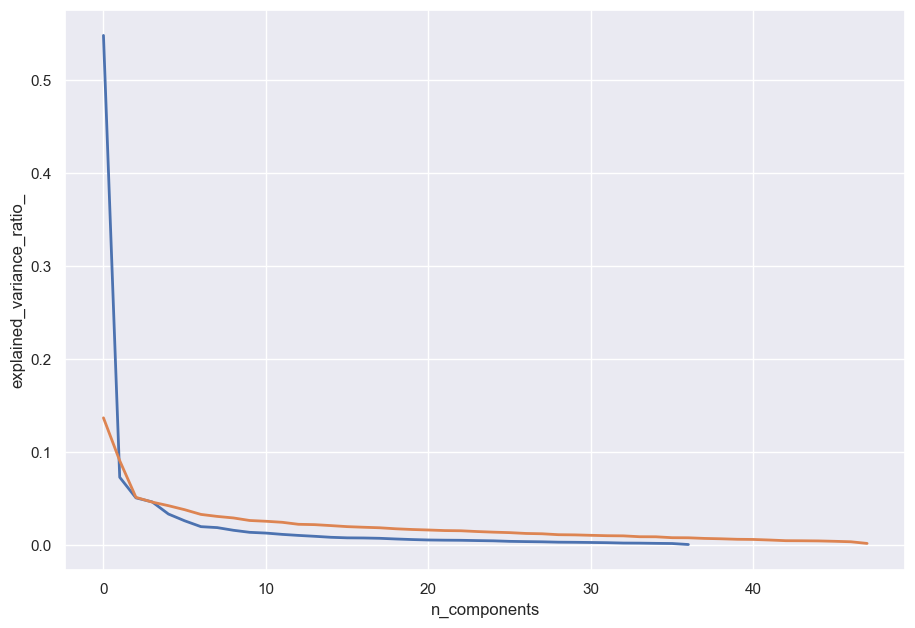

In [84]:
from sklearn.decomposition import PCA

x_train_kb = (XS_train-XS_train.mean())/(XS_train.max()-XS_train.min())

x_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())


print(x_train_kb.shape)
print(x_train_N.shape)
pca_trainkb = PCA()
pca_trainACTUAL = PCA()

pca_trainkb.fit(x_train_kb)
pca_trainACTUAL.fit(x_train_N)

plt.figure(1, figsize=(12, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca_trainkb.explained_variance_ratio_, linewidth=2)
plt.plot(pca_trainACTUAL.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

Amount of variance that each of the chosen components explains, in percentage terms.

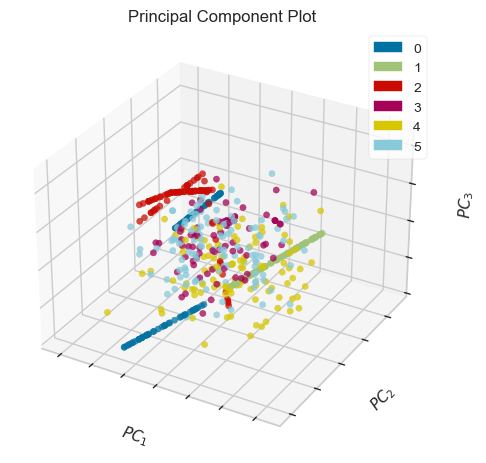


    Class=4, 

    Class=3, 

    Class=5, 

    Class=0, 

    Class=2, 

    Class=1, 



In [85]:
from yellowbrick.features import PCA
label_encoder = LabelEncoder()

encode_y = label_encoder.fit_transform(yS_train)

# classes = ['Superior', 'Satisfactory', 'Very-Satisfactory',
#        'Barely-Satisfactory', 'Fairly-Satisfactory', 'Excellent']

visualizer = PCA( projection=3, scale=True, 
)


visualizer.fit_transform(XS_train, encode_y)
visualizer.show()

print("""
    Class=4, 

    Class=3, 

    Class=5, 

    Class=0, 

    Class=2, 

    Class=1, 
""")

If spherical distance metrics can be applied, the projected dataset can be evaluated along axes of main variation and interpreted.

---

# Feature-Target Relationship

In [86]:
#created dataframe with the resample(SMOTE)
df_corSmote = pd.concat([storeXSmote, storeYSmote], axis=1)

In [87]:
df_corSmote.columns

Index(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'working_stud', 'scholar', 'TM3', 'TM4', 'TM5',
       'TM6', 'TM7', 'CAP2', 'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4',
       'GSS5', 'GSS6', 'GSS7', 'EP1', 'EP2', 'EP3', 'EP5', 'NT1', 'NT2', 'NT3',
       'desktop', 'laptop', 'mobile_phone', 'wifi', 'cellular_data',
       'high_speed', 'light_speed', 'gpa_range'],
      dtype='object')

<AxesSubplot:>

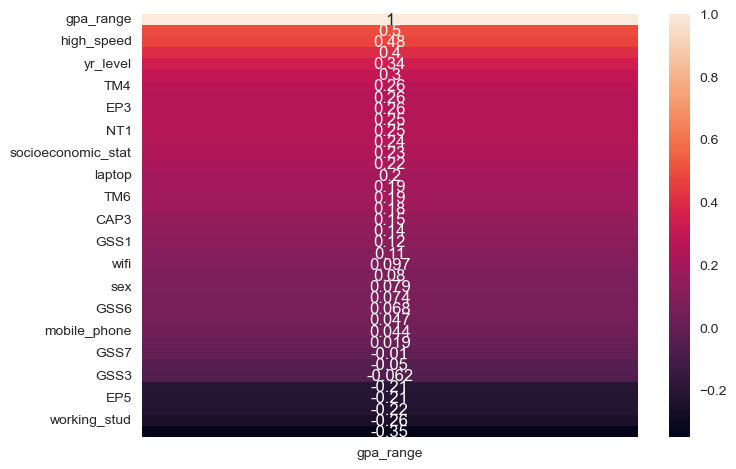

In [88]:

#visualize corralationship between feature and target
corr = df_corSmote.corr()[['gpa_range']].sort_values(by='gpa_range', ascending=False)
sns.heatmap(corr, annot=True)

----

----

# Single-Model Implementation  

### Train and test single model

[RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)] Accuracy Score:   [83.09]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        15
           3       0.93      0.52      0.67        25
           4       0.79      0.77      0.78        30
           5       0.63      0.87      0.73        31

    accuracy                           0.83       136
   macro avg       0.89      0.86      0.86       136
weighted avg       0.86      0.83      0.83       136
 

[DecisionTreeClassifier(criterion='entropy', random_state=42)] Accuracy Score:   [75.00]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.89      1.00      0.94        16
           2       0.88      0.93      0.90        15
           3       0.61      0.68      0.64    

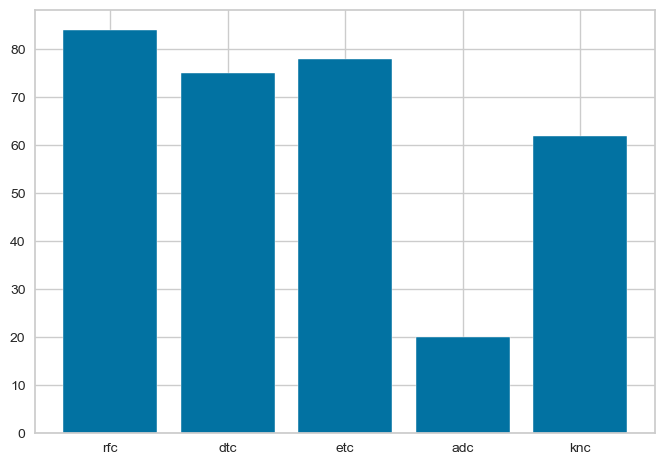

In [89]:
import math
from sklearn.model_selection import cross_val_score
results = []
names = {u"rfc": [], u"dtc": [], u"etc": [], u"adc":[], u"knc":[]}
est_single_model = [rfc, dtc, etc, adc, knc]

for single in est_single_model:
    ypred_single_clf = single.fit(XS_train, yS_train).predict(XS_test)
    accuracy = accuracy_score(yS_test, ypred_single_clf)*100
#     ypred_single_clf_OLD = single.fit(X_train,Y_train).predict(X_test)
#     accuracy_OLD = accuracy_score(Y_test, ypred_single_clf_OLD)*100
    int_acc = math.ceil(accuracy)
    
    #append accuracy inside the the dict
    if single == rfc:
        names["rfc"]=int_acc
    if single == dtc:
        names["dtc"]=int_acc
    if single == etc:
        names["etc"]=int_acc
    if single == knc:
        names["knc"]=int_acc
    if single == adc:
        names["adc"]=int_acc

    print("[{}] Accuracy Score: ".format(single), " [{:.2f}]".format(accuracy.mean()))
    print(classification_report(yS_test, ypred_single_clf, ), "\n")

algo = list(names.keys())
values = list(names.values())

plt.bar(algo, values)


print("\n")
print("cross validation with 20 splits")
est_list = [rfc, dtc, etc, adc, knc]
for estimator in est_list:
    cv = KFold(n_splits = 20,  shuffle= True, random_state=42)
    single_cv = cross_val_score(estimator, XS_train, yS_train, cv=cv)
    print("\n[{}] cross validation score : ".format(estimator), "[{:.2f}]".format(single_cv.mean()*100))

Its shows the all single model only got < 85 accuracy score. It is hypothesize that the model can be improve by combining each model that will result a better prediction. The researcher will going to prove that ensemble technique is effective lifting weak learners by using meta estimator in boosting specifically AdaBoostClassifier.

----

------

# Train and test Boosting model

In [90]:
#create list of classifiers [NEW]
estimatorsNEW = [("RandomForestClassifier", rfc), 
              ("DecisionTreeClassifier", dtc), 
              ("ExtraTreesClassifier", etc), 
              ("AdaBoostClassifier", adc),
              ("KNeighborsClassifier", knc)]

In [91]:
# Apply GradientBoostingClassifier 
from sklearn.model_selection import KFold
from sklearn.multiclass import OneVsRestClassifier
cv = StratifiedKFold(n_splits=5)

Clf_GradBoost_estNEW = GradientBoostingClassifier(
                                                    max_depth=3,
                                                    learning_rate= 0.01,
                                                    n_estimators=100,
                                                    min_samples_leaf= 2,
                                                    subsample= 0.5,
                                                    random_state= 42,
                                                    max_features=None,
                                                 )

# Clf_GradBoost_estNEW = GradientBoostingClassifier()
clf_boosting_ensembleNEW = StackingClassifier(estimators=estimatorsNEW, 
                                              final_estimator=Clf_GradBoost_estNEW, cv=cv,
                                              n_jobs=-1)

In [92]:
clf_boosting_ensembleNEW

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimators=[('RandomForestClassifier',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=5,
                                                       random_state=42)),
                               ('DecisionTreeClassifier',
                                DecisionTreeClassifier(criterion='entropy',
                                                       random_state=42)),
                               ('ExtraTreesClassifier',
                                ExtraTreesClassifier(max_depth=5,
                                                     max_features='log2',
                                                     random_state=0)),
                               ('AdaBoostClassifier',
                                AdaBoostClassifier(learning_rate=2.0,
                                                   random_state=42)),
                               ('KNeighborsClassifier',
                                KNeighborsClassifier(algorithm='brute',
                                                     leaf_size=50))],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                              min_samples_leaf=2,
                                                              random_state=42,
                                                              subsample=0.5),
                   n_jobs=-1)

In [93]:
OVR_BOOST_49 = OneVsRestClassifier(clf_boosting_ensembleNEW).fit(X_train, Y_train) 
OVR_BOOST_37 = OneVsRestClassifier(clf_boosting_ensembleNEW).fit(XS_train, yS_train) 

ypred_clf_boosting_ensembleNEW_49 = OVR_BOOST_49.predict(X_test)
ypred_clf_boosting_ensembleNEW_37 = OVR_BOOST_37.predict(XS_test)

print("\nEnsemble Boosting Model Accuracy Score for 49 features : {:.2f}".format(accuracy_score(Y_test, ypred_clf_boosting_ensembleNEW_49)*100))
print("\n",classification_report(Y_test, ypred_clf_boosting_ensembleNEW_49))
# print("\n\n===========================================================================")
print("\nEnsemble Boosting Model Accuracy Score for 37 Features: {:.2f}".format(accuracy_score(yS_test, ypred_clf_boosting_ensembleNEW_37)*100))
print("\n",classification_report(yS_test, ypred_clf_boosting_ensembleNEW_37))


Ensemble Boosting Model Accuracy Score for 49 features : 66.67

                      precision    recall  f1-score   support

Barely-Satisfactory       0.00      0.00      0.00         1
Fairly-Satisfactory       0.00      0.00      0.00         1
       Satisfactory       0.00      0.00      0.00         9
           Superior       0.72      0.81      0.76        26
  Very-Satisfactory       0.62      0.79      0.70        29

           accuracy                           0.67        66
          macro avg       0.27      0.32      0.29        66
       weighted avg       0.56      0.67      0.61        66


Ensemble Boosting Model Accuracy Score for 37 Features: 87.50

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        15
           3       0.90      0.76      0.83        25
           4       0.83      0.80      0.81   

#### Confusion Matrix of the 2 set Feature

Text(0.5, 1.0, '49 Features')

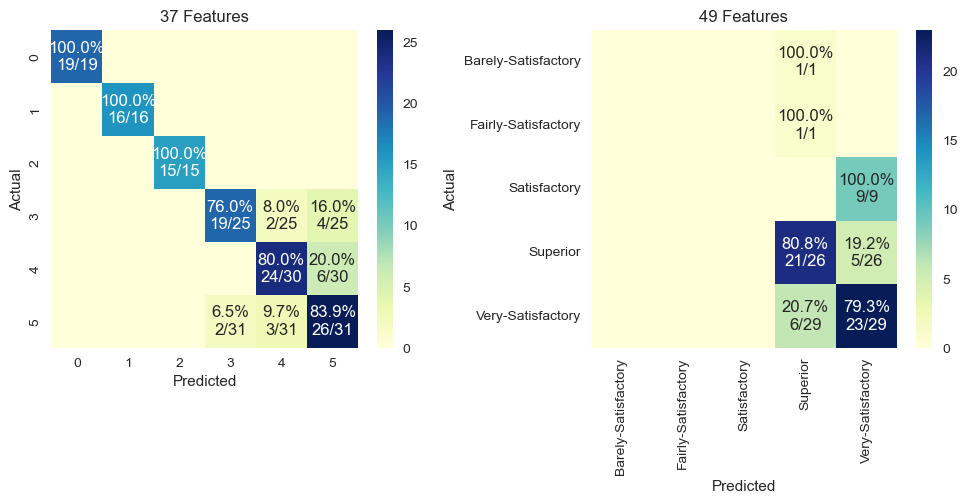

In [94]:
y1_true = yS_test
cm1 = confusion_matrix(yS_test, ypred_clf_boosting_ensembleNEW_37, labels=np.unique(y1_true))
y0_true = Y_test
cm2 = confusion_matrix(Y_test, ypred_clf_boosting_ensembleNEW_49, labels=np.unique(y0_true))

#BOOSTING WITH 25 FEATURES
cm_sum_1 = np.sum(cm1, axis=1, keepdims=True)
cm_perc_1= cm1 / cm_sum_1.astype(float) * 100
annot1 = np.empty_like(cm1).astype(str)
nrows, ncols = cm1.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm1[i, j]
        p = cm_perc_1[i, j]
        if c == 0:
            annot1[i, j] = ''
        else:
            s = cm_sum_1[i]
            annot1[i, j] = '%.1f%%\n%d/%d' % (p, c, s)

#BOOSTING WITH 49 FEATURES
cm_sum_2 = np.sum(cm2, axis=1, keepdims=True)
cm_perc_2= cm2 / cm_sum_2.astype(float) * 100
annot2 = np.empty_like(cm2).astype(str)
nrows, ncols = cm2.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm2[i, j]
        p = cm_perc_2[i, j]
        if c == 0:
            annot2[i, j] = ''
        else:
            s = cm_sum_2[i]
            annot2[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            
cm1 = pd.DataFrame(cm1, index=np.unique(y1_true), columns=np.unique(y1_true))
cm1.index.name = 'Actual'
cm1.columns.name = 'Predicted'
cm2 = pd.DataFrame(cm2, index=np.unique(y0_true), columns=np.unique(y0_true))
cm2.index.name = 'Actual'
cm2.columns.name = 'Predicted'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(cm1, cmap="YlGnBu", annot=annot1, fmt='', ax=ax[0])
sns.heatmap(cm2, cmap="YlGnBu", annot=annot2, fmt='', ax=ax[1])
plt.tight_layout()
ax[0].set_title("37 Features")
ax[1].set_title("49 Features")

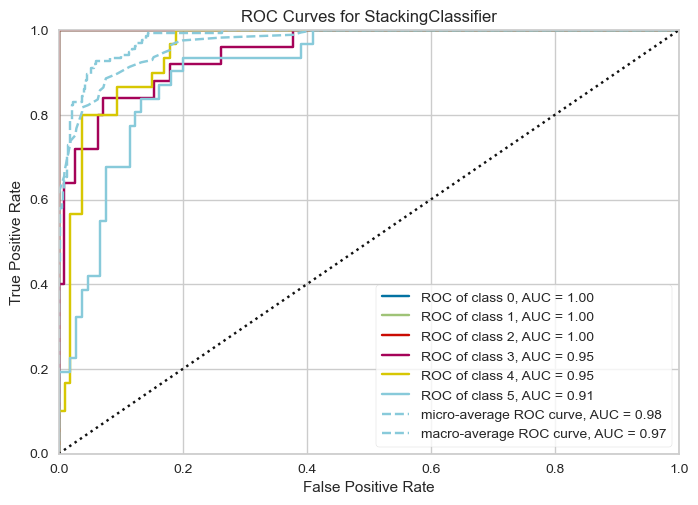

<AxesSubplot:title={'center':'ROC Curves for StackingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [95]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC

n_class = yS_test[0].shape
visualizer = ROCAUC(clf_boosting_ensembleNEW, classes=[0, 1, 2, 3, 4, 5])
visualizer.fit(XS_train, yS_train)        # Fit the training data to the visualizer
visualizer.score(XS_test, yS_test)        # Evaluate the model on the test data
visualizer.show()        

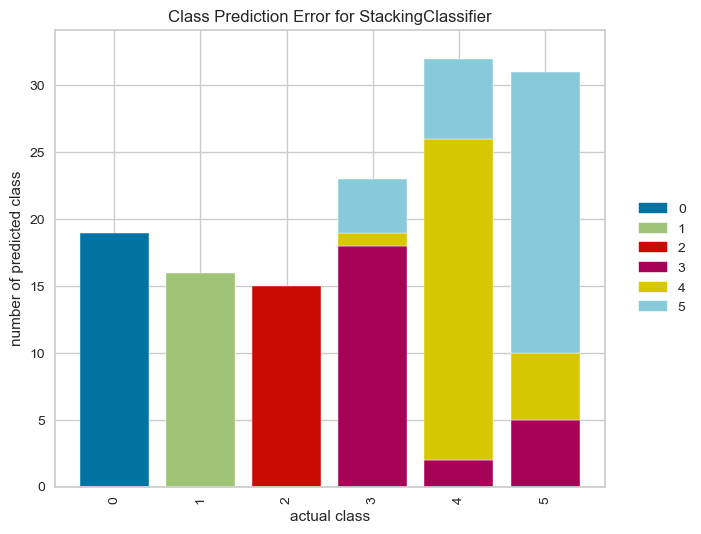

ClassPredictionError(ax=<AxesSubplot:title={'center':'Class Prediction Error for StackingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1, 2, 3, 4, 5],
                     estimator=StackingClassifier(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x1D050800E40, shuffle=False),
                                                  estimators=[('RandomForestClassifier',
                                                               RandomForestCla...
                                                              ('ExtraTreesClassifier',
                                                               ExtraTreesClassifier(max_depth=5,
                                                                                    max_features='log2',
                                                                                    random_state=0)),
                                                              ('AdaBoostClassifier',
                                                               AdaBoostClassifier(learning_rate=2.0,
                                                                                  random_state=42)),
                                                              ('KNeighborsClassifier',
                                                               KNeighborsClassifier(algorithm='brute',
                                                                                    leaf_size=50))],
                                                  final_estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                                                             min_samples_leaf=2,
                                                                                             random_state=42,
                                                                                             subsample=0.5),
                                                  n_jobs=-1))

In [96]:
from yellowbrick.classifier import class_prediction_error

class_prediction_error(
   clf_boosting_ensembleNEW,
    XS_train, yS_train, XS_test, yS_test,
     classes=[0, 1, 2, 3, 4, 5]
)

In the context of the boosting model. Classes 3, 4, and 5 are being discussed here. There are a few slight mistakes in the predictions being made, which is consistent with what the confusion matrix showed.

----

----

# Train and test Bagging model

In [97]:
clf_RandomForestClassifier = BaggingClassifier(rfc, random_state=42)
clf_DecisionTreeClassifier = BaggingClassifier(dtc, random_state=42)
clf_ExtraTreesClassifier = BaggingClassifier(etc, random_state=42)
clf_AdaBoostClassifier = BaggingClassifier(adc, random_state=42)
clf_KNeighborsClassifier = BaggingClassifier(knc, random_state=42)


clf_bagging_ensembleNEW = VotingClassifier(estimators = [('RandomForestClassifier', clf_RandomForestClassifier), 
                                           ('DecisionTreeClassifier', clf_DecisionTreeClassifier),
                                           ('ExtraTreesClassifier', clf_ExtraTreesClassifier),
                                           ('KNeighborsClassifier', clf_AdaBoostClassifier),
                                           ('AdaBoostClassifier', clf_KNeighborsClassifier),
                                       ], 
                                          voting = 'soft')

In [98]:
OVR_BAGG_37 = OneVsRestClassifier(clf_bagging_ensembleNEW).fit(XS_train, yS_train)
OVR_BAGG_49 = OneVsRestClassifier(clf_bagging_ensembleNEW).fit(X_train, Y_train)

#model test prediction 
ypred_clf_bagging_ensembleNEW_37 = OVR_BAGG_37.predict(XS_test)
ypred_clf_bagging_ensembleNEW_49 = OVR_BAGG_49.predict(X_test)

print("\nEnsemble Bagging Model Accuracy Score for 49 features : {:0%}".format(accuracy_score(Y_test, ypred_clf_bagging_ensembleNEW_49)))
print("\n",classification_report(Y_test, ypred_clf_bagging_ensembleNEW_49))
print("\n\n===========================================================================")
print("\nEnsemble Bagging Model Accuracy Score for 37 Features: {:0%}".format(accuracy_score(yS_test, ypred_clf_bagging_ensembleNEW_37)))
print("\n",classification_report(yS_test, ypred_clf_bagging_ensembleNEW_37))


Ensemble Bagging Model Accuracy Score for 49 features : 63.636364%

                      precision    recall  f1-score   support

Barely-Satisfactory       0.00      0.00      0.00         1
Fairly-Satisfactory       0.00      0.00      0.00         1
       Satisfactory       0.00      0.00      0.00         9
           Superior       0.70      0.73      0.72        26
  Very-Satisfactory       0.59      0.79      0.68        29

           accuracy                           0.64        66
          macro avg       0.26      0.30      0.28        66
       weighted avg       0.54      0.64      0.58        66




Ensemble Bagging Model Accuracy Score for 37 Features: 83.088235%

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        16
           2       0.94      1.00      0.97        15
           3       0.81      0.68      0.74        25
           4       0.79      0.77   

In [99]:
clf_bagging_ensembleNEW

VotingClassifier(estimators=[('RandomForestClassifier',
                              BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                                                      max_depth=5,
                                                                                      random_state=42),
                                                random_state=42)),
                             ('DecisionTreeClassifier',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                      random_state=42),
                                                random_state=42)),
                             ('ExtraTreesClassifier',
                              BaggingClas...eesClassifier(max_depth=5,
                                                                                    max_features='log2',
                                                                                    random_state=0),
                                                random_state=42)),
                             ('KNeighborsClassifier',
                              BaggingClassifier(base_estimator=AdaBoostClassifier(learning_rate=2.0,
                                                                                  random_state=42),
                                                random_state=42)),
                             ('AdaBoostClassifier',
                              BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='brute',
                                                                                    leaf_size=50),
                                                random_state=42))],
                 voting='soft')

Text(0.5, 1.0, '49 Features')

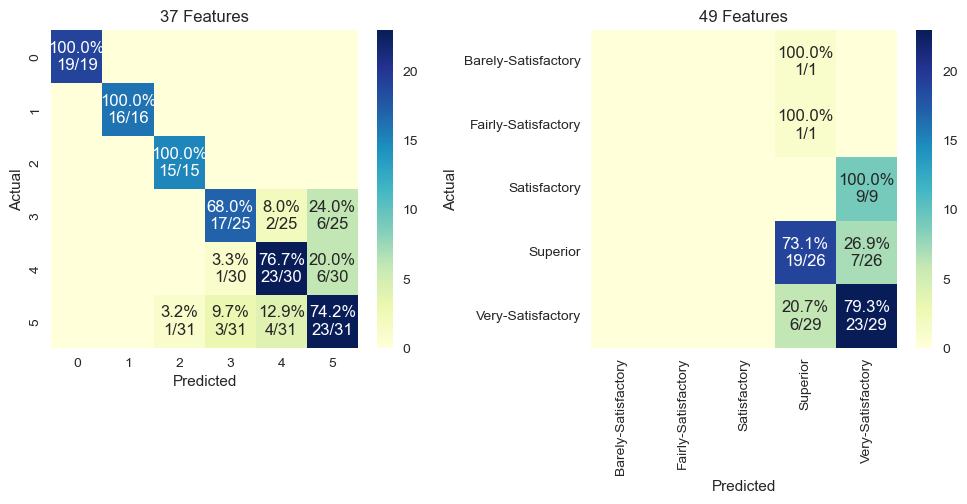

In [100]:
y1_true = yS_test
cm1 = confusion_matrix(yS_test, ypred_clf_bagging_ensembleNEW_37, labels=np.unique(y1_true))
y0_true = Y_test
cm2 = confusion_matrix(Y_test, ypred_clf_bagging_ensembleNEW_49, labels=np.unique(y0_true))

#BOOSTING WITH 25 FEATURES
cm_sum_1 = np.sum(cm1, axis=1, keepdims=True)
cm_perc_1= cm1 / cm_sum_1.astype(float) * 100
annot1 = np.empty_like(cm1).astype(str)
nrows, ncols = cm1.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm1[i, j]
        p = cm_perc_1[i, j]
        if c == 0:
            annot1[i, j] = ''
        else:
            s = cm_sum_1[i]
            annot1[i, j] = '%.1f%%\n%d/%d' % (p, c, s)

#BOOSTING WITH 49 FEATURES
cm_sum_2 = np.sum(cm2, axis=1, keepdims=True)
cm_perc_2= cm2 / cm_sum_2.astype(float) * 100
annot2 = np.empty_like(cm2).astype(str)
nrows, ncols = cm2.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm2[i, j]
        p = cm_perc_2[i, j]
        if c == 0:
            annot2[i, j] = ''
        else:
            s = cm_sum_2[i]
            annot2[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            
cm1 = pd.DataFrame(cm1, index=np.unique(y1_true), columns=np.unique(y1_true))
cm1.index.name = 'Actual'
cm1.columns.name = 'Predicted'
cm2 = pd.DataFrame(cm2, index=np.unique(y0_true), columns=np.unique(y0_true))
cm2.index.name = 'Actual'
cm2.columns.name = 'Predicted'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(cm1, cmap="YlGnBu", annot=annot1, fmt='', ax=ax[0])
sns.heatmap(cm2, cmap="YlGnBu", annot=annot2, fmt='', ax=ax[1])
plt.tight_layout()
ax[0].set_title("37 Features")
ax[1].set_title("49 Features")

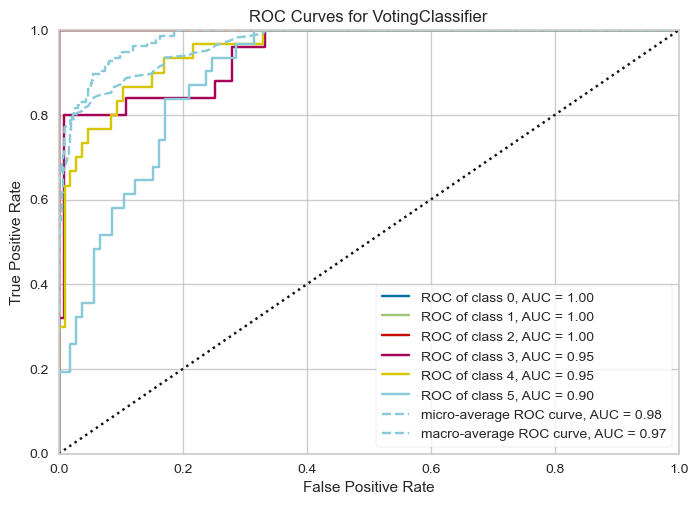

<AxesSubplot:title={'center':'ROC Curves for VotingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [101]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC

n_class = yS_test[0].shape
visualizer = ROCAUC(clf_bagging_ensembleNEW, classes=[0, 1, 2, 3, 4, 5])
visualizer.fit(XS_train, yS_train)        # Fit the training data to the visualizer
visualizer.score(XS_test, yS_test)        # Evaluate the model on the test data
visualizer.show()        

the precision recall curve shows the average precision of the bagging model is 92%, the micro average Adding up the total number of true positives, false negatives, and false positives. the grapgh the drop of its precision it reaches beyond 0.7 of its recall score the precision dramtically fall. 

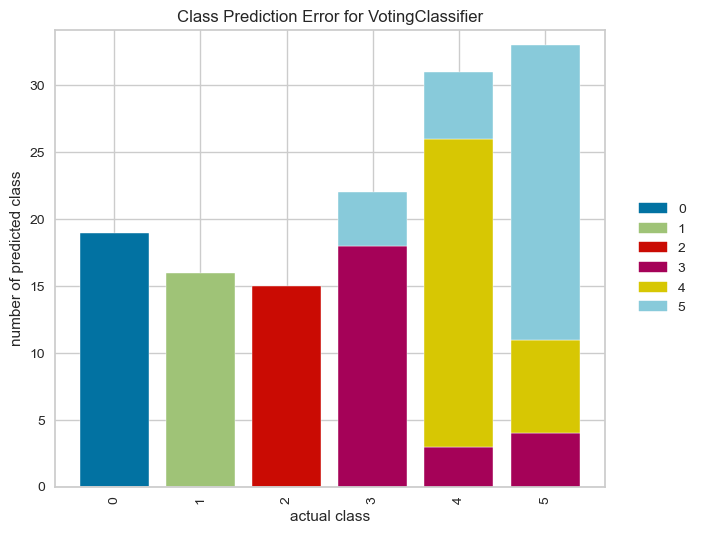

ClassPredictionError(ax=<AxesSubplot:title={'center':'Class Prediction Error for VotingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1, 2, 3, 4, 5],
                     estimator=VotingClassifier(estimators=[('RandomForestClassifier',
                                                             BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                                                                                     max_depth=5,
                                                                                                                     random_state=42),
                                                                               random_s...
                                                             BaggingClassifier(base_estimator=ExtraTreesClassifier(max_depth=5,
                                                                                                                   max_features='log2',
                                                                                                                   random_state=0),
                                                                               random_state=42)),
                                                            ('KNeighborsClassifier',
                                                             BaggingClassifier(base_estimator=AdaBoostClassifier(learning_rate=2.0,
                                                                                                                 random_state=42),
                                                                               random_state=42)),
                                                            ('AdaBoostClassifier',
                                                             BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='brute',
                                                                                                                   leaf_size=50),
                                                                               random_state=42))],
                                                voting='soft'))

In [102]:
from yellowbrick.classifier import class_prediction_error

class_prediction_error(
   clf_bagging_ensembleNEW,
    XS_train, yS_train, XS_test, yS_test,
     classes=[0, 1, 2, 3, 4, 5]
)

In classes 4 and 5, I got number errors. However, it does not overwhelm the actual class. 

----

------

# Cross Validation for each ensemble models

in this cross validation we'll gonna injecting the 37 adn 49 features for each model.

In [103]:
cv1_0 = KFold(n_splits = 10,  shuffle=True, random_state = 0 )
cv1_1 = KFold(n_splits = 10,  shuffle=True, random_state = 1 )
cv1_42 = KFold(n_splits = 10,  shuffle=True, random_state = 42)

In [104]:
##### Cross Validation Boosting
cv_37featureBoost_cv1_0 = cross_val_score(clf_boosting_ensembleNEW, XS_train, yS_train, cv=cv1_0, scoring="f1_weighted")
cv_37featureBoost_cv1_1 = cross_val_score(clf_boosting_ensembleNEW, XS_train, yS_train, cv=cv1_1, scoring="f1_weighted")
cv_37featureBoost_cv1_42 = cross_val_score(clf_boosting_ensembleNEW, XS_train, yS_train, cv=cv1_42, scoring="f1_weighted")

cv_37featureBagging_cv1_0 = cross_val_score(clf_bagging_ensembleNEW, XS_train, yS_train, cv=cv1_0, scoring="f1_weighted")
cv_37featureBagging_cv1_1 = cross_val_score(clf_bagging_ensembleNEW, XS_train, yS_train, cv=cv1_1, scoring="f1_weighted")
cv_37featureBagging_cv1_42 = cross_val_score(clf_bagging_ensembleNEW, XS_train, yS_train, cv=cv1_42, scoring="f1_weighted")

##### Cross Validation Boosting
print("[10 Splits] Boosting CV average score: ")
print("random state 0 : {:.2f}%".format(cv_37featureBoost_cv1_0.mean()*100))
print(cv_37featureBoost_cv1_0, "\n")

print("random state 1 : {:.2f}%".format(cv_37featureBoost_cv1_1.mean()*100))
print(cv_37featureBoost_cv1_1, "\n")

print("random state 42 :{:.2f}%".format(cv_37featureBoost_cv1_42.mean()*100))
print(cv_37featureBoost_cv1_42, "\n")


##### Cross Validation Bagging
print("\n[10 Splits] Bagging CV average score: ")
print("random state 0 : {:.2f}%".format(cv_37featureBagging_cv1_0.mean()*100))
print(cv_37featureBagging_cv1_0, "\n")
print("random state 1 : {:.2f}%".format(cv_37featureBagging_cv1_1.mean()*100))
print(cv_37featureBagging_cv1_1, "\n")
print("random state 42 : {:.2f}%".format(cv_37featureBagging_cv1_42.mean()*100))
print(cv_37featureBagging_cv1_42, "\n")

[10 Splits] Boosting CV average score: 
random state 0 : 84.19%
[0.89 0.85 0.87 0.87 0.8  0.85 0.79 0.85 0.76 0.89] 

random state 1 : 83.23%
[0.83 0.79 0.83 0.79 0.81 0.89 0.85 0.87 0.83 0.83] 

random state 42 :83.98%
[0.84 0.79 0.88 0.83 0.79 0.75 0.91 0.87 0.85 0.89] 


[10 Splits] Bagging CV average score: 
random state 0 : 78.96%
[0.84 0.8  0.74 0.81 0.73 0.75 0.78 0.84 0.71 0.89] 

random state 1 : 81.39%
[0.83 0.8  0.74 0.83 0.82 0.84 0.89 0.81 0.83 0.76] 

random state 42 : 81.36%
[0.85 0.75 0.86 0.8  0.73 0.78 0.87 0.83 0.83 0.83] 



According to the findings of this comparison between the ensemble model and the many splits it contains, both models consistently had split scores that were higher than 80. As a result, the lowest score possible for boosting was 82, and it eventually reached 85 after 20 splits. On the other hand, bagged split scores are constant as well, have scores of 82, notably on its 10, 15, and 20 breaks, and have a tendency to lower their score to less than 80. These breaks are extremely important.

---

### Bias-variance decomposition

In [105]:
# tempdf = newDF.drop(["gpa_range", "student_id"], axis=1) # drop the categorical gpa_range in the data frame


# tempdf1 = pd.concat([X_new, Select_gpa_DF], axis=1) # (285, 38) dimension
# tempdf2 = pd.concat([tempdf, Select_gpa_DF], axis=1) # (357, 50) dimension and attached the labelencoder gpa_range
 
# tempdf1 = tempdf1.dropna(axis=0, inplace=False)
# tempdf2 = tempdf2.dropna(axis=0, inplace=False)

# # #---------------------------#---------------------------#---------------------------#

# features3 =tempdf1.columns[0:-1].values
# target3 =tempdf1.columns[-1:].values # label encoded y target for select best features

# features4 =tempdf2.columns[0:-1].values
# target4 =tempdf2.columns[-1:].values # label encoded y target for OLD features

# # #---------------------------#---------------------------#---------------------------#

# #train_test_split for new features 
# entrain1, entest1 =train_test_split(tempdf1, test_size=0.2, random_state=42)
# entrain2, entest2 =train_test_split(tempdf2, test_size=0.2, random_state=42)

# # #---------------------------#---------------------------#---------------------------#

# # Kbest_features load the data in the variables with [encoded gpa_range]
# X3_train = entrain1[features3]
# Y3_train = entrain1[target3]
# X3_test = entest1[features3]
# Y3_test = entest1[target3]

# # Raw Features load the data in the variables with[encoded gpa_range]
# X4_train = entrain2[features4]
# Y4_train = entrain2[target4]
# X4_test = entest2[features4]
# Y4_test = entest2[target4]

# #---------------------------#---------------------------#---------------------------#
# #PRINT BIAS-VARINCE DECOMPOSITION

# print("\n=============BOOSTING MODEL=============")
# avg_expected_loss2, avg_bias2, avg_var2 = bias_variance_decomp(
#         clf_boosting_ensembleNEW, X4_train.values, Y4_train.values, X4_test.values, Y4_test.values, 
#         loss='0-1_loss',
#         random_seed=123)
# print("\nBoosting Model with '49' Features:")
# print('Average expected loss: %.3f' % avg_expected_loss2)
# print('Average bias: %.3f' % avg_bias2)
# print('Average variance: %.3f' % avg_var2)

# avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
#         clf_boosting_ensembleNEW, XS_train, yS_train, XS_test, yS_test, 
#         loss='0-1_loss',
#         random_seed=123)
# print("\nBoosting Model with '37' Features:")
# print('Average expected loss: %.3f' % avg_expected_loss)
# print('Average bias: %.3f' % avg_bias)
# print('Average variance: %.3f' % avg_var)

# #---------------------------#
# print("\n\n=============BAGGING MODEL=============")
# avg_expected_loss2, avg_bias2, avg_var2 = bias_variance_decomp(
#         clf_bagging_ensembleNEW, X4_train.values, Y4_train.values, X4_test.values, Y4_test.values, 
#         loss='0-1_loss',
#         random_seed=123)
# print("\nBagging Model with '49' Features:")
# print('Average expected loss: %.3f' % avg_expected_loss2)
# print('Average bias: %.3f' % avg_bias2)
# print('Average variance: %.3f' % avg_var2)

# avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
#         clf_bagging_ensembleNEW, XS_train, yS_train, XS_test, yS_test, 
#         loss='0-1_loss',
#         random_seed=123)
# print("\nBagging Model with '37' Features:")
# print('Average expected loss: %.3f' % avg_expected_loss)
# print('Average bias: %.3f' % avg_bias)
# print('Average variance: %.3f' % avg_var)


        =============BOOSTING MODEL=============

        Boosting Model with '49' Features:
        Average expected loss: 0.632
        Average bias: 42.030
        Average variance: 0.056

        Boosting Model with '37' Features:
        Average expected loss: 0.190
        Average bias: 0.132
        Average variance: 0.117


        =============BAGGING MODEL=============

        Bagging Model with '49' Features:
        Average expected loss: 0.610
        Average bias: 40.318
        Average variance: 0.051

        Bagging Model with '37' Features:
        Average expected loss: 0.200
        Average bias: 0.147
        Average variance: 0.129

---

-----

# PLOT LEARNING CURVES 

In [106]:
# def plot_learning_curve(
#     clf_boosting_ensembleNEW,
#     title,
#     XS_train,
#     yS_test,
#     axes=None,
#     ylim=None,
#     cv=None,
#     n_jobs=None,
#     scoring=None,
#     train_sizes=np.linspace(0.1, 1.0, 5),
#    ):
    
#     if axes is None:
#         _, axes = plt.subplots(1, 3, figsize=(20, 5))

#     axes[0].set_title(title)
#     if ylim is not None:
#         axes[0].set_ylim(*ylim)
#     axes[0].set_xlabel("Training examples")
#     axes[0].set_ylabel("Score")
    
#     train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
#         clf_boosting_ensembleNEW,
#         XS_train,
#         yS_test,
#         scoring=scoring,
#         cv=cv,
#         n_jobs=n_jobs,
#         train_sizes=train_sizes,
#         return_times=True,
#     )
    
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     fit_times_mean = np.mean(fit_times, axis=1)
#     fit_times_std = np.std(fit_times, axis=1)
    
#     # Plot learning curve
#     axes[0].grid()
#     axes[0].fill_between(
#         train_sizes,
#         train_scores_mean - train_scores_std,
#         train_scores_mean + train_scores_std,
#         alpha=0.1,
#         color="r",
#     )
#     axes[0].fill_between(
#         train_sizes,
#         test_scores_mean - test_scores_std,
#         test_scores_mean + test_scores_std,
#         alpha=0.1,
#         color="g",
#     )
#     axes[0].plot(
#         train_sizes, train_scores_mean, "o-", color="r", label="Training score"
#     )
#     axes[0].plot(
#         train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
#     )
#     axes[0].legend(loc="best")
    
#      # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, "o-")
#     axes[1].fill_between(
#         train_sizes,
#         fit_times_mean - fit_times_std,
#         fit_times_mean + fit_times_std,
#         alpha=0.1,
#     )
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     fit_time_argsort = fit_times_mean.argsort()
#     fit_time_sorted = fit_times_mean[fit_time_argsort]
#     test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
#     test_scores_std_sorted = test_scores_std[fit_time_argsort]
#     axes[2].grid()
#     axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
#     axes[2].fill_between(
#         fit_time_sorted,
#         test_scores_mean_sorted - test_scores_std_sorted,
#         test_scores_mean_sorted + test_scores_std_sorted,
#         alpha=0.1,
#     )
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

#     return plt

# fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# title1 = "Learning Curves (Ensemble Boosting)"
# cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=42)
# plot_learning_curve(
#     clf_boosting_ensembleNEW,
#     title1,
#     XS_train,
#     yS_train,
#     axes=axes[:, 0],
#     ylim=(0.7, 1.01),
#     cv=cv,
#     n_jobs=4,
#     scoring="accuracy",
# )

# title2 = "Learning Curves (Ensemble Bagging)"
# cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=42)
# plot_learning_curve(
#     clf_bagging_ensembleNEW, title2, XS_train, yS_train, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
# )


# plt.show()
# plt.show()

---

# ANOVA Testing Hypotheses

In [107]:
df_corSmote.columns

Index(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'working_stud', 'scholar', 'TM3', 'TM4', 'TM5',
       'TM6', 'TM7', 'CAP2', 'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4',
       'GSS5', 'GSS6', 'GSS7', 'EP1', 'EP2', 'EP3', 'EP5', 'NT1', 'NT2', 'NT3',
       'desktop', 'laptop', 'mobile_phone', 'wifi', 'cellular_data',
       'high_speed', 'light_speed', 'gpa_range'],
      dtype='object')

###### H1: Personality type has no significant impact to the student’s academic performances.

In [108]:
model = ols('gpa_range ~ C(personality_type)', data=df_corSmote).fit()
anova_result = sm.stats.anova_lm(model, typ= 1)
print(anova_result)
model.summary()

                        df       sum_sq    mean_sq         F        PR(>F)
C(personality_type)   15.0   331.980725  22.132048  8.750372  3.543503e-18
Residual             526.0  1330.395659   2.529269       NaN           NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gpa_range   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     8.750
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           3.54e-18
Time:                        06:32:22   Log-Likelihood:                -1012.4
No. Observations:                 542   AIC:                             2057.
Df Residuals:                     526   BIC:                             2126.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.5606      0.196     13.080      0.000       2.176       2.945
C(personality_type)[T.1]     -0.1086      0.270     -0.402      0.688      -0.639       0.422
C(personality_type)[T.2]      0.4911      0.286      1.716      0.087      -0.071       1.053
C(personality_type)[T.3]      0.4161      0.312      1.335      0.182      -0.196       1.028
C(personality_type)[T.4]      0.5126      0.316      1.621      0.106      -0.109       1.134
C(personality_type)[T.5]      1.1537      0.359      3.216      0.001       0.449       1.858
C(personality_type)[T.6]      0.6317      0.368      1.715      0.087      -0.092       1.355
C(personality_type)[T.7]      0.4071      0.346      1.176      0.240      -0.273       1.087
C(personality_type)[T.8]     -1.6735      0.281     -5.950      0.000      -2.226      -1.121
C(personality_type)[T.9]      0.1061      0.350      0.303      0.762      -0.582       0.794
C(personality_type)[T.10]     0.0758      0.339      0.223      0.823      -0.590       0.742
C(personality_type)[T.11]     0.0505      0.423      0.119      0.905      -0.780       0.881
C(personality_type)[T.12]     1.1537      0.468      2.465      0.014       0.234       2.073
C(personality_type)[T.13]     1.7251      0.632      2.729      0.007       0.483       2.967
C(personality_type)[T.14]     1.5823      0.632      2.503      0.013       0.340       2.824
C(personality_type)[T.15]     2.2394      0.738      3.036      0.003       0.790       3.689
==============================================================================
Omnibus:                       43.446   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.533
Skew:                           0.198   Prob(JB):                     0.000156
Kurtosis:                       2.213   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

accept the null hyopthesis and reject the alternative hypothesis. since the all of the group showcases no signifince difference between personality and academic performance.

ShapiroResult(statistic=0.9697474837303162, pvalue=3.897995259904974e-09) 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.9815 0.6006 -0.7758 2.7388  False
     0      2   0.2932 0.9969  -1.459 2.0455  False
     0      3   0.3481  0.994 -1.4602 2.1565  False
     0      4   0.9717 0.5625 -0.7078 2.6511  False
     0      5   0.3424 0.9911 -1.2945 1.9792  False
     1      2  -0.6882 0.8672 -2.4243 1.0479  False
     1      3  -0.6333 0.9144 -2.4261 1.1594  False
     1      4  -0.0098    1.0 -1.6725 1.6528  False
     1      5  -0.6391 0.8694 -2.2588 0.9805  False
     2      3   0.0549    1.0 -1.7328 1.8426  False
     2      4   0.6784 0.8506 -0.9788 2.3357  False
     2      5   0.0491    1.0  -1.565 1.6632  False
     3      4   0.6235 0.9046  -1.093   2.34  False
     3      5  -0.0058    1.0 -1.6807 1.6691  False
     4      5  -0.6293 0.8498 -2.1642 0.

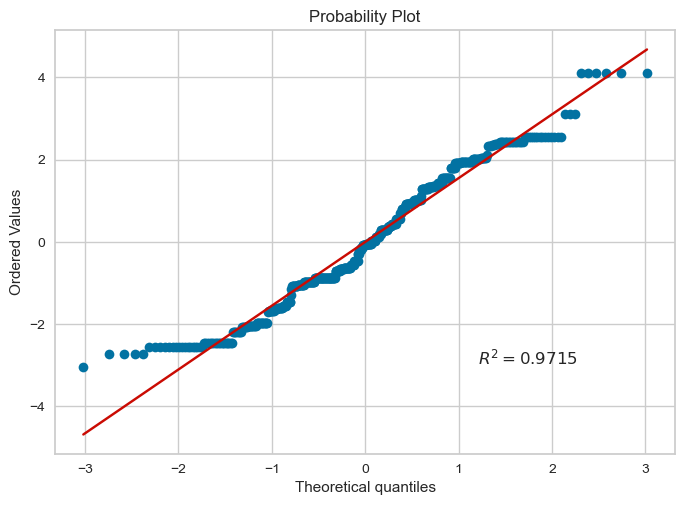

In [109]:
import scipy.stats as stats
stats.shapiro(model.resid)
print(stats.shapiro(model.resid),"\n")
normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(df_corSmote.personality_type, 
                                  df_corSmote.gpa_range, 
                                  alpha=0.05) #significance level

print(tukey_results)

CONCLUSION:

The conclusion that can be drawn from this analysis is that the null hypothesis cannot be rejected with a confidence level of 0.05 when using ANOVA and a p-value of 0.3. In addition, Shapiro's method for determining whether or not the variables in the model have normal distributions received a score of 93%, which indicates that we are unable to reject the null hypothesis because of the normal distribution. The Tukey post hoc test generates a false value, which indicates that there is not a statistical difference between the means of ANY AND ALL PAIRS. The reason for this is that the p-value for each combination is more than 0.05. Because of this, we are willing to accept the null hypothesis. In conclusion, there is no discernible link between the types of personalities and levels of academic achievement. It's also possible to presume that a student's personality type doesn't have much of an impact on their academic performance.

----

###### H2: Proves that ensemble technique gives high accuracy results in combining multiple models.

In [110]:
clf_boosting_ensembleNEW

StackingClassifier(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x1D050800E40, shuffle=False),
                   estimators=[('RandomForestClassifier',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=5,
                                                       random_state=42)),
                               ('DecisionTreeClassifier',
                                DecisionTreeClassifier(criterion='entropy',
                                                       random_state=42)),
                               ('ExtraTreesClassifier',
                                ExtraTreesClassifier(max_depth=5,
                                                     max_features='log2',
                                                     random_state=0)),
                               ('AdaBoostClassifier',
                                AdaBoostClassifier(learning_rate=2.0,
                                                   random_state=42)),
                               ('KNeighborsClassifier',
                                KNeighborsClassifier(algorithm='brute',
                                                     leaf_size=50))],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                              min_samples_leaf=2,
                                                              random_state=42,
                                                              subsample=0.5),
                   n_jobs=-1)

In [111]:
clf_bagging_ensembleNEW

VotingClassifier(estimators=[('RandomForestClassifier',
                              BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                                                      max_depth=5,
                                                                                      random_state=42),
                                                random_state=42)),
                             ('DecisionTreeClassifier',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                      random_state=42),
                                                random_state=42)),
                             ('ExtraTreesClassifier',
                              BaggingClas...eesClassifier(max_depth=5,
                                                                                    max_features='log2',
                                                                                    random_state=0),
                                                random_state=42)),
                             ('KNeighborsClassifier',
                              BaggingClassifier(base_estimator=AdaBoostClassifier(learning_rate=2.0,
                                                                                  random_state=42),
                                                random_state=42)),
                             ('AdaBoostClassifier',
                              BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='brute',
                                                                                    leaf_size=50),
                                                random_state=42))],
                 voting='soft')

[RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)] [0.85 0.8  0.87 0.74 0.89 0.74 0.78 0.85 0.85 0.8 ]
accuracy sscore 0.8308823529411765 

[DecisionTreeClassifier(criterion='entropy', random_state=42)] [0.71 0.64 0.65 0.72 0.78 0.78 0.76 0.78 0.74 0.72]
accuracy sscore 0.75 

[ExtraTreesClassifier(max_depth=5, max_features='log2', random_state=0)] [0.89 0.82 0.8  0.76 0.85 0.83 0.76 0.83 0.85 0.83]
accuracy sscore 0.7794117647058824 

[AdaBoostClassifier(learning_rate=2.0, random_state=42)] [0.44 0.22 0.3  0.24 0.11 0.54 0.11 0.06 0.48 0.31]
accuracy sscore 0.19852941176470587 

[KNeighborsClassifier(algorithm='brute', leaf_size=50)] [0.62 0.58 0.57 0.7  0.69 0.81 0.67 0.76 0.65 0.69]
accuracy sscore 0.6176470588235294 

[StackingClassifier(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x1D050800E40, shuffle=False),
                   estimators=[('RandomForestClassifier',
                                RandomForestClassifier(cri

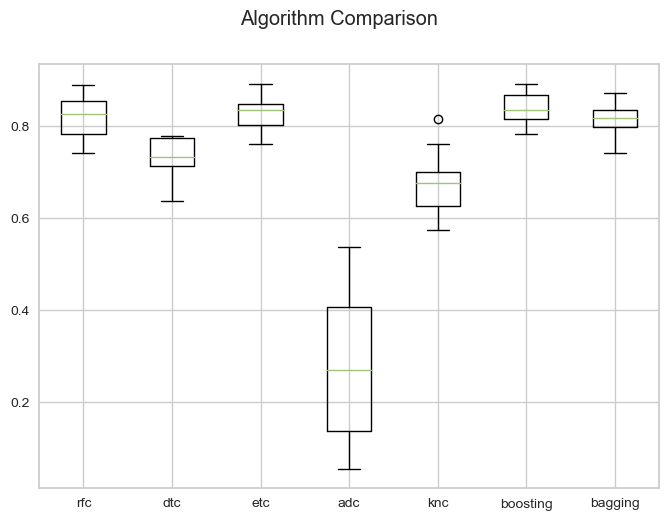

In [112]:
model_name = []
results = []

est_single_model = [rfc, dtc, etc, adc, knc, 
                    clf_boosting_ensembleNEW, 
                    clf_bagging_ensembleNEW]

nameModel = ['rfc', 'dtc', 'etc', 'adc', 'knc', 
           'boosting', 
           'bagging']

for single in est_single_model:
    kfold = KFold(n_splits=10)
    crossv_results = cross_val_score(single, XS_train ,yS_train , cv =kfold , scoring='accuracy')
    print("[{}]".format(single), crossv_results)
    clfpred =  single.fit(XS_train, yS_train).predict(XS_test)
    print("accuracy sscore {} \n".format(accuracy_score(yS_test, clfpred)))
    results.append(crossv_results)

# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(nameModel)
plt.show()

CONCLUSION:
This illustration shows that boosting model performs well compared to other models. With ten splits, the boosting is consistent with having a balanced accuracy score between 83 to 91, with an average of 87.2 scores. It is compared to the model of the extra tree with an average of 86.8 scores. However, this said model got a 77 score on its 7th split. Unlike the boosting model, it does not fall below 80. The model that performed well based on the model's accuracy and their splits consistency is the boosting model.

---

###### H3: There are no statistically significant differences among the Five (5)  algorithms in terms of accuracy.

In [113]:
scoresEsti= []
preScore = []
algo = [rfc, dtc, etc, adc, knc]

for single in algo:
    kfold = KFold(n_splits=10)
    crossv_results = cross_val_score(single, XS_train ,yS_train , cv =kfold , scoring='accuracy')
    scoresEsti.append(crossv_results)
    estFit = single.fit(XS_train ,yS_train).predict(XS_test)

df_Splitsscores = pd.DataFrame (scoresEsti, columns = ['fold1','fold2', 'fold3','fold4', 'fold5',
                                                       'fold6', 'fold7', 'fold8', 'fold9', 'fold10'])
df_Splitsscores

fold1     fold2     fold3     fold4     fold5     fold6     fold7  \
0  0.854545  0.800000  0.870370  0.740741  0.888889  0.740741  0.777778   
1  0.709091  0.636364  0.648148  0.722222  0.777778  0.777778  0.759259   
2  0.890909  0.818182  0.796296  0.759259  0.851852  0.833333  0.759259   
3  0.436364  0.218182  0.296296  0.240741  0.111111  0.537037  0.111111   
4  0.618182  0.581818  0.574074  0.703704  0.685185  0.814815  0.666667   

      fold8     fold9    fold10  
0  0.851852  0.851852  0.796296  
1  0.777778  0.740741  0.722222  
2  0.833333  0.851852  0.833333  
3  0.055556  0.481481  0.314815  
4  0.759259  0.648148  0.685185

In [114]:
fvalue, pvalue = stats.f_oneway(df_Splitsscores['fold1'], df_Splitsscores['fold2'], df_Splitsscores['fold3'], df_Splitsscores['fold4'],  df_Splitsscores['fold5'],
                               df_Splitsscores['fold6'], df_Splitsscores['fold7'], df_Splitsscores['fold8'], df_Splitsscores['fold9'],  df_Splitsscores['fold10'])
print('ANOVA F', fvalue, "\nP-value",pvalue)

ANOVA F 0.16514586231471973 
P-value 0.99647453338761


p-value resulted with 0.99, differences between the means of each folds are not statistically significant. Therefore we accept the null hypothesis.

----

###### H4 : Factors such as Personal information, Demographic, personality type, Study habits, gpa_range, and Digital Learning Resources can help the study to predict students’ performance in a Learning Management System Platform.

In [115]:
df_corSmoteX = df_corSmote[['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'working_stud', 'scholar', 'TM3', 'TM4', 'TM5',
       'TM6', 'TM7', 'CAP2', 'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4',
       'GSS5', 'GSS6', 'GSS7', 'EP1', 'EP2', 'EP3', 'EP5', 'NT1', 'NT2', 'NT3',
       'desktop', 'laptop', 'mobile_phone', 'wifi', 'cellular_data',
       'high_speed', 'light_speed']]

dp_gpa_range = df_corSmote.iloc[:, 37]

# personal info

In [116]:
df_corSmoteX = pd.concat([df_corSmoteX, dp_gpa_range], axis=1)
PersonaInfo_ANOVA = f_oneway(df_corSmoteX['age'], df_corSmoteX['sex'],df_corSmoteX['course'], df_corSmoteX['yr_level'], dp_gpa_range )
PersonaInfo_ANOVA

F_onewayResult(statistic=29657.404447404984, pvalue=0.0)

In [117]:
model = ols('gpa_range ~ C(age) +  C(sex) +  C(course) + C(yr_level)  ', data=df_corSmoteX).fit()
anova_result = sm.stats.anova_lm(model, typ= 1)
print(anova_result)
model.summary() 

                df       sum_sq    mean_sq          F        PR(>F)
C(age)         8.0   237.402137  29.675267  12.596138  1.298474e-16
C(sex)         1.0     3.646914   3.646914   1.547991  2.139854e-01
C(course)      3.0   119.818318  39.939439  16.952929  1.588834e-10
C(yr_level)    2.0    59.948686  29.974343  12.723086  4.015045e-06
Residual     527.0  1241.560329   2.355902        NaN           NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gpa_range   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     12.76
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           5.62e-26
Time:                        06:35:25   Log-Likelihood:                -993.69
No. Observations:                 542   AIC:                             2017.
Df Residuals:                     527   BIC:                             2082.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.4523      0.597      5.786      0.000       2.280       4.625
C(age)[T.19]        -1.8332      0.596     -3.076      0.002      -3.004      -0.662
C(age)[T.20]        -1.7219      0.620     -2.779      0.006      -2.939      -0.505
C(age)[T.21]        -0.9571      0.625     -1.531      0.126      -2.185       0.271
C(age)[T.22]        -1.0988      0.641     -1.715      0.087      -2.357       0.160
C(age)[T.23]        -0.7699      0.795     -0.968      0.333      -2.332       0.792
C(age)[T.24]         1.0220      1.649      0.620      0.536      -2.218       4.262
C(age)[T.25]        -0.2533      1.246     -0.203      0.839      -2.700       2.194
C(age)[T.29]         0.8333      1.667      0.500      0.617      -2.442       4.109
C(sex)[T.1]          0.4351      0.155      2.801      0.005       0.130       0.740
C(course)[T.2]      -0.4744      0.173     -2.748      0.006      -0.813      -0.135
C(course)[T.3]       0.6340      0.204      3.100      0.002       0.232       1.036
C(course)[T.4]       1.3222      0.273      4.848      0.000       0.786       1.858
C(yr_level)[T.3]     0.8989      0.224      4.010      0.000       0.459       1.339
C(yr_level)[T.4]     1.1888      0.244      4.873      0.000       0.710       1.668
==============================================================================
Omnibus:                       53.681   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.429
Skew:                           0.201   Prob(JB):                     6.04e-05
Kurtosis:                       2.164   Cond. No.                         41.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
tukey_resultsPerInfo_a= pairwise_tukeyhsd(dp_gpa_range, 
                                        df_corSmoteX['age'],
                                        alpha=0.05) #significance level

print(tukey_resultsPerInfo_a)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    18     19  -2.1359 0.0211  -4.097 -0.1748   True
    18     20  -1.1632 0.6496 -3.1231  0.7968  False
    18     21  -0.5051 0.9971 -2.4968  1.4867  False
    18     22  -0.7959 0.9554 -2.8536  1.2618  False
    18     23  -0.5556 0.9991  -3.122  2.0109  False
    18     24      0.0    1.0 -5.4442  5.4442  False
    18     25      0.5    1.0 -3.5832  4.5832  False
    18     29      1.0 0.9997 -4.4442  6.4442  False
    19     20   0.9727    0.0   0.446  1.4994   True
    19     21   1.6308    0.0  0.9961  2.2656   True
    19     22     1.34    0.0  0.5213  2.1586   True
    19     23   1.5803 0.1088 -0.1582  3.3189  False
    19     24   2.1359 0.9304 -2.9706  7.2423  False
    19     25   2.6359 0.3639 -0.9847  6.2564  False
    19     29   3.1359 0.6052 -1.9706  8.2423  False
    20     21   0.6581 0.0335  0.0269  1.2893 

In [119]:
tukey_resultsPerInfo_b= pairwise_tukeyhsd(dp_gpa_range, 
                                        df_corSmoteX['sex'],
                                        alpha=0.05) #significance level

print(tukey_resultsPerInfo_b)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper reject
--------------------------------------------------
     0      1   0.2817 0.0667 -0.0195 0.583  False
--------------------------------------------------


In [120]:
tukey_resultsPerInfo_c= pairwise_tukeyhsd(dp_gpa_range, 
                                        df_corSmoteX['course'],
                                        alpha=0.05) #significance level

print(tukey_resultsPerInfo_c)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.0881  0.958 -0.5383 0.3621  False
     1      3   0.4493  0.165 -0.1106 1.0091  False
     1      4   1.4493    0.0   0.695 2.2035   True
     2      3   0.5374 0.1086 -0.0752   1.15  False
     2      4   1.5374    0.0  0.7432 2.3316   True
     3      4      1.0 0.0153  0.1389 1.8611   True
---------------------------------------------------


In [121]:
tukey_resultsPerInfo_d= pairwise_tukeyhsd(dp_gpa_range, 
                                        df_corSmoteX['yr_level'],
                                        alpha=0.05) #significance level

print(tukey_resultsPerInfo_c)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.0881  0.958 -0.5383 0.3621  False
     1      3   0.4493  0.165 -0.1106 1.0091  False
     1      4   1.4493    0.0   0.695 2.2035   True
     2      3   0.5374 0.1086 -0.0752   1.15  False
     2      4   1.5374    0.0  0.7432 2.3316   True
     3      4      1.0 0.0153  0.1389 1.8611   True
---------------------------------------------------


-----

# demographics

In [122]:
df_corSmoteX = pd.concat([df_corSmoteX, dp_gpa_range], axis=1)
PersonaInfo_ANOVA = f_oneway(df_corSmoteX['socioeconomic_stat'], df_corSmoteX['working_stud'],df_corSmoteX['scholar'], dp_gpa_range )
PersonaInfo_ANOVA

F_onewayResult(statistic=933.1380976995907, pvalue=0.0)

In [123]:
#Demographics
studDemo = MANOVA.from_formula('socioeconomic_stat + working_stud + scholar ~ dp_gpa_range', data=df_corSmoteX)
#DEMOGRAPHICS
print(studDemo.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.4814 3.0000 538.0000 193.1752 0.0000
         Pillai's trace 0.5186 3.0000 538.0000 193.1752 0.0000
 Hotelling-Lawley trace 1.0772 3.0000 538.0000 193.1752 0.0000
    Roy's greatest root 1.0772 3.0000 538.0000 193.1752 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       dp_gpa_range      Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8725 3.0000 538.0000 26.2175 0.0000
          Pillai's trace 0.1275 3.0000 538.0000 26.2175 0.0000
  Hotelling

In [124]:
tukey_resultsDemo_a= pairwise_tukeyhsd(dp_gpa_range, 
                                        df_corSmoteX['socioeconomic_stat'],
                                        alpha=0.05) #significance level

print(tukey_resultsDemo_a)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.4522 0.1398 -0.0747 0.9791  False
     1      3    1.752 0.0002  0.6058 2.8983   True
     1      4   2.0603 0.0202  0.1988 3.9218   True
     1      5   1.4889 0.9533 -3.4002  6.378  False
     1      6   2.4889 0.6925 -2.4002  7.378  False
     2      3   1.2999 0.0278  0.0859 2.5138   True
     2      4   1.6081 0.1526 -0.2959 3.5121  False
     2      5   1.0367 0.9907 -3.8688 5.9421  False
     2      6   2.0367 0.8428 -2.8688 6.9421  False
     3      4   0.3083 0.9985 -1.8507 2.4673  False
     3      5  -0.2632    1.0 -5.2731 4.7468  False
     3      6   0.7368 0.9983 -4.2731 5.7468  False
     4      5  -0.5714 0.9996 -5.7917 4.6488  False
     4      6   0.4286 0.9999 -4.7917 5.6488  False
     5      6      1.0 0.9984 -5.9058 7.9058  False
---------------------------------------------------


In [125]:
tukey_resultsDemo_b= pairwise_tukeyhsd(dp_gpa_range, 
                                        df_corSmoteX['working_stud'],
                                        alpha=0.05) #significance level

print(tukey_resultsDemo_b)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -1.3692   0.0 -1.8009 -0.9375   True
---------------------------------------------------


In [126]:
tukey_resultsDemo_b= pairwise_tukeyhsd(dp_gpa_range, 
                                        df_corSmoteX['scholar'],
                                        alpha=0.05) #significance level

print(tukey_resultsDemo_b)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   1.1905 0.012 0.2626 2.1183   True
-------------------------------------------------


In [127]:
# #study-habits
fit_TM = ols('dp_gpa_range  ~ TM3 + TM4 + TM5 + TM6 + TM7', data=df_corSmoteX).fit()
fit_CAP = ols('dp_gpa_range ~ CAP2 + CAP3 + CAP4', data=df_corSmoteX).fit()
fit_GSS = ols('dp_gpa_range ~ GSS1 + GSS2 + GSS3 + GSS4 + GSS5 + GSS6 + GSS7', data=df_corSmoteX).fit()
fit_EP = ols('dp_gpa_range  ~ EP2 + EP3 + EP5', data=df_corSmoteX).fit()
fit_NT = ols('dp_gpa_range  ~ NT1 + NT2 + NT3', data=df_corSmoteX).fit()

# #digital resources
fit_DR = ols('dp_gpa_range ~ desktop + laptop + mobile_phone + wifi + cellular_data + high_speed + light_speed', data=df_corSmoteX).fit()

In [129]:
#CLASS ATTENDANCE AND PARTICIPATION
tukey_resultsTM = pairwise_tukeyhsd(df_corSmoteX[['TM3' , 'TM4' , 'TM5', 'TM6', "TM7"]], 
                                  dp_gpa_range, 
                                  alpha=0.05) #significance level

tukey_resultsTM = sm.stats.anova_lm(fit_CAP, typ= 1)
print(anova_resultTM, "\n")
print(tukey_resultsTM)

NameError: name 'anova_resultTM' is not defined

WE ACCEPT THE NULL HYPOTHESIS, AND REJECT THE ALTERNATIVE HYPOTHESIS SINCE ALL P VALUES OF EACH GROUPS ARE GREATER 0.05. thus, there is no statistical difference among of these groups.

In [ ]:
#CLASS ATTENDANCE AND PARTICIPATION
tukey_resultsCAP = pairwise_tukeyhsd(df_corSmoteX[['CAP2' , 'CAP3' , 'CAP4']], 
                                  dp_gpa_range, 
                                  alpha=0.05) #significance level

anova_resultCAP = sm.stats.anova_lm(fit_CAP, typ= 1)
print(anova_resultCAP, "\n")
print(tukey_resultsCAP)

In [ ]:
#GENERAL STUDY STRATEGY
tukey_resultsGSS = pairwise_tukeyhsd(df_corSmoteX[['GSS1' , 'GSS2' , 'GSS3' ,'GSS4' , 'GSS5', 'GSS6' ,'GSS7']], 
                                  dp_gpa_range, 
                                  alpha=0.05) #significance level

anova_resultGSS = sm.stats.anova_lm(fit_GSS, typ= 1)
print(anova_resultGSS, "\n")
print(tukey_resultsGSS)

In [ ]:
#EXAM PREPARATION
tukey_resultsEP = pairwise_tukeyhsd(df_corSmoteX[['EP2' , 'EP3' , 'EP5']], 
                                  dp_gpa_range, 
                                  alpha=0.05) #significance level

anova_resultEP = sm.stats.anova_lm(fit_EP, typ= 1)
print(anova_resultEP, "\n")
print(tukey_resultsEP)

In [ ]:
#NOTE TAKING
tukey_resultsNT = pairwise_tukeyhsd(df_corSmoteX[['NT1' , 'NT2' , 'NT3']], 
                                  dp_gpa_range, 
                                  alpha=0.05) #significance level

anova_resultNT = sm.stats.anova_lm(fit_NT, typ= 1)
print(anova_resultNT, "\n")
print(tukey_resultsNT)

In [ ]:
#DIGITAL RESOURCES 
tukey_resultsDR = pairwise_tukeyhsd(df_corSmoteX[['desktop' ,'laptop' ,'mobile_phone', 'wifi' ,
                                                  'cellular_data' , 'high_speed' ,'light_speed']], 
                                                    dp_gpa_range,
                                                    alpha=0.05) #significance level
                    
anova_resultGSS = sm.stats.anova_lm(fit_DR, typ= 1)
print(anova_resultGSS, "\n")
print(tukey_resultsDR)

---

----

# BATCH PREDICTION

In [ ]:

#Train and Predict of algorithms USING 37 FEATURES
pred1_37 = clf_boosting_ensembleNEW.fit(XS_train, yS_train).predict(XS_test)
pred2_37 = clf_boosting_ensembleNEW.fit(XS_train, yS_train).predict(XS_test)
pred3_37 = rfc.fit(XS_train, yS_train).predict(XS_test)
pred4_37 = dtc.fit(XS_train, yS_train).predict(XS_test)
pred5_37 = etc.fit(XS_train, yS_train).predict(XS_test)
pred6_37 = knc.fit(XS_train, yS_train).predict(XS_test)

#prediction of algorithms USING 49 FEATURES
pred1_49 = clf_bagging_ensembleNEW.fit(XS_train, yS_train).predict(XS_test)
pred2_49 = clf_bagging_ensembleNEW.fit(XS_train, yS_train).predict(XS_test)
pred3_49 = rfc.fit(XS_train, yS_train).predict(XS_test)
pred4_49 = dtc.fit(XS_train, yS_train).predict(XS_test)
pred5_49 = etc.fit(XS_train, yS_train).predict(XS_test)
pred6_49 = knc.fit(XS_train, yS_train).predict(XS_test)

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, Layout

def plot_pred (Algorithm, train_Set):
    
    if Algorithm == "---":
        plt.plot(0, 0)
    
    if (Algorithm == "VotingClassifier" and train_Set == "49 Features"):
        plt.plot(pred1_49, "--b")
        
    elif (Algorithm == "VotingClassifier" and train_Set == "37 Features"):
        plt.plot(pred1_37, "b")
                
    elif (Algorithm == "GradientBoostingClassifier" and train_Set == "49 Features"):
        plt.plot(pred2_49, "--g") 
        
    elif (Algorithm == "GradientBoostingClassifier" and train_Set == "37 Features"):
        plt.plot(pred2_37, "g")
            
    elif (Algorithm == "RandomForestClassifier" and train_Set == "49 Features"):
        plt.plot(pred3_49, "--r")
    
    elif (Algorithm == "RandomForestClassifier" and train_Set == "37 Features"):
        plt.plot(pred3_37, "r")
        
    elif (Algorithm == "DecisionTreeClassifier" and train_Set == "49 Features"):
        plt.plot(pred4_49, "--c")   
        
    elif (Algorithm == "DecisionTreeClassifier" and train_Set == "37 Features"):
        plt.plot(pred4_37, "c")   
               
    elif (Algorithm == "ExtraTreesClassifier" and train_Set == "49 Features"):
        plt.plot(pred5_49, "--m") 
        
    elif (Algorithm == "ExtraTreesClassifier" and train_Set == "37 Features"):
        plt.plot(pred5_37, "m")    
        
    elif (Algorithm == "KNeighborsClassifier" and train_Set == "49 Features"):
        plt.plot(pred6_49, "--k")       
        
    elif (Algorithm == "KNeighborsClassifier" and train_Set == "37 Features"):
        plt.plot(pred6_37, "k")     

In [ ]:
widgets.interact(plot_pred, 
                 Algorithm=["---", 'VotingClassifier', 'GradientBoostingClassifier', 'RandomForestClassifier', 
                                         'DecisionTreeClassifier', 'ExtraTreesClassifier', 'KNeighborsClassifier'],
                 
                 train_Set = ["---", "49 Features", "37 Features"]
    )

---

## Deploy trained model

In [ ]:
import pickle

In [ ]:
pickle.dump(clf_boosting_ensembleNEW, open('thesis_Model.pkl','wb'))

In [ ]:
test_model = pickle.load(open('thesis_Model.pkl','rb'))

In [ ]:
model_train = test_model.fit(storeXSmote, storeYSmote)

In [ ]:
# new_Xdata = XS_test.sample(10)
# new_Ydata = yS_test['gpa_range'].loc[new_Xdata.index.values]
# print(new_Xdata)


In [ ]:
# new_Xdata.columns

In [ ]:
# new_Xdata

In [ ]:
# new_Xdata.columns

In [ ]:
#predictions by the model
pred = test_model.predict(XS_test)
pred

In [ ]:
#Actual Values
yS_test

In [ ]:
# print(new_Ydata.values)

In [ ]:
#checking for the accuracy score using confusion matrix
res_cm = confusion_matrix (yS_test, pred)
print('Confusion Matrix:\n', res_cm)
res_acc = accuracy_score(yS_test, pred)
print('Accuracy Score:\n', res_acc)

In [ ]:
print(classification_report(yS_test, pred))